# Credit EDA - Case Study

#### What You can Expect From this analysis?

- We have performed EDA to analyze the patterns present in the data.
- Datasets are not treated for abnormalities
- Identified  various datatypes present in the datasets.
    - Datatype conversion has been performed based on the nature of the data (based on the No of distinct values)
- Identification of missing values
    - Identified the percentage of Missing values
    - We have not treated the missing values
    - Missing values are removed for easy handling of datasets due to its large in size.
- Imbalances in the data are analyzed 
    - Provided suggestions to handle it
- Certain values are derived from columns based on its nature,
- Explored categorical and continuous
    - Due to the size of the dataset(large to handle in MS-Excel), Not all columns are considered.
    - Given data dictionaries are not detailed to understand the nature all the columns. 
- Provided insights based on the data on the Whole data imbalances are not considered for exploration.
- Often subsets of data has been used for exploration.
- DAYS_BIRTH and DAYS_EMPLOYED are considered days from the application. 
- TARGET 0 and TARGET 1 are analyzed separately.
- Current and previous application datasets are not merged. We have tried our analysis separately.


## Importing Libraries

In [1]:
#Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Display setting for pandas
pd.options.display.max_colwidth = 2000
pd.options.display.max_rows = 50
pd.options.display.max_columns = 125
pd.set_option('expand_frame_repr', True)
warnings.simplefilter('ignore')

## Loading Data


In [2]:
path_dir = r'D:\venkatesh iiit b course\PGDDA\COURSE 1  STATISTICS AND EDA\GROUP CASE STUDY\\'
#Loading Application data
bank_app = pd.read_csv(path_dir +'application_data.csv',encoding="latin-1")
#Loading Previous Application data with status
prev_app = pd.read_csv(path_dir +'previous_application.csv',encoding="latin-1")

#Loading Column MetaData
col_metadata = pd.read_csv(path_dir +'columns_description.csv',encoding="latin-1")

## Glimpse the data

In [3]:
# Application dataset
print(bank_app.head(5))


   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1     

In [4]:
#Previous Application dataset
print(prev_app.head(5))


   SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  

In [5]:
# Column description
print(col_metadata.head(5))

   Unnamed: 0             Table                 Row  \
0           1  application_data          SK_ID_CURR   
1           2  application_data              TARGET   
2           5  application_data  NAME_CONTRACT_TYPE   
3           6  application_data         CODE_GENDER   
4           7  application_data        FLAG_OWN_CAR   

                                                                                                                                                                                   Description  \
0                                                                                                                                                                     ID of loan in our sample   
1  Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)   
2                                                                                      

In [6]:
print('Shape of application Data:',bank_app.shape)
print(bank_app.info())

print('Shape of Prev. application Data:',prev_app.shape)
print(prev_app.info())
print('++++++++++++++++++++++++++++++++++++++++++++++++++')
print('Data types')
print('Application Data:','\n')
print(bank_app.dtypes.sort_values().groupby(bank_app.dtypes).apply(lambda x: "[%s]" % ', '.join(x.index)),'\n')
print('Prev. Application Data:','\n')
print(prev_app.dtypes.sort_values().groupby(prev_app.dtypes).apply(lambda x: "[%s]" % ', '.join(x.index)),'\n')

Shape of application Data: (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None
Shape of Prev. application Data: (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670

#### Insights:
Shape of application Data: (307511, 122)
Shape of Prev. application Data: (1670214, 37)

- data types (int64,float64,object) \- Application dataset:(41,65,60) and Previous application dataset:(6,15,16)
- We see lot of statistical data types with \_AVG,\_MEDI and \_MODE suffixed in the column names

In [7]:
#To get correlation of target with external source data given
# for easy handling we have splited it to different dataset
ext_source_list=['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']
bank_ext_source=bank_app[ext_source_list]
bank_ext_t0 = bank_ext_source[bank_ext_source['TARGET']==0]
bank_ext_t1 = bank_ext_source[bank_ext_source['TARGET']==1]

## Missing Values


- W.r.t Column

In [8]:
#Function to return the Percentage and Total Missing data by Column
def MissingData(df):
    tot = df.isnull().sum().sort_values(ascending = False)
    p = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([tot, p], axis=1, keys=['Total', 'Percentage'])

In [9]:
print(bank_app.shape)
# Top 20 columns based on higher percentage of missing data in columns in given Bank application data 
bank_Miss_data = MissingData(bank_app)
print(bank_Miss_data[bank_Miss_data['Percentage']>0].head(20))
#Removing Missing data > 40% to reduce the hit on the memory
bank_app=bank_app.drop(bank_Miss_data[bank_Miss_data['Percentage']>40].index,axis=1)
print(bank_app.shape)

(307511, 122)
                           Total  Percentage
COMMONAREA_MEDI           214865   69.872297
COMMONAREA_AVG            214865   69.872297
COMMONAREA_MODE           214865   69.872297
NONLIVINGAPARTMENTS_MODE  213514   69.432963
NONLIVINGAPARTMENTS_MEDI  213514   69.432963
NONLIVINGAPARTMENTS_AVG   213514   69.432963
FONDKAPREMONT_MODE        210295   68.386172
LIVINGAPARTMENTS_MEDI     210199   68.354953
LIVINGAPARTMENTS_MODE     210199   68.354953
LIVINGAPARTMENTS_AVG      210199   68.354953
FLOORSMIN_MEDI            208642   67.848630
FLOORSMIN_MODE            208642   67.848630
FLOORSMIN_AVG             208642   67.848630
YEARS_BUILD_MEDI          204488   66.497784
YEARS_BUILD_AVG           204488   66.497784
YEARS_BUILD_MODE          204488   66.497784
OWN_CAR_AGE               202929   65.990810
LANDAREA_MODE             182590   59.376738
LANDAREA_AVG              182590   59.376738
LANDAREA_MEDI             182590   59.376738
(307511, 73)


In [10]:
print(prev_app.shape)
# Top 20 columns based on higher percentage of missing data in columns in given Bank previous application data 
prev_Miss_data = MissingData(prev_app)
print(prev_Miss_data[prev_Miss_data['Percentage']>0].head(20))
#Removing Missing data > 40% to reduce the hit on the memory
prev_app=prev_app.drop(prev_Miss_data[prev_Miss_data['Percentage']>40].index,axis=1)
print(prev_app.shape)


(1670214, 37)
                             Total  Percentage
RATE_INTEREST_PRIVILEGED   1664263   99.643698
RATE_INTEREST_PRIMARY      1664263   99.643698
RATE_DOWN_PAYMENT           895844   53.636480
AMT_DOWN_PAYMENT            895844   53.636480
NAME_TYPE_SUITE             820405   49.119754
DAYS_TERMINATION            673065   40.298129
NFLAG_INSURED_ON_APPROVAL   673065   40.298129
DAYS_FIRST_DRAWING          673065   40.298129
DAYS_FIRST_DUE              673065   40.298129
DAYS_LAST_DUE_1ST_VERSION   673065   40.298129
DAYS_LAST_DUE               673065   40.298129
AMT_GOODS_PRICE             385515   23.081773
AMT_ANNUITY                 372235   22.286665
CNT_PAYMENT                 372230   22.286366
PRODUCT_COMBINATION            346    0.020716
AMT_CREDIT                       1    0.000060
(1670214, 26)


In [11]:
print(bank_Miss_data[bank_Miss_data['Percentage']>40].shape,prev_Miss_data[prev_Miss_data['Percentage']>40].shape)

(49, 2) (11, 2)


- w.r.t rows

In [12]:
# This way we can ba sure that we got rows with atleast 50% of non-null values

print(bank_app.shape)
print(bank_app.dropna(thresh=round(bank_app.shape[1]*.5), axis=0).shape)

print(prev_app.shape)
print(prev_app.dropna(thresh=round(prev_app.shape[1]*.5), axis=0).shape)

(307511, 73)
(307511, 73)
(1670214, 26)
(1670214, 26)


#### Insights
- we see from the above tables that application and Previous application got 40+ and 10+ columns (respectively) in the dataset got NA greater than 40%.
- As we can see there are more than 120 columns in the application dataset, it will be very difficult to look at each and every column and analyze the NA or missing values. 
- As it is not feasable to impute NA/missing values for these columns, We will be removing these columns

##### Note:
For easy handling, we have removed columns with more than 40% 'NA' in both datasets.

## Derived Columns based on similarities and Bins

In [13]:
'''
Given,
FLAG_EMP_PHONE	Did client provide work phone (1=YES, 0=NO)
FLAG_WORK_PHONE	Did client provide home phone (1=YES, 0=NO)
FLAG_CONT_MOBILE	Was mobile phone reachable (1=YES, 0=NO)
FLAG_PHONE	Did client provide home phone (1=YES, 0=NO)

Here Flag Work Phone and Flag Phone are same data,so anyone can be removed.Rename flag work phone to flag_home_phone
'''
del bank_app['FLAG_WORK_PHONE']

In [14]:
# Total no of Reachable Modes
bank_app['NO_OF_REACHABLE_MODES'] = bank_app[['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']].sum(axis=1)
# Total no of Documents Submitted
bank_app['No_OF_DOC'] = bank_app[['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']].sum(axis=1)
#Removing certain columns to reduce memory hit
bank_app = bank_app.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL'],axis=1)

#Income vs Loan Ratio
bank_app['LOAN_INC_RATIO']= bank_app['AMT_CREDIT']/bank_app['AMT_INCOME_TOTAL']



In [15]:
#converting the age to year. Assuming a year got 365 days
#Assuming client with DAYS_BIRTH value of -365 is 1 year old

bank_app['AGE'] = round(bank_app['DAYS_BIRTH'].abs()/365)

# find min and max of Loan Amount
print('Min:',min(bank_app['AGE']),' Max:',max(bank_app['AGE']))


Min: 21.0  Max: 69.0


In [16]:
# spliting the AGE by bins
bins = [0,30, 40, 50, 60,round(max(bank_app['AGE']))]
labels = ['0-30', '30-40', '40-50', '50-60', '60 and above']
bank_app['AGE_BIN'] = pd.cut(bank_app['AGE'], bins, labels=labels)
print(bank_app['AGE_BIN'].head(10))

0     0-30
1    40-50
2    50-60
3    50-60
4    50-60
5    40-50
6    30-40
7    50-60
8    50-60
9    30-40
Name: AGE_BIN, dtype: category
Categories (5, object): [0-30 < 30-40 < 40-50 < 50-60 < 60 and above]


In [17]:
#spliting bins by days employed
#Assuming client with DAYS_EMPLOYED value of -365 is 1 year worked
bank_app['EMPLOY_YR'] = round(bank_app['DAYS_EMPLOYED'].abs()/365)

# find min and max of days employed
print('Min:',min(bank_app['EMPLOY_YR']),' Max:',max(bank_app['EMPLOY_YR']))
print('descrie:',bank_app['EMPLOY_YR'].describe())
print('Reasonable quantile:',bank_app['EMPLOY_YR'].quantile(.819))


Min: 0.0  Max: 1001.0
descrie: count    307511.000000
mean        185.608021
std         382.165887
min           0.000000
25%           3.000000
50%           6.000000
75%          16.000000
max        1001.000000
Name: EMPLOY_YR, dtype: float64
Reasonable quantile: 39.0


In [18]:
# spliting the DAYS EMPLOYED by bins
bins = [-1,0,1, 3, 6, 10,20,40,round(max(bank_app['EMPLOY_YR']))]
labels = ['NA','0-1', '1-3', '3-6', '6-10', '10-20','20-10','60 and above']
bank_app['EMPLOY_BIN'] = pd.cut(bank_app['EMPLOY_YR'].fillna(-1), bins, labels=labels)
print(bank_app['EMPLOY_BIN'].head(10))

0             1-3
1             1-3
2             0-1
3            6-10
4            6-10
5             3-6
6            6-10
7             0-1
8    60 and above
9             3-6
Name: EMPLOY_BIN, dtype: category
Categories (8, object): [NA < 0-1 < 1-3 < 3-6 < 6-10 < 10-20 < 20-10 < 60 and above]


In [19]:
# find min and max of Loan Amount
print('Min:',min(bank_app['AMT_CREDIT']),' Max:',max(bank_app['AMT_CREDIT']))

Min: 45000.0  Max: 4050000.0


In [20]:
# spliting the Loan amount by bins
bins = [0, 100000, 300000, 500000, 1000000,round(max(bank_app['AMT_CREDIT']))]
labels = ['0-100000', '100000-300000', '300000-500000', '500000-1000000', '1000000 and above']
bank_app['LOAN_BIN'] = pd.cut(bank_app['AMT_CREDIT'], bins, labels=labels)
print(bank_app['LOAN_BIN'] .head(10))

0        300000-500000
1    1000000 and above
2        100000-300000
3        300000-500000
4       500000-1000000
5        300000-500000
6    1000000 and above
7    1000000 and above
8    1000000 and above
9        300000-500000
Name: LOAN_BIN, dtype: category
Categories (5, object): [0-100000 < 100000-300000 < 300000-500000 < 500000-1000000 < 1000000 and above]


In [21]:
# find min and max of client Income Amount
print('Min:',min(bank_app['AMT_INCOME_TOTAL']),' Max:',max(bank_app['AMT_INCOME_TOTAL']))

#checking the Quantile values to split the data and ignore outliers
print( 'Quantiles:')
print('25% -',bank_app['AMT_INCOME_TOTAL'].quantile(.25))
print('5%  -',bank_app['AMT_INCOME_TOTAL'].quantile(.5))
print('75% -',bank_app['AMT_INCOME_TOTAL'].quantile(.75))
print('90% -',bank_app['AMT_INCOME_TOTAL'].quantile(.90))
print('99% -',bank_app['AMT_INCOME_TOTAL'].quantile(.99))
print('999%-',bank_app['AMT_INCOME_TOTAL'].quantile(.999))

Min: 25650.0  Max: 117000000.0
Quantiles:
25% - 112500.0
5%  - 147150.0
75% - 202500.0
90% - 270000.0
99% - 472500.0
999%- 900000.0


In [22]:
# spliting the client income by bins
bins = [0, 100000, 200000, 300000, 500000,round(max(bank_app['AMT_INCOME_TOTAL']))]
labels = ['0-100000', '100000-200000', '200000-300000', '300000-500000', '500000 and above']
bank_app['INCOME_BIN'] = pd.cut(bank_app['AMT_INCOME_TOTAL'], bins, labels=labels)
print(bank_app['INCOME_BIN'] .head(10))

0    200000-300000
1    200000-300000
2         0-100000
3    100000-200000
4    100000-200000
5         0-100000
6    100000-200000
7    300000-500000
8    100000-200000
9    100000-200000
Name: INCOME_BIN, dtype: category
Categories (5, object): [0-100000 < 100000-200000 < 200000-300000 < 300000-500000 < 500000 and above]


In [23]:
#calculating No of Loans applied by client in the previous
loan_count = prev_app[['SK_ID_CURR','SK_ID_PREV']].groupby('SK_ID_CURR').agg(['count'])
loan_count.columns = loan_count.columns.droplevel()
bank_app['NO_OF_PREVIOUS_APPLICATIONS'] = bank_app['SK_ID_CURR'].map(loan_count['count']).fillna(0).astype(int)
bank_app['NO_OF_PREVIOUS_APPLICATIONS'].head()

0    1
1    3
2    1
3    9
4    6
Name: NO_OF_PREVIOUS_APPLICATIONS, dtype: int32

In [24]:
remove_cols=bank_app.iloc[:,34:47].columns.values.tolist()
remove_cols2=bank_app.iloc[:,16:33].columns.values.tolist()
l=['DAYS_BIRTH', 'DAYS_EMPLOYED','OCCUPATION_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']
for col in l:
    if col in remove_cols2:
        remove_cols2.remove(col)
remove_final=remove_cols+remove_cols2
col_names=bank_app.columns.values.tolist()
for cols in remove_final:
    if cols in col_names:
        col_names.remove(cols)
bank_app=bank_app[col_names]   
bank_app.shape

(307511, 33)

In [25]:
bank_app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE',
       'NO_OF_REACHABLE_MODES', 'No_OF_DOC', 'LOAN_INC_RATIO', 'AGE',
       'AGE_BIN', 'EMPLOY_YR', 'EMPLOY_BIN', 'LOAN_BIN', 'INCOME_BIN',
       'NO_OF_PREVIOUS_APPLICATIONS'],
      dtype='object')

In [26]:
bank_app.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
OCCUPATION_TYPE                  object
CNT_FAM_MEMBERS                 float64
REGION_RATING_CLIENT              int64
REGION_RATING_CLIENT_W_CITY       int64
ORGANIZATION_TYPE                object
NO_OF_REACHABLE_MODES             int64
No_OF_DOC                         int64


In [27]:
MissingData(bank_app).head(5)

Total  Percentage
OCCUPATION_TYPE  96391   31.345545
NAME_TYPE_SUITE   1292    0.420148
AMT_GOODS_PRICE    278    0.090403
AMT_ANNUITY         12    0.003902
CNT_FAM_MEMBERS      2    0.000650

## Imputing Missing Values 

##### Imputing missing values of NAME_TYPE_SUITE column. Here in most cases Unaccompanied is repeated .Therefore we impute Unaccompanied to missing values in this column


In [28]:
bank_app['NAME_TYPE_SUITE'].fillna("Unaccompanied",inplace=True)

##### Imputing missing values of OCCUPATION_TYPE column.Here we impute Unknown to missing values in this column

In [29]:
bank_app['OCCUPATION_TYPE'].fillna("Unknown",inplace=True)

##### On checking with the data , the NaN values in CNT_FAM_MEMBERS are the ID's with 0 children and Marital Status is unknown.So we impute them with 1 because the applicant is considered here.

##### Here we change the datatype of CNT_FAM_MEMBERS column from float to int as this can be int and cannot be float.

In [30]:
bank_app['CNT_FAM_MEMBERS'].fillna(1.0,inplace=True)

In [31]:
bank_app['CNT_FAM_MEMBERS'] = bank_app['CNT_FAM_MEMBERS'].astype(int)
bank_app['CNT_FAM_MEMBERS'].dtype

dtype('int32')

##### Considered rating of City can't be a continous variable, converting this to Object for easier handling
##### Sum of rating doesn't make sence here - so considered it as categorical

In [32]:
bank_app['REGION_RATING_CLIENT']=bank_app['REGION_RATING_CLIENT'].astype(object)
bank_app['REGION_RATING_CLIENT_W_CITY']=bank_app['REGION_RATING_CLIENT'].astype(object)
print(bank_app['REGION_RATING_CLIENT'].dtype)
print(bank_app['REGION_RATING_CLIENT_W_CITY'].dtype)

object
object


##### Calculating No. of Previous application from the given previous application details

In [33]:
# Calculating No of previous Loan by Status
loan_count_bytyp = prev_app[['SK_ID_CURR','SK_ID_PREV','NAME_CONTRACT_STATUS']].groupby(['SK_ID_CURR','NAME_CONTRACT_STATUS']).agg(['count'])
loan_count_bytyp.columns = loan_count_bytyp.columns.droplevel()
loan_count_bytyp = loan_count_bytyp.reset_index()
loan_count_bytyp = loan_count_bytyp.pivot(index='SK_ID_CURR',columns='NAME_CONTRACT_STATUS',values='count').fillna(0).astype(int)
print(bank_app.shape)
bank_app = bank_app.set_index('SK_ID_CURR').join(loan_count_bytyp,how='left')
print(bank_app.shape)

(307511, 33)
(307511, 36)


In [34]:
bank_app['Approved'].fillna(0,inplace=True)
bank_app['Canceled'].fillna(0,inplace=True)
bank_app['Refused'].fillna(0,inplace=True)
bank_app['Unused offer'].fillna(0,inplace=True)

In [35]:
#Changing datatype from float to int as these columns cannot be float.
new_list=['Approved','Canceled','Refused','Unused offer']
bank_app[new_list] = bank_app[new_list].astype(int)

In [36]:
bank_app['FLAG_APPROVED']= ['N' if x ==0 else 'Y' for x in bank_app['Approved']]
bank_app['FLAG_CANCELLED']= ['N' if x ==0 else 'Y' for x in bank_app['Canceled']]
bank_app['FLAG_REFUSED']= ['N' if x ==0 else 'Y' for x in bank_app['Refused']]
bank_app['FLAG_UNUSED_OFFER']= ['N' if x ==0 else 'Y' for x in bank_app['Unused offer']]

In [37]:
bank_app.shape

(307511, 40)

## Data Im-Balance

In [38]:
# Function to create Pie
def plot_pie(col,df,ttl):
    temp = df[col].value_counts()
    df = pd.DataFrame({'labels': temp.index,'values': temp.values})
    plt.title(ttl)
    plt.pie(df['values'], labels=df['labels'].unique(), autopct='%1.2f%%', shadow=True)
    

Target variable 
1 - client with payment difficulties
0 - all other cases


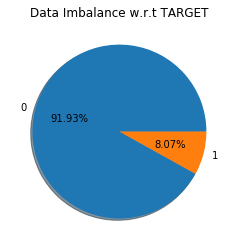

In [39]:
# Pie plot to visualize the data w.r.t TARGET
plot_pie('TARGET',bank_app,'Data Imbalance w.r.t TARGET')

#### Insights:
   - We see that ~8% of the clients have payment difficulties

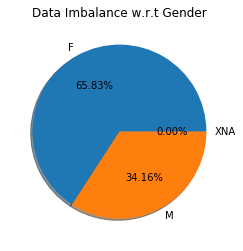

In [40]:
# Pie plot to visualize the data w.r.t Gender
plot_pie('CODE_GENDER',bank_app,'Data Imbalance w.r.t Gender')

#### Insights:
   - We see 3 gender categories 
   - We see that ~66% of the clients are Females
   - M vs F ratio is nearly double  

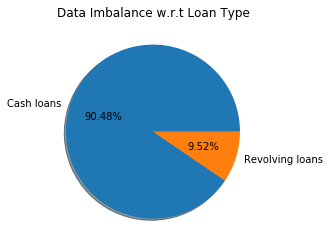

In [41]:
# Pie plot to visualize the data w.r.t Loan Type
plot_pie('NAME_CONTRACT_TYPE',bank_app,'Data Imbalance w.r.t Loan Type')

#### Insights:
   - Loan type 'Revolving loans' are just a small fraction (~10%) in the total number of loans

## Correlation

In [42]:

bank_target_data = bank_app[bank_app['TARGET']==0]
print("TARGET SHAPE:",bank_target_data.shape)
bank_non_target_data = bank_app[bank_app['TARGET']==1]
print("NON TARGET SHAPE:",bank_non_target_data.shape)

TARGET SHAPE: (282686, 40)
NON TARGET SHAPE: (24825, 40)


In [43]:
bank_target_data.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
SK_ID_CURR                                                       
100003           0         Cash loans           F            N   
100004           0    Revolving loans           M            Y   
100006           0         Cash loans           F            N   
100007           0         Cash loans           M            N   
100008           0         Cash loans           M            N   

           FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
SK_ID_CURR                                                               
100003                   N             0          270000.0   1293502.5   
100004                   Y             0           67500.0    135000.0   
100006                   Y             0          135000.0    312682.5   
100007                   Y             0          121500.0    513000.0   
100008                   Y             0           99000.0    490495.5   

            AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
SK_ID_CURR                                                                   
100003          35698.5        1129500.0           Family    State servant   
100004           6750.0         135000.0    Unaccompanied          Working   
100006          29686.5         297000.0    Unaccompanied          Working   
100007          21865.5         513000.0    Unaccompanied          Working   
100008          27517.5         454500.0  Spouse, partner    State servant   

                      NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
SK_ID_CURR                                                        
100003                   Higher education               Married   
100004      Secondary / secondary special  Single / not married   
100006      Secondary / secondary special        Civil marriage   
100007      Secondary / secondary special  Single / not married   
100008      Secondary / secondary special               Married   

            NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED OCCUPATION_TYPE  \
SK_ID_CURR                                                                 
100003      House / apartment      -16765          -1188      Core staff   
100004      House / apartment      -19046           -225        Laborers   
100006      House / apartment      -19005          -3039        Laborers   
100007      House / apartment      -19932          -3038      Core staff   
100008      House / apartment      -16941          -1588        Laborers   

            CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY  \
SK_ID_CURR                                                                     
100003                    2                    1                           1   
100004                    1                    2                           2   
100006                    2                    2                           2   
100007                    1                    2                           2   
100008                    2                    2                           2   

                 ORGANIZATION_TYPE  NO_OF_REACHABLE_MODES  No_OF_DOC  \
SK_ID_CURR                                                             
100003                      School                      4          1   
100004                  Government                      4          0   
100006      Business Entity Type 3                      3          1   
100007                    Religion                      3          1   
100008                       Other                      4          1   

            LOAN_INC_RATIO   AGE AGE_BIN  EMPLOY_YR EMPLOY_BIN  \
SK_ID_CURR                                                       
100003            4.790750  46.0   40-50        3.0        1-3   
100004            2.000000  52.0   50-60        1.0        0-1   
100006            2.316167  52.0   50-60        8.0       6-10   
100007            4.222222  55.0   50-60        8.0       6-10   
100008            

In [44]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df0 = bank_target_data.select_dtypes(include=numerics)
for col in numeric_df0.columns:
    
    print(col,len(numeric_df0[col].unique()))
    
correlation0= numeric_df0.corr(method='pearson')
numeric_df1 = bank_non_target_data.select_dtypes(include=numerics)
correlation1= numeric_df1.corr(method='pearson')

correlation_ext_t0=bank_ext_t0.corr(method='pearson')
correlation_ext_t1=bank_ext_t1.corr(method='pearson')

TARGET 1
CNT_CHILDREN 13
AMT_INCOME_TOTAL 2450
AMT_CREDIT 5488
AMT_ANNUITY 13523
AMT_GOODS_PRICE 949
DAYS_BIRTH 17451
DAYS_EMPLOYED 12494
CNT_FAM_MEMBERS 15
NO_OF_REACHABLE_MODES 5
No_OF_DOC 4
LOAN_INC_RATIO 46421
AGE 49
EMPLOY_YR 51
NO_OF_PREVIOUS_APPLICATIONS 65
Approved 26
Canceled 38
Refused 44
Unused offer 11


In [45]:
#removing duplicate pairs
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

#get the top correlations
def get_top_abs_correlations(df, n=10):
    op_corr = df.corr(method='pearson').abs().unstack()
    labels_to_drop = list(set(get_redundant_pairs(df)))
    op_corr = op_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return op_corr[0:n]

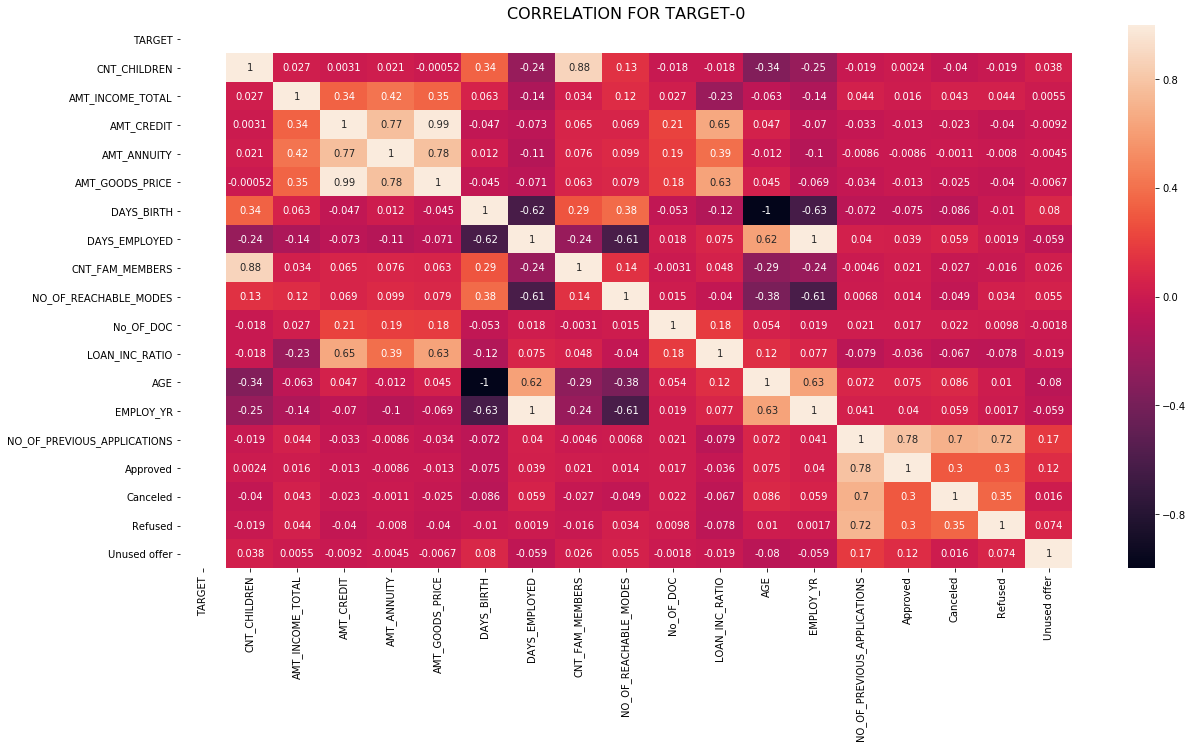

In [46]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title("CORRELATION FOR TARGET-0",fontsize=16)
sns.heatmap(correlation0, xticklabels=correlation0.columns,yticklabels=correlation0.columns,annot=True)

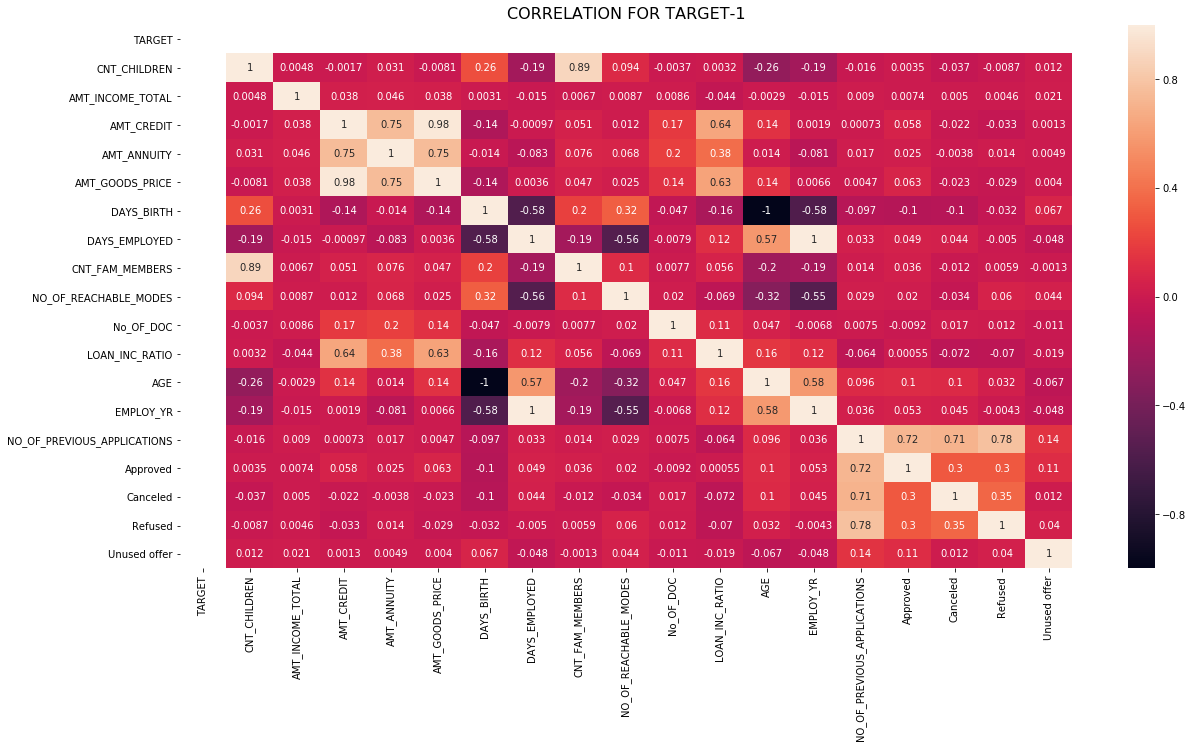

In [47]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title("CORRELATION FOR TARGET-1",fontsize=16)
sns.heatmap(correlation1, xticklabels=correlation1.columns,yticklabels=correlation1.columns,annot=True)

In [48]:
#Top 10 Correlations 

print("Top 10 correlations w.r.t TARGET 0",'\n')
print(get_top_abs_correlations(numeric_df0,12),'\n\n\n')

print("Top 10 correlations w.r.t TARGET 1",'\n')
print(get_top_abs_correlations(numeric_df1,12))

Top 10 correlations w.r.t TARGET 0 

DAYS_BIRTH                   AGE                0.999706
DAYS_EMPLOYED                EMPLOY_YR          0.999545
AMT_CREDIT                   AMT_GOODS_PRICE    0.987250
CNT_CHILDREN                 CNT_FAM_MEMBERS    0.878570
NO_OF_PREVIOUS_APPLICATIONS  Approved           0.781402
AMT_ANNUITY                  AMT_GOODS_PRICE    0.776686
AMT_CREDIT                   AMT_ANNUITY        0.771309
NO_OF_PREVIOUS_APPLICATIONS  Refused            0.720236
                             Canceled           0.699956
AMT_CREDIT                   LOAN_INC_RATIO     0.652130
AMT_GOODS_PRICE              LOAN_INC_RATIO     0.632094
DAYS_BIRTH                   EMPLOY_YR          0.626112
dtype: float64 



Top 10 correlations w.r.t TARGET 1 

DAYS_BIRTH                   AGE                0.999680
DAYS_EMPLOYED                EMPLOY_YR          0.999574
AMT_CREDIT                   AMT_GOODS_PRICE    0.983103
CNT_CHILDREN                 CNT_FAM_MEMBERS    0.88

- Ignore the correlation between (DAYS_BIRTH and AGE)  and (DAYS_EMPLOYED and EMPLOY_YR)
- since both are same columns the other one is derived column we can ignore the first 2

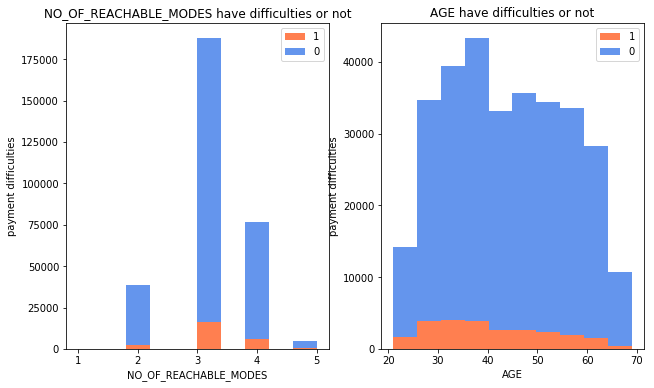

In [49]:
def create_Hist(col_name,splot):
    plt.subplot(splot)
    plt.hist(x = [bank_app[bank_app['TARGET']==1][col_name], bank_app[bank_app['TARGET']==0][col_name]], 
         stacked=True, color = ['coral','cornflowerblue'],label = ['1','0'])
    plt.title(col_name + ' have difficulties or not')
    plt.xlabel(col_name)
    plt.ylabel('payment difficulties')
    plt.legend()
plt.figure(figsize=[16,6])
create_Hist('NO_OF_REACHABLE_MODES',131)
create_Hist('AGE',132)



Text(0.5, 1.0, 'CORRELATION FOR TARGET 1 WITH EXTERNAL SOURCES')

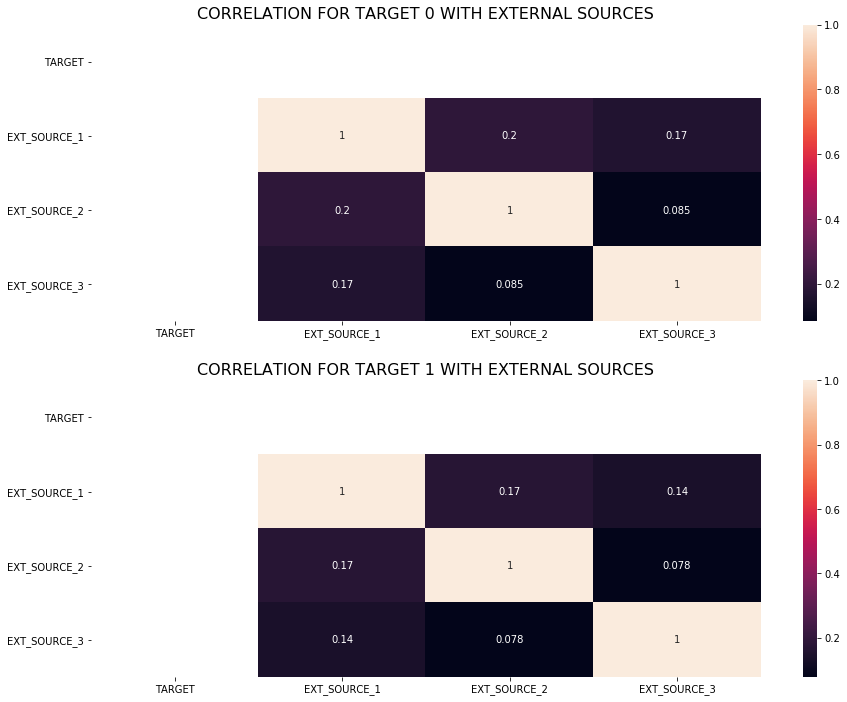

In [50]:
# checking if any correlation between EXT_SOURCE*
fig, (axis1,axis2) = plt.subplots(2,1,figsize = (15,12))
sns.heatmap(correlation_ext_t0, xticklabels=correlation_ext_t0.columns,yticklabels=correlation_ext_t0.columns,annot=True,ax=axis1)
sns.heatmap(correlation_ext_t1, xticklabels=correlation_ext_t1.columns,yticklabels=correlation_ext_t1.columns,annot=True,ax=axis2)
axis1.set_title('CORRELATION FOR TARGET 0 WITH EXTERNAL SOURCES',fontsize=16)
axis2.set_title('CORRELATION FOR TARGET 1 WITH EXTERNAL SOURCES',fontsize=16)

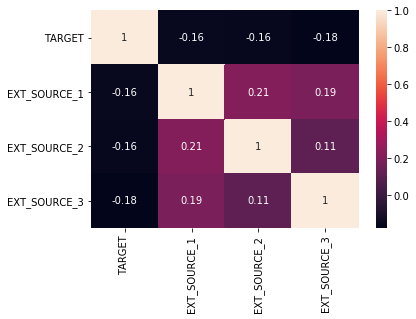

In [51]:
# checking if any correlation with target and EXT_SOURCE*
correlation_ext_source=bank_ext_source.corr(method='pearson')
sns.heatmap(correlation_ext_source, xticklabels=correlation_ext_source.columns,yticklabels=correlation_ext_source.columns,annot=True)

- We see some minimal negative corralation with target and EXT_SOURCE*
- Since we have data imbalance in this columns since we have data imbalance w.r.t TARGET
- Let us explore more on this columns

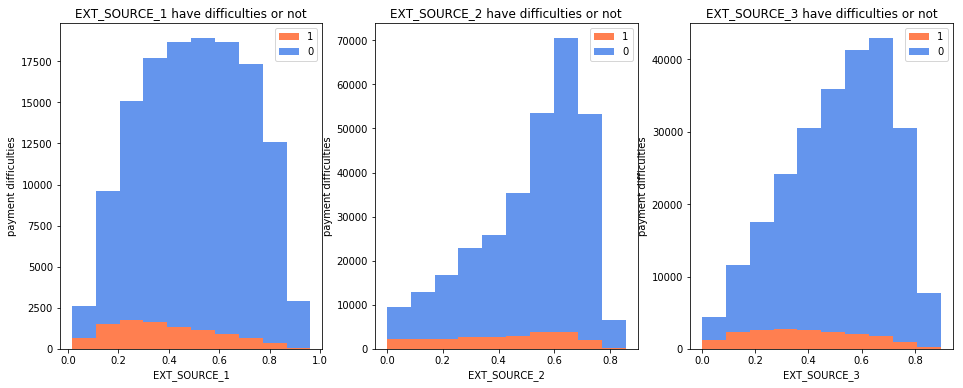

In [52]:
# Here we are trying to create Hist plot w.r.t TARGET 0 and 1

plt.figure(figsize=[16,6])


def create_Hist_EXT(col_name,splot):
    plt.subplot(splot)
    plt.hist(x = [bank_ext_source[bank_ext_source['TARGET']==1][col_name], bank_ext_source[bank_ext_source['TARGET']==0][col_name]], 
         stacked=True, color = ['coral','cornflowerblue'],label = ['1','0'])
    plt.title(col_name + ' have difficulties or not')
    plt.xlabel(col_name)
    plt.ylabel('payment difficulties')
    plt.legend()
    
create_Hist_EXT('EXT_SOURCE_1',131)
create_Hist_EXT('EXT_SOURCE_2',132)
create_Hist_EXT('EXT_SOURCE_3',133)


#### Insights:

##### In both cases (for target  1 and 0),
- We see a strong positive correaltion between AMT_CREDIT, AMT_ANNUITY and AMT_GOODS_PRICE and also between CNT_CHILDREN and CNT_FAM_MEMBERS and also between REFUSED and NO_OF_PREVIOUS_APPLICATIONS.
- DAYS_BIRTH and DAYS_EMPLOYED are Negatively correlated
- And No of Reachable Modes are positive and negative correlation with DAYS_BIRTH and DAYS_EMPLOYED
- AGE and DAYS_BIRTH are with high negative correlation(i.e -1).
- Total No of Previous Application are corrrelated with the Approval and Rejection ratios
- EXTERNAL_SOURCE 2 and 3 are with high correlation for both target 1 and 0 datasets.
- EXTERNAL_SOURCE 1 and 3 are with low correlation for both target 1 and 0 datasets.

## Dealing with Outliers

In [53]:
# Function to check the Outlier existance

def Outlier_Check(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)
    modified_z_score = 0.6745 * diff / med_abs_deviation
    return modified_z_score > thresh

In [54]:
# plots the data after removing the Outliers
# we have  plots Original and without Outliers distribution side-by-side comparision

def outlier_plots(df,col_name):
    
    fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(18,12))
    
    sns.distplot(df[col_name].dropna(), kde=True,bins=100,ax = ax1)
    ax1.set_title('Original')
    ax1.set_xlabel(col_name)
    #ax2.hist(filter_data)
    sns.distplot(df.loc[~Outlier_Check(bank_app[col_name]),col_name].dropna(),kde=True,bins=100,ax = ax2)
    ax2.set_title('Without Outliers')
    ax2.set_xlabel(col_name)
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=45)
    plt.show()
    plt.tight_layout()

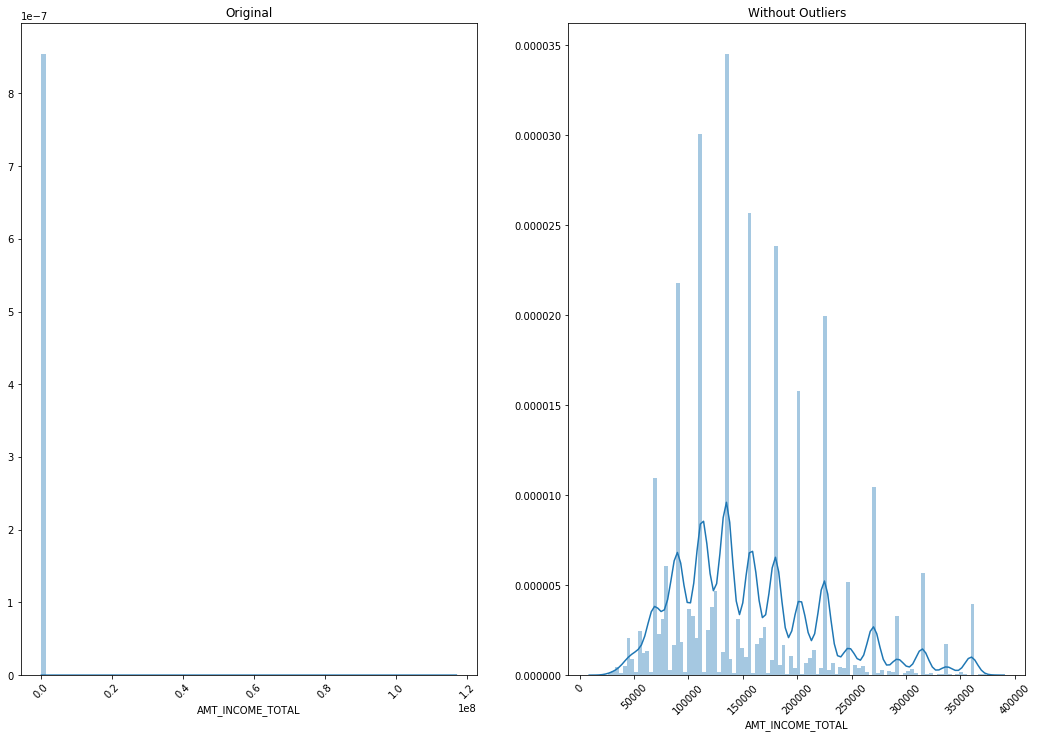

<Figure size 432x288 with 0 Axes>

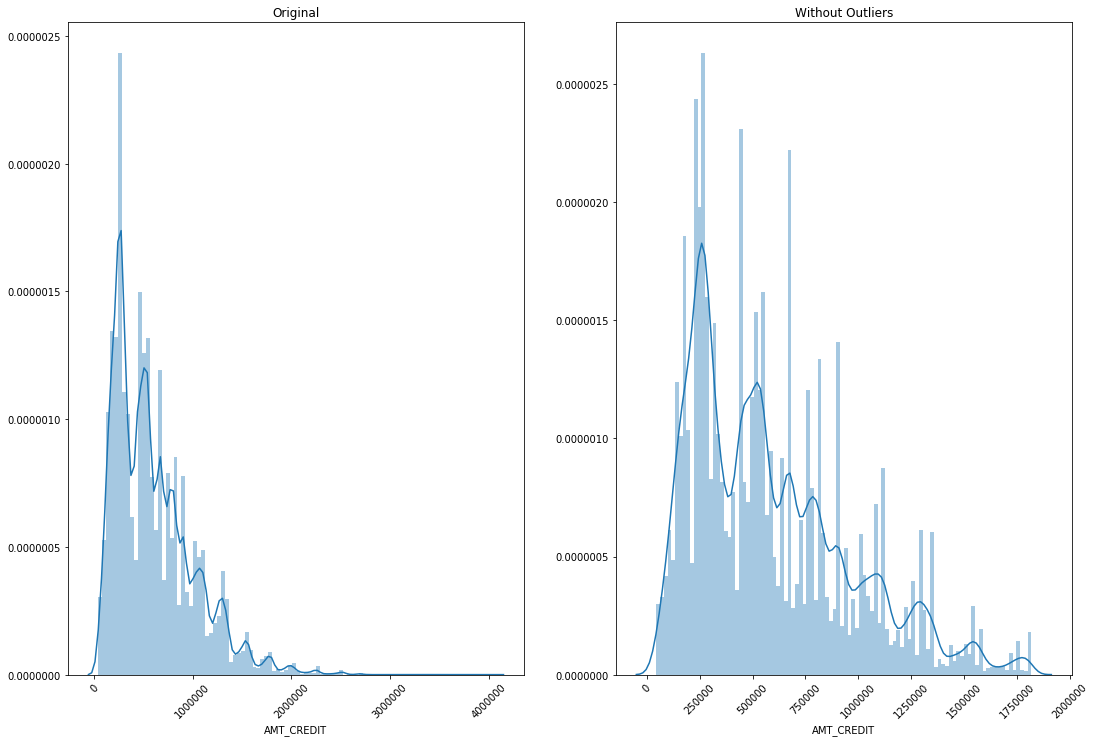

<Figure size 432x288 with 0 Axes>

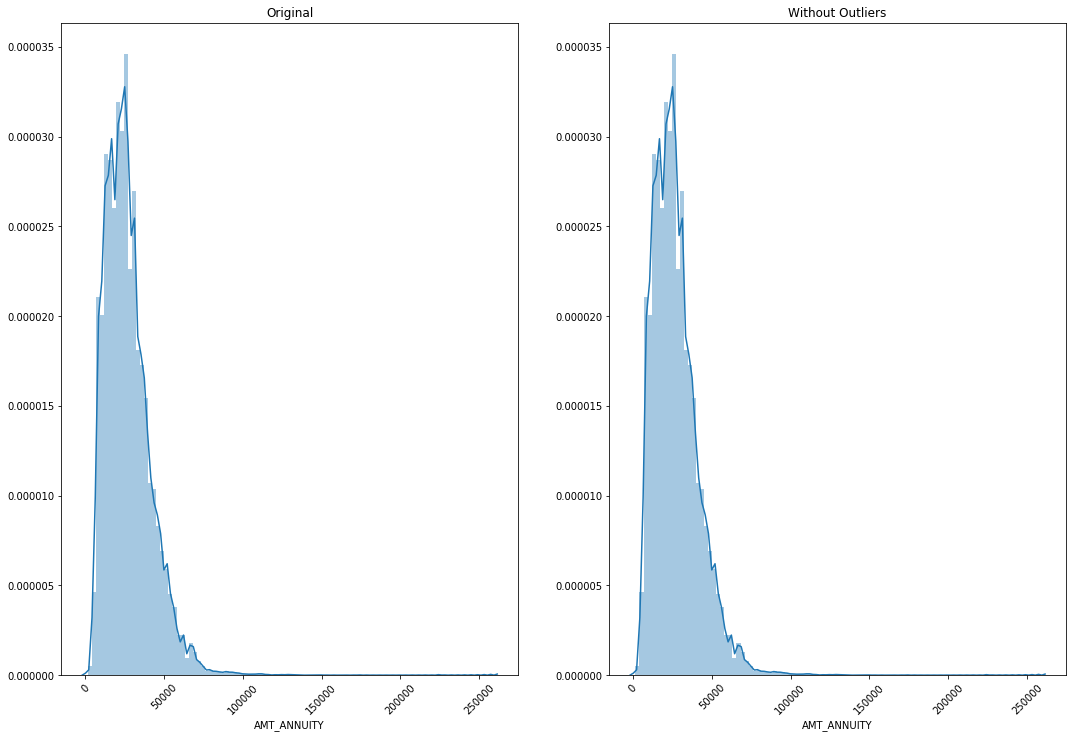

<Figure size 432x288 with 0 Axes>

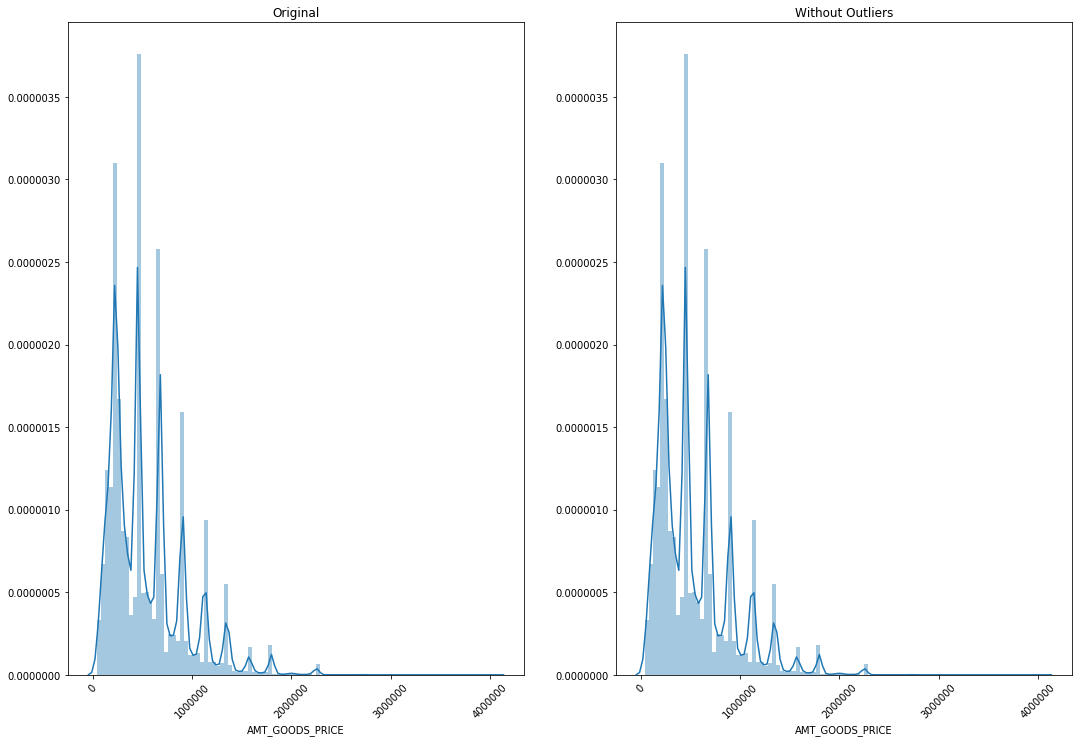

<Figure size 432x288 with 0 Axes>

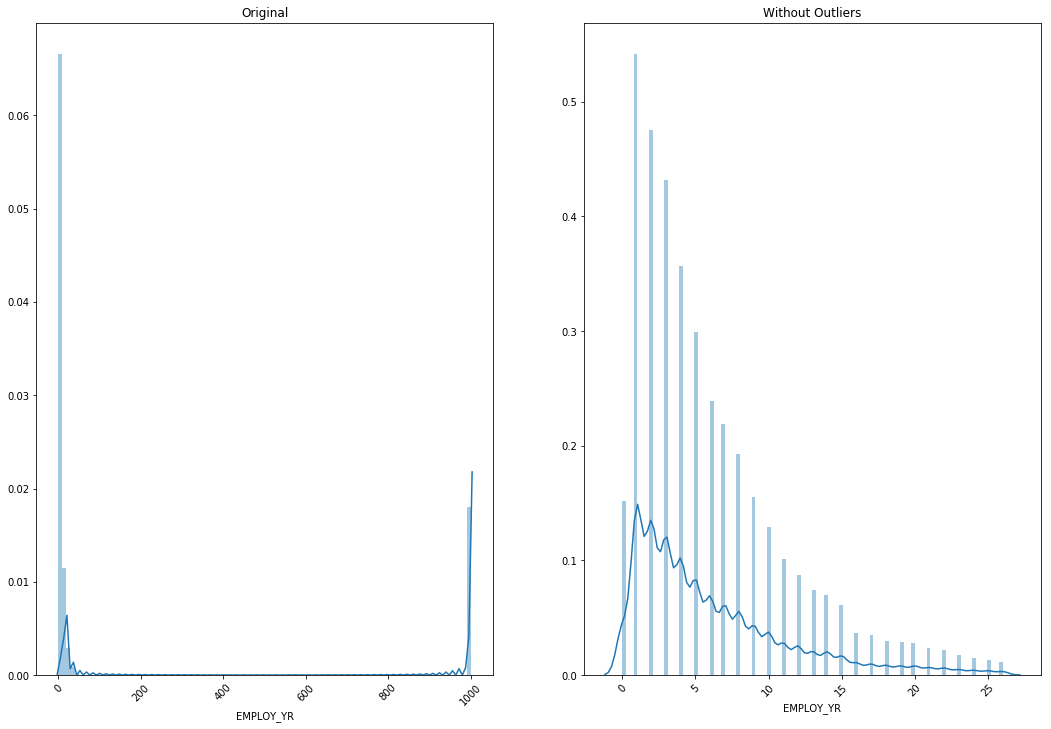

<Figure size 432x288 with 0 Axes>

In [55]:
#outlier with respect to some of the columns in application data 
out_list=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','EMPLOY_YR']
for col in out_list:
    outlier_plots(bank_app,col)


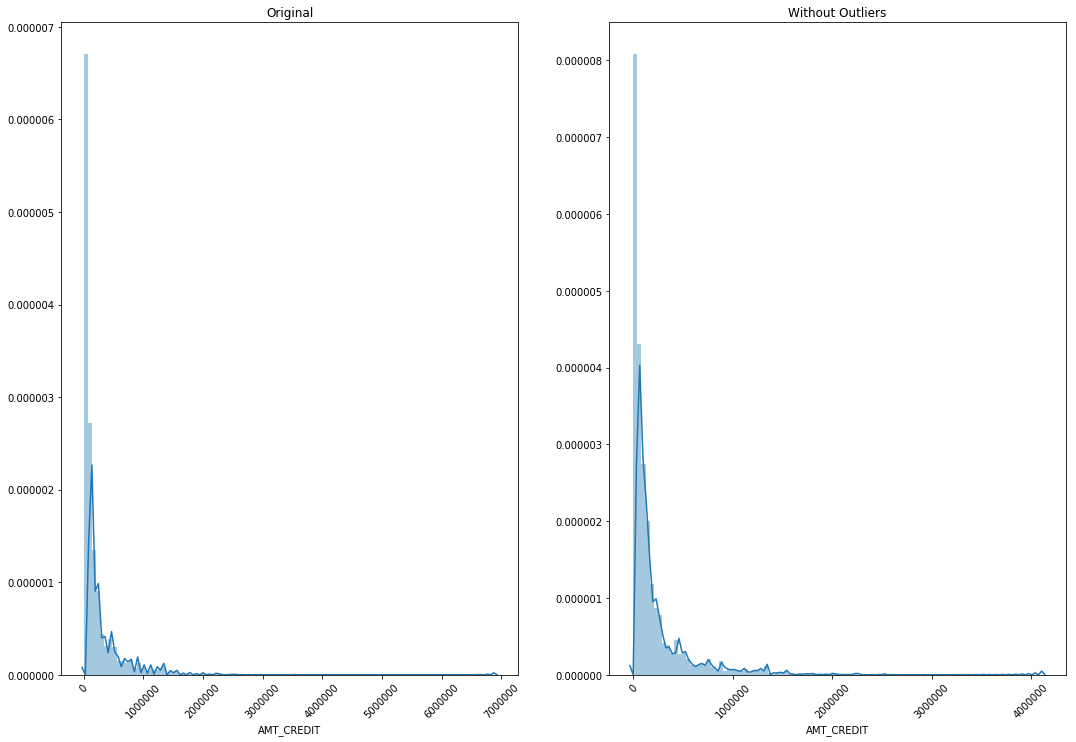

<Figure size 432x288 with 0 Axes>

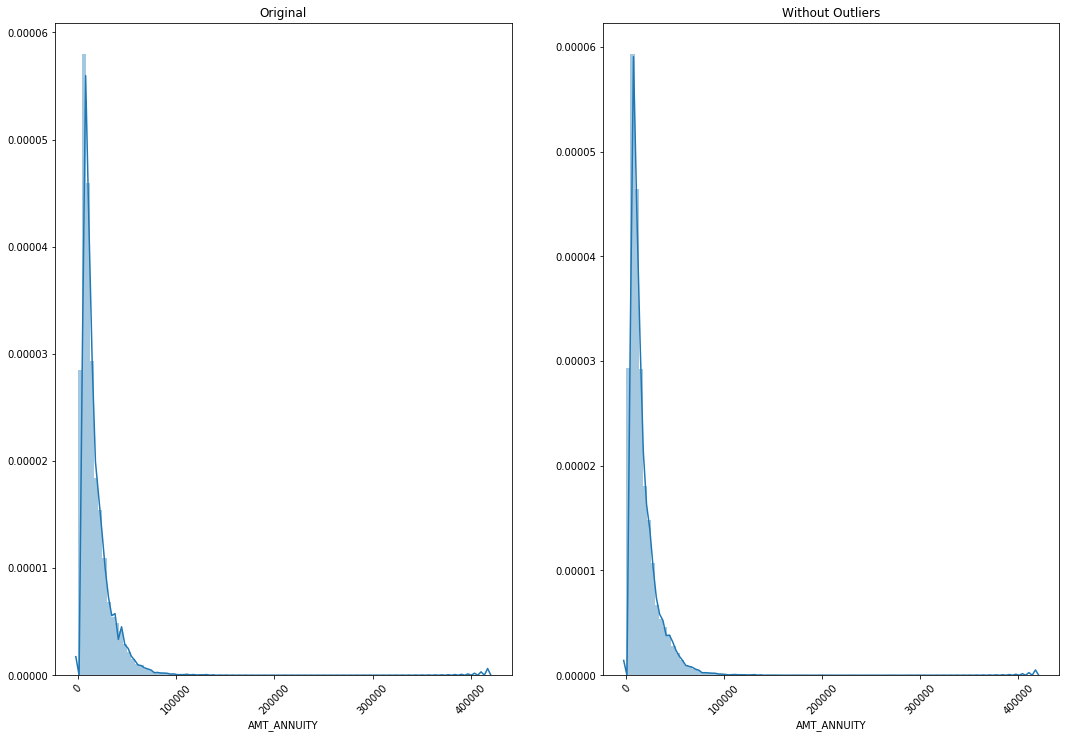

<Figure size 432x288 with 0 Axes>

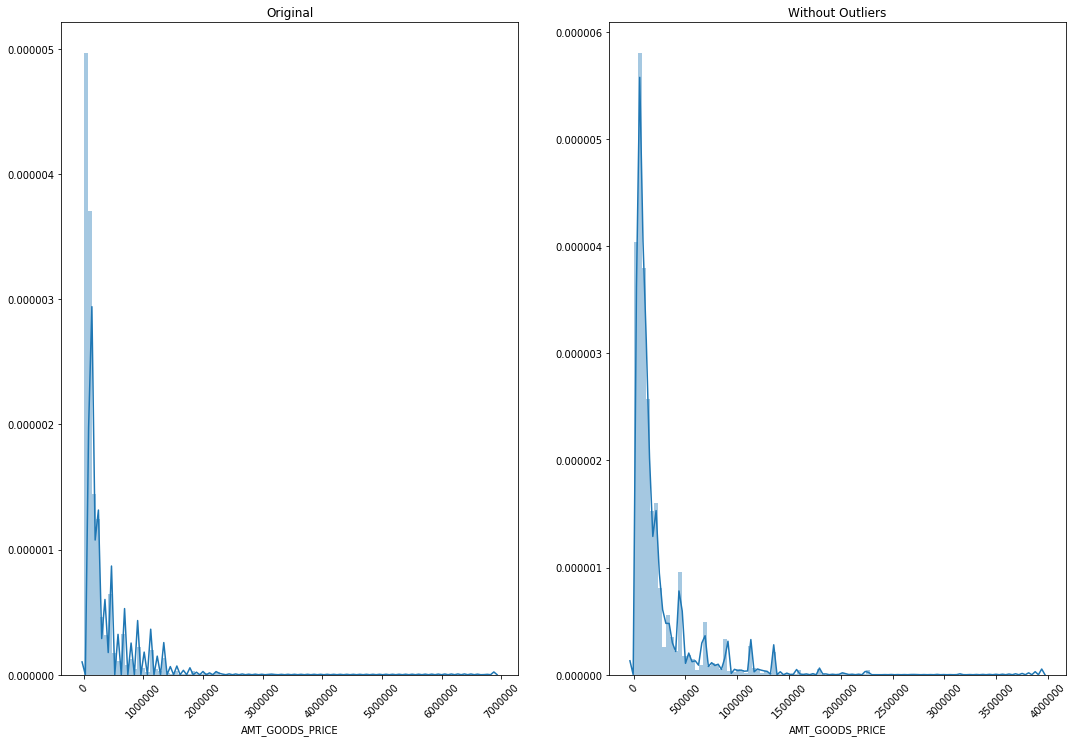

<Figure size 432x288 with 0 Axes>

In [56]:
#outlier with respect to some of the columns in previous_application data 
out_list2=['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
for col2 in out_list2:
    outlier_plots(prev_app,col2)

#### Insights:
- We see outliers affecting the distribution in EMPLOY_YR(DAYS_EMPLOYED), AMT_CREDIT and AMT_INCOME_TOTAL in Application data.
- To be handled while processing the dataset
- we don't see drastic change in the distribution in previous application data.

## Exploring categorical Data

In [57]:
#changing the type of catedories to Objects to make it easy for processing
bank_app[['LOAN_BIN', 'INCOME_BIN']] = bank_app[['LOAN_BIN', 'INCOME_BIN']].astype(object)

In [58]:
# collecting the List of categorical values and its categories count
categorical_col = [col for col in bank_app.columns if bank_app[col].dtype in ['object']]
bank_app[categorical_col].describe().loc['unique'].sort_values()

NAME_CONTRACT_TYPE              2
FLAG_CANCELLED                  2
FLAG_APPROVED                   2
FLAG_REFUSED                    2
FLAG_UNUSED_OFFER               2
FLAG_OWN_REALTY                 2
FLAG_OWN_CAR                    2
REGION_RATING_CLIENT            3
REGION_RATING_CLIENT_W_CITY     3
CODE_GENDER                     3
NAME_EDUCATION_TYPE             5
LOAN_BIN                        5
INCOME_BIN                      5
NAME_FAMILY_STATUS              6
NAME_HOUSING_TYPE               6
NAME_TYPE_SUITE                 7
NAME_INCOME_TYPE                8
OCCUPATION_TYPE                19
ORGANIZATION_TYPE              58
Name: unique, dtype: object

In [59]:
# Removing columns with more than 10 categories which to be visualized seperatly
categorical_col.remove('OCCUPATION_TYPE')
categorical_col.remove('ORGANIZATION_TYPE')

###### Exploring Categorical Data w.r.t TARGET
- 1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 
- 0 - all other cases

In [60]:

# this function creates plot for every categorical values
# 3 plots are shown for analysis
# 1. Count of application with TARGET 1 and TARGET 0
# 2. Box plot to visualize the AMT_CREDIT w.r.t given column 
# 3. Box plot to visualize the AMT_ANNUITY w.r.t given column

# function takes 3 params 1. data frame 2. column name and hor- boolean value to decide if the categories are more than 10
def Comparison_bar_plot(df,col_name,hor=True,prev=True):
    if hor==True:
        #plt.figure(figsize = (20,10))
        if prev:
            fig, (axis1,axis2,axis3,axis4) = plt.subplots(1,4,figsize = (36,8))
        else:
            fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize = (36,8))
        
        s = sns.countplot(x=col_name, hue="TARGET", data=df, ax = axis1)
        
        sns.boxplot(x = col_name, y = 'AMT_CREDIT', hue = 'TARGET', data = df.loc[~Outlier_Check(bank_app['AMT_INCOME_TOTAL'])], ax = axis2)
        sns.boxplot(x = col_name, y = 'AMT_ANNUITY', hue = 'TARGET', data = df.loc[~Outlier_Check(bank_app['AMT_INCOME_TOTAL'])], ax = axis3)
        
        plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
        axis1.set_title(col_name + ' counts w.r.t Target',fontsize=12)
        axis2.set_title(col_name + 'vs AMT_CREDIT Comparison',fontsize=12)
        axis3.set_title(col_name + 'vs AMT_ANNUITY Comparison',fontsize=12)
        
        for tick in axis1.get_xticklabels():
            tick.set_rotation(45)
        for tick in axis2.get_xticklabels():
            tick.set_rotation(45)
        for tick in axis3.get_xticklabels():
            tick.set_rotation(45)
        if prev:
            sns.boxplot(x = col_name, y = 'AMT_INCOME_TOTAL', hue = 'TARGET', data = df.loc[~Outlier_Check(bank_app['AMT_INCOME_TOTAL'])], ax = axis4)
            axis4.set_title(col_name + 'vs AMT_INCOME Comparison',fontsize=12)
            for tick in axis4.get_xticklabels():
                tick.set_rotation(45)
            
        for p in s.patches:
            s.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=90, textcoords = 'offset points',fontsize=12)
    else:
        if prev:
            fig, (axis1,axis2,axis3,axis4) = plt.subplots(4,1,figsize = (30,20))
        else:
            fig, (axis1,axis2,axis3) = plt.subplots(3,1,figsize = (30,20))
        s=sns.countplot(x=col_name, hue="TARGET", data=bank_app,ax = axis1)
        s.set_xticklabels(s.get_xticklabels(),rotation=45)
         
        sns.boxplot(x = col_name, y = 'AMT_CREDIT', hue = 'TARGET', data = df.loc[~Outlier_Check(bank_app['AMT_INCOME_TOTAL'])],ax = axis2)
        sns.boxplot(x = col_name, y = 'AMT_ANNUITY', hue = 'TARGET', data = df.loc[~Outlier_Check(bank_app['AMT_INCOME_TOTAL'])],ax = axis3)
       
        for tick in axis1.get_xticklabels():
            tick.set_rotation(45)
        for tick in axis2.get_xticklabels():
            tick.set_rotation(45)
        for tick in axis3.get_xticklabels():
            tick.set_rotation(45)
        if prev:
            sns.boxplot(x = col_name, y = 'AMT_INCOME_TOTAL', hue = 'TARGET', data = df.loc[~Outlier_Check(bank_app['AMT_INCOME_TOTAL'])], ax = axis4)
            for tick in axis4.get_xticklabels():
                tick.set_rotation(45)
        for p in s.patches:
            s.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=90, textcoords = 'offset points',fontsize=12)

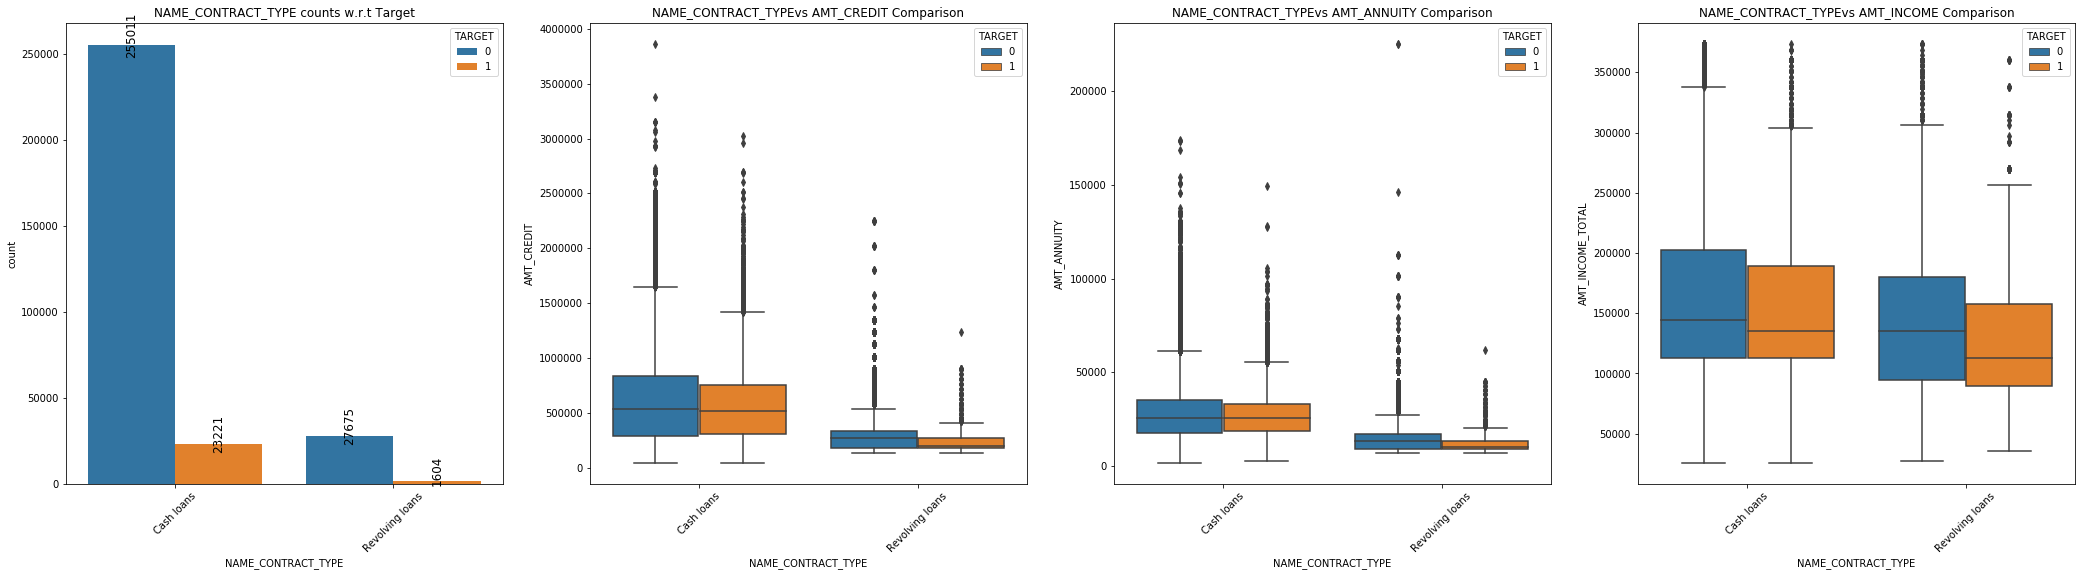

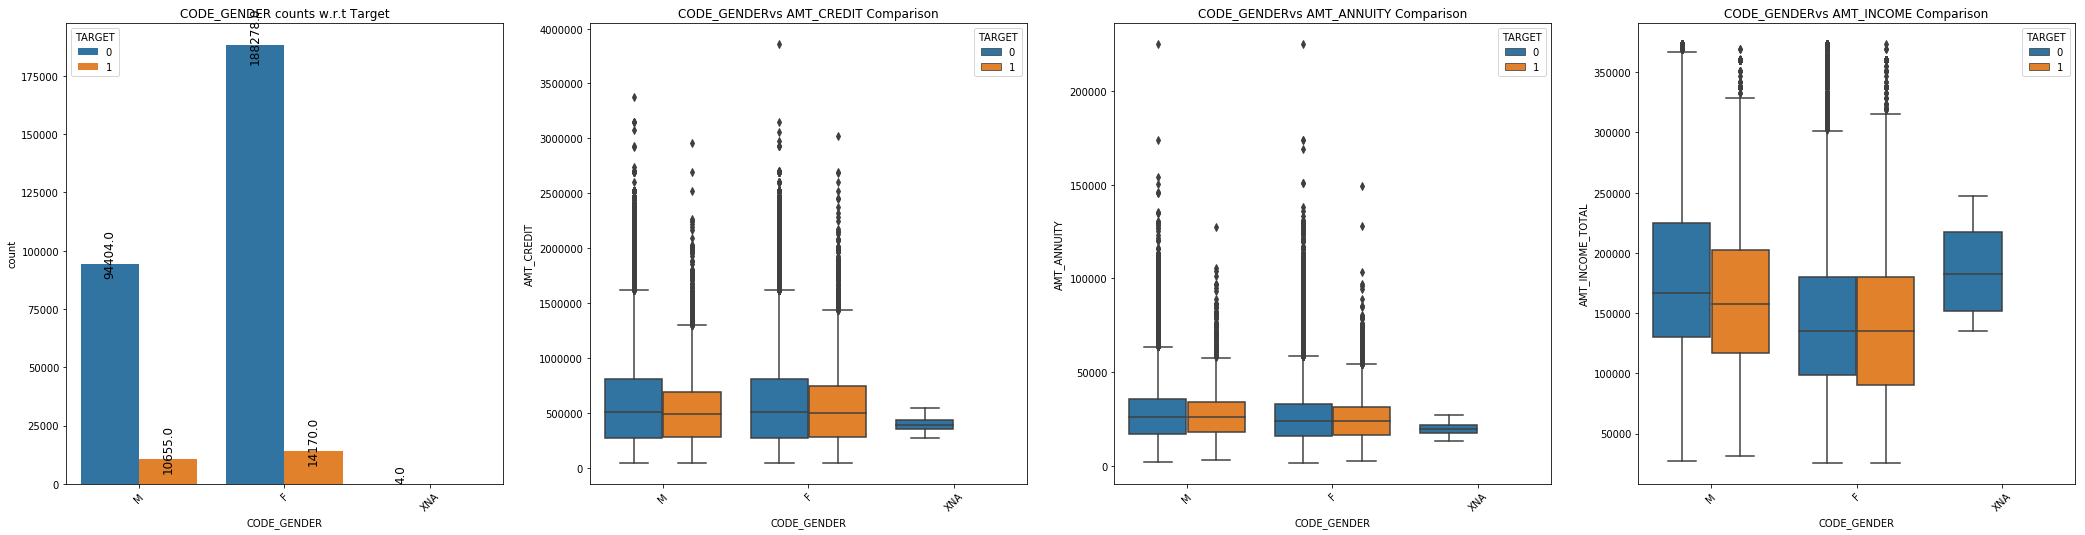

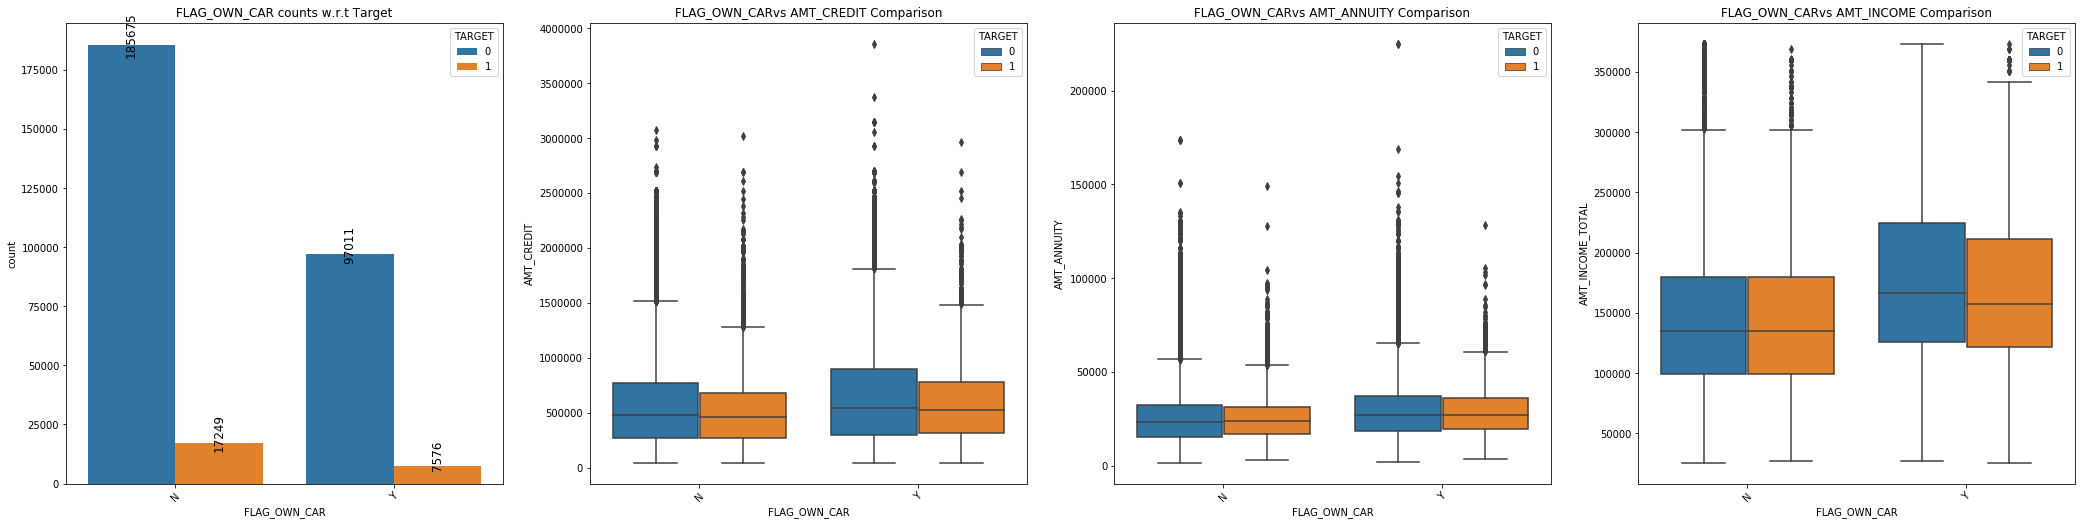

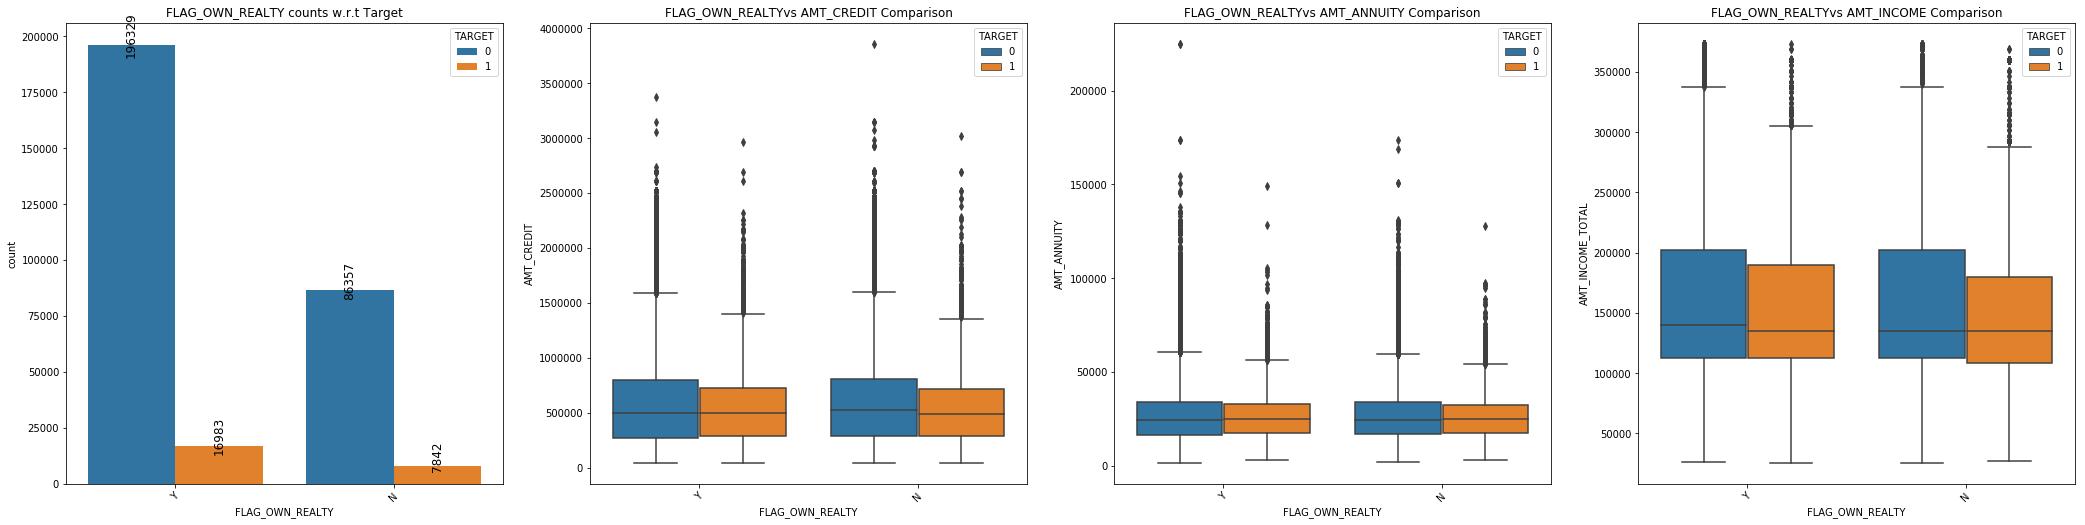

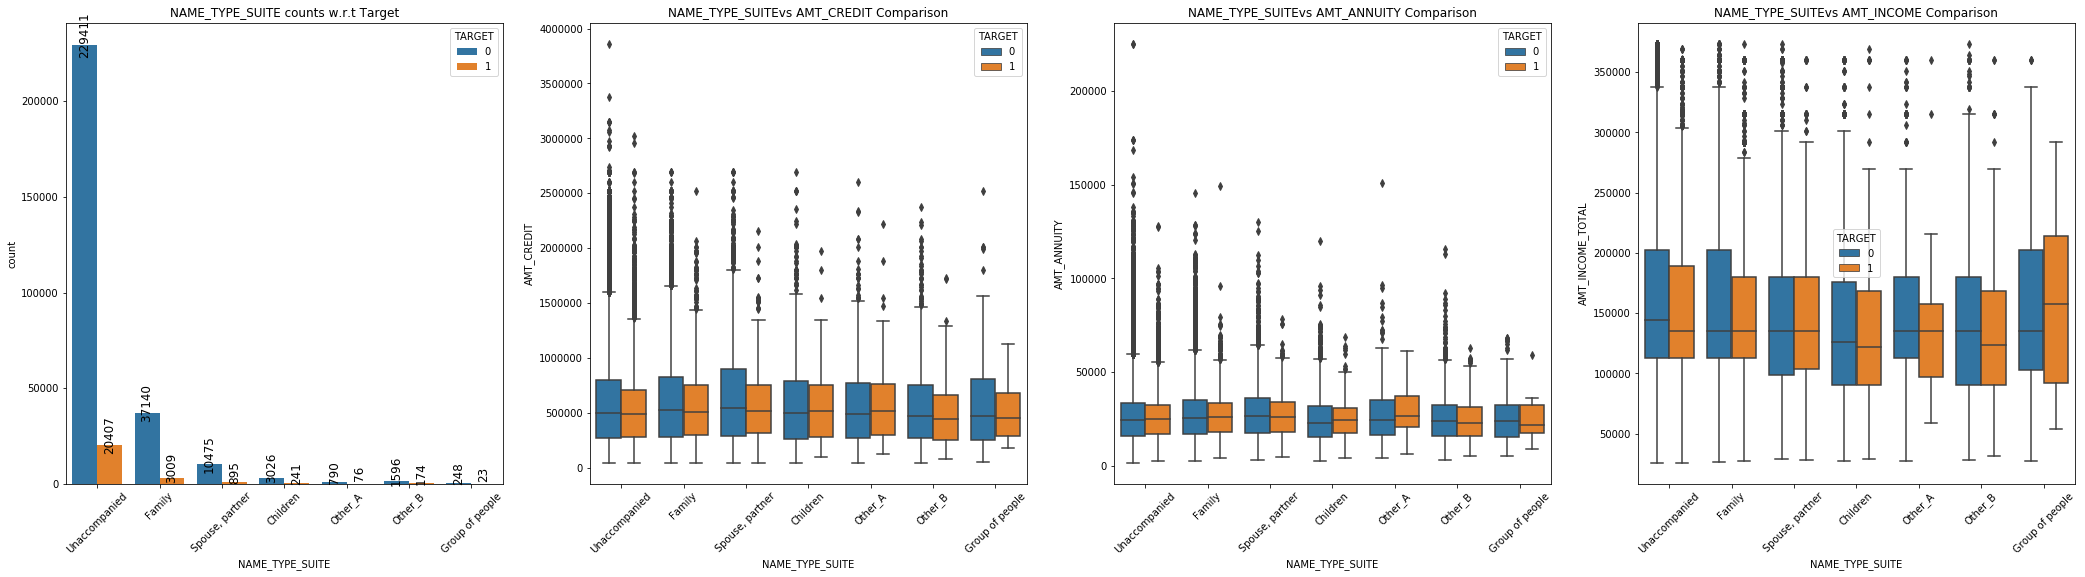

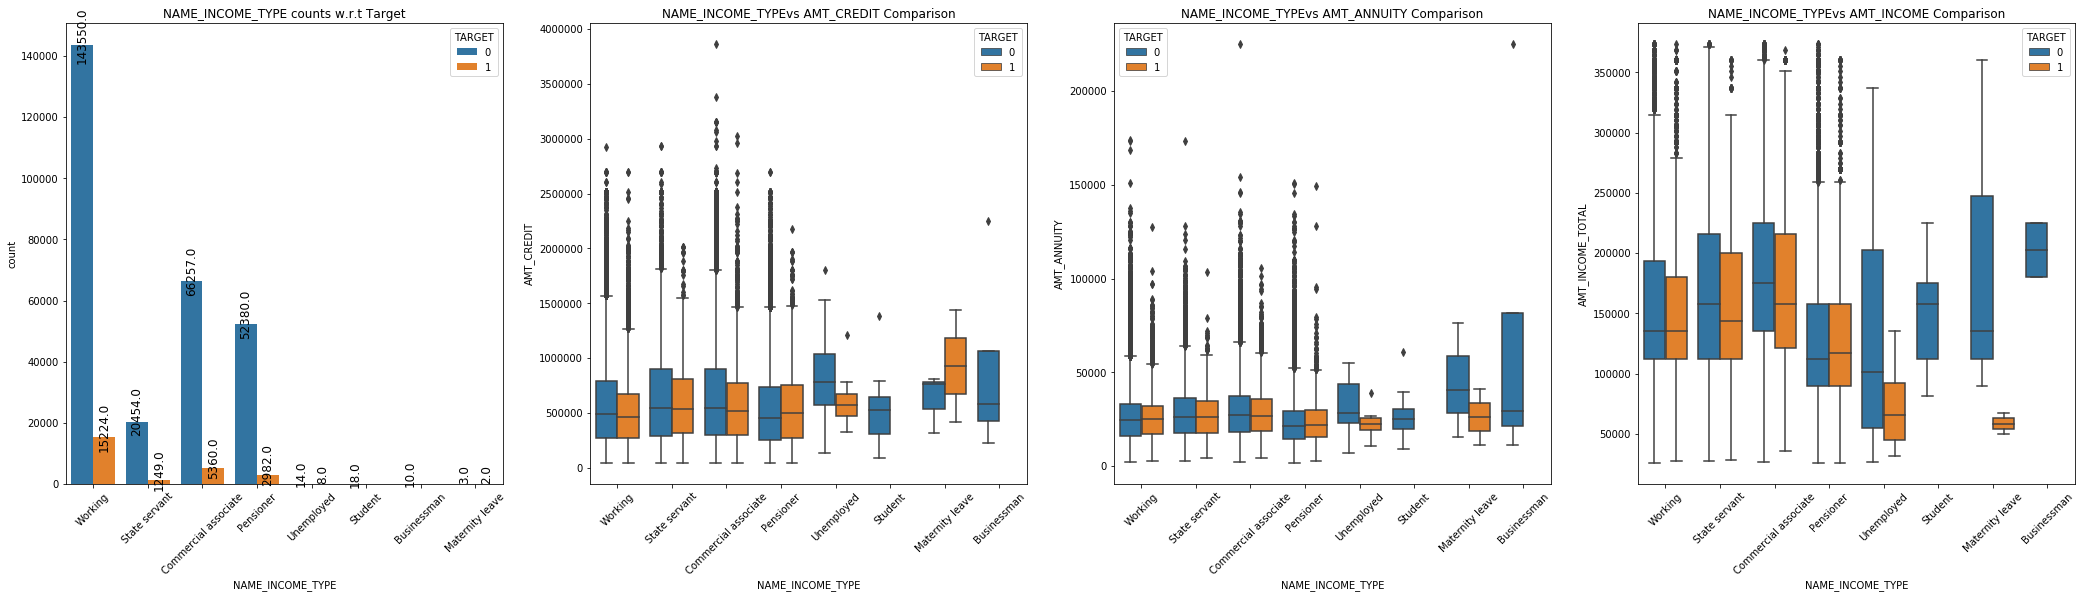

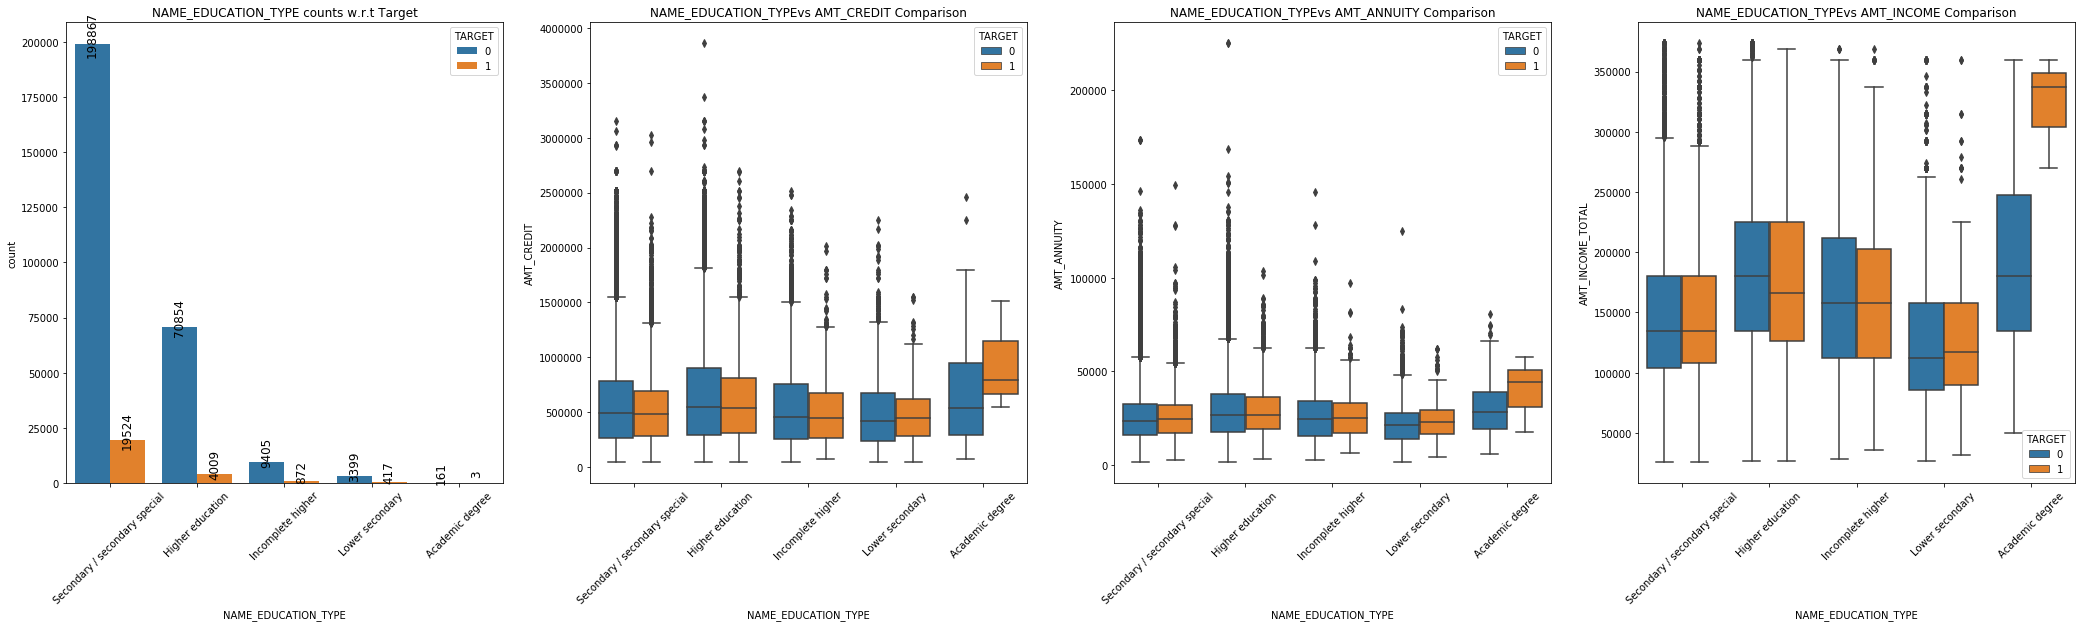

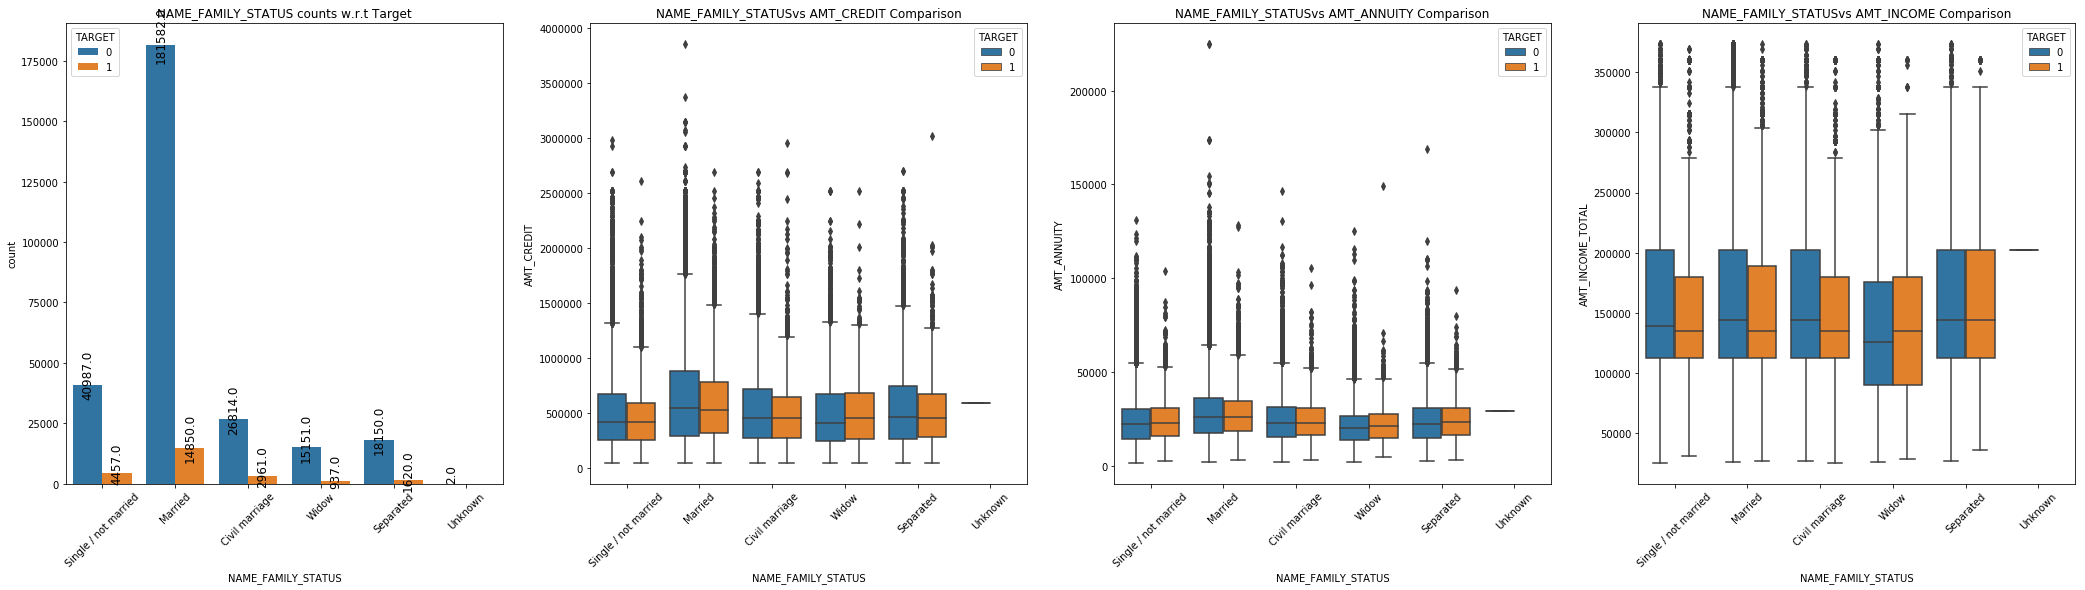

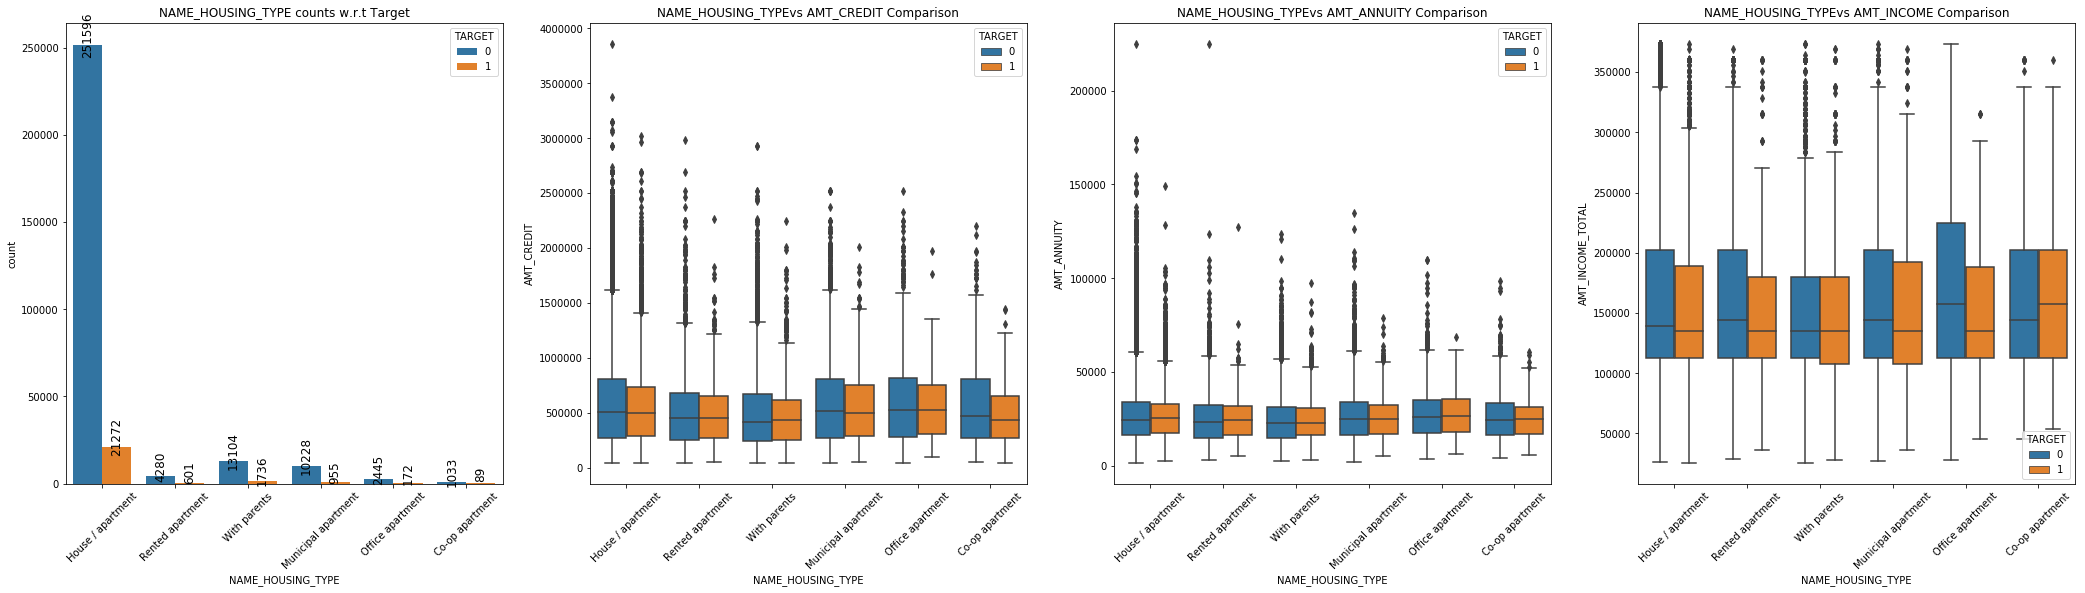

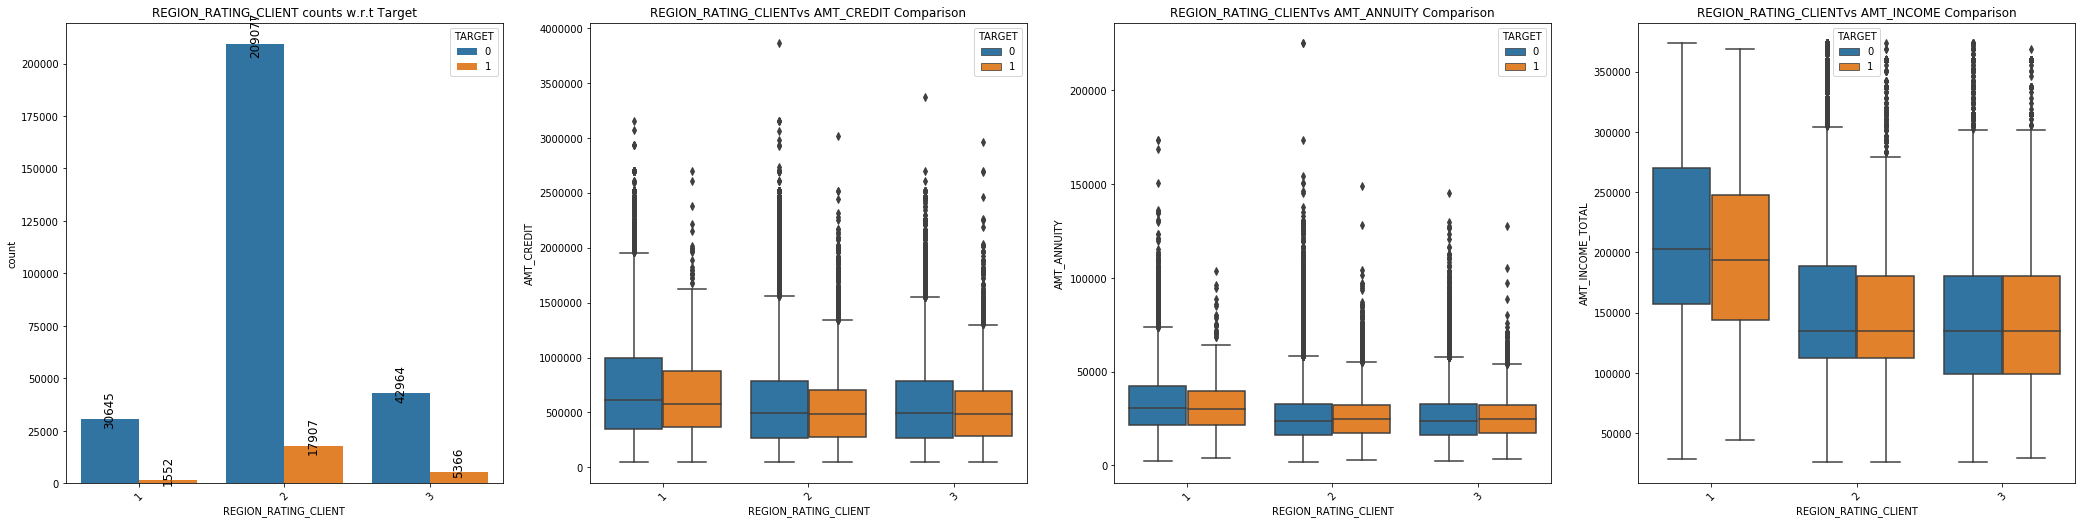

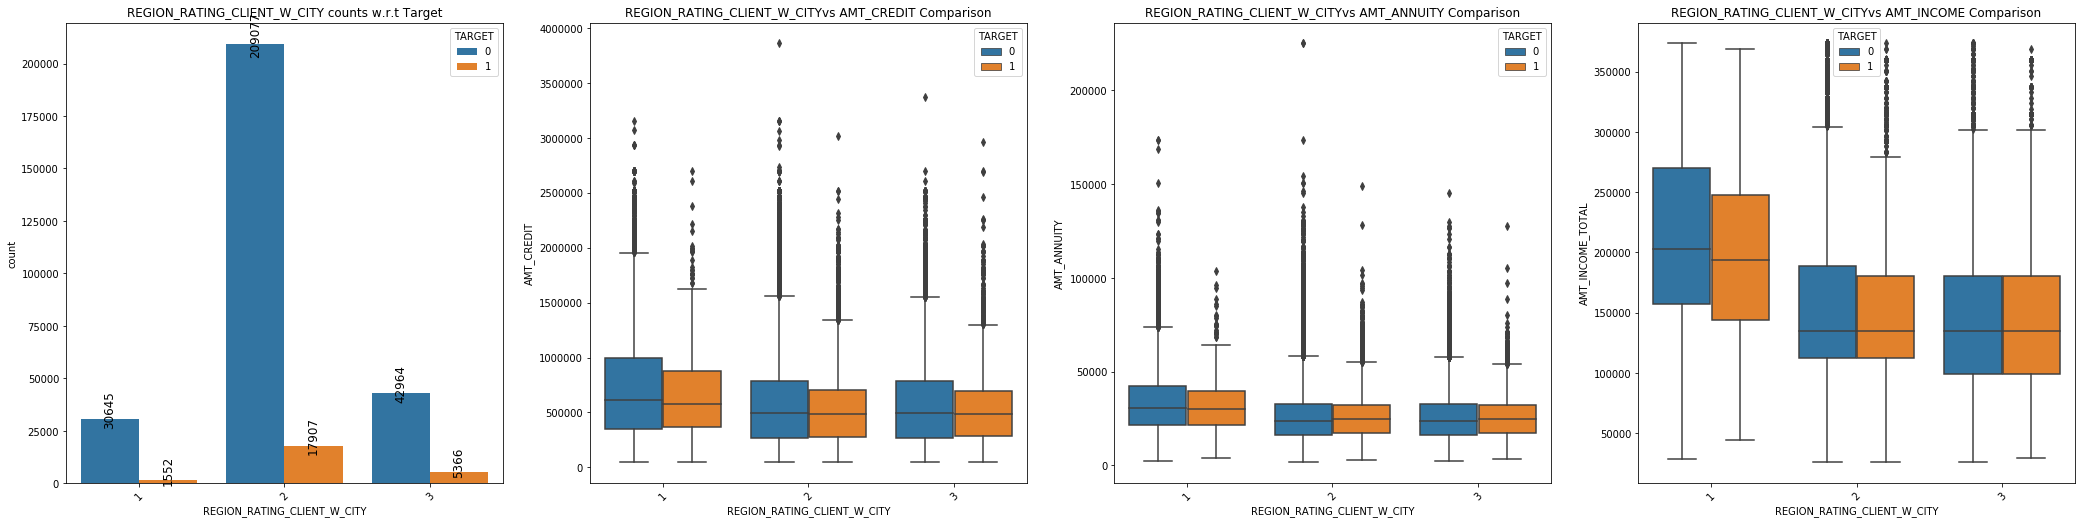

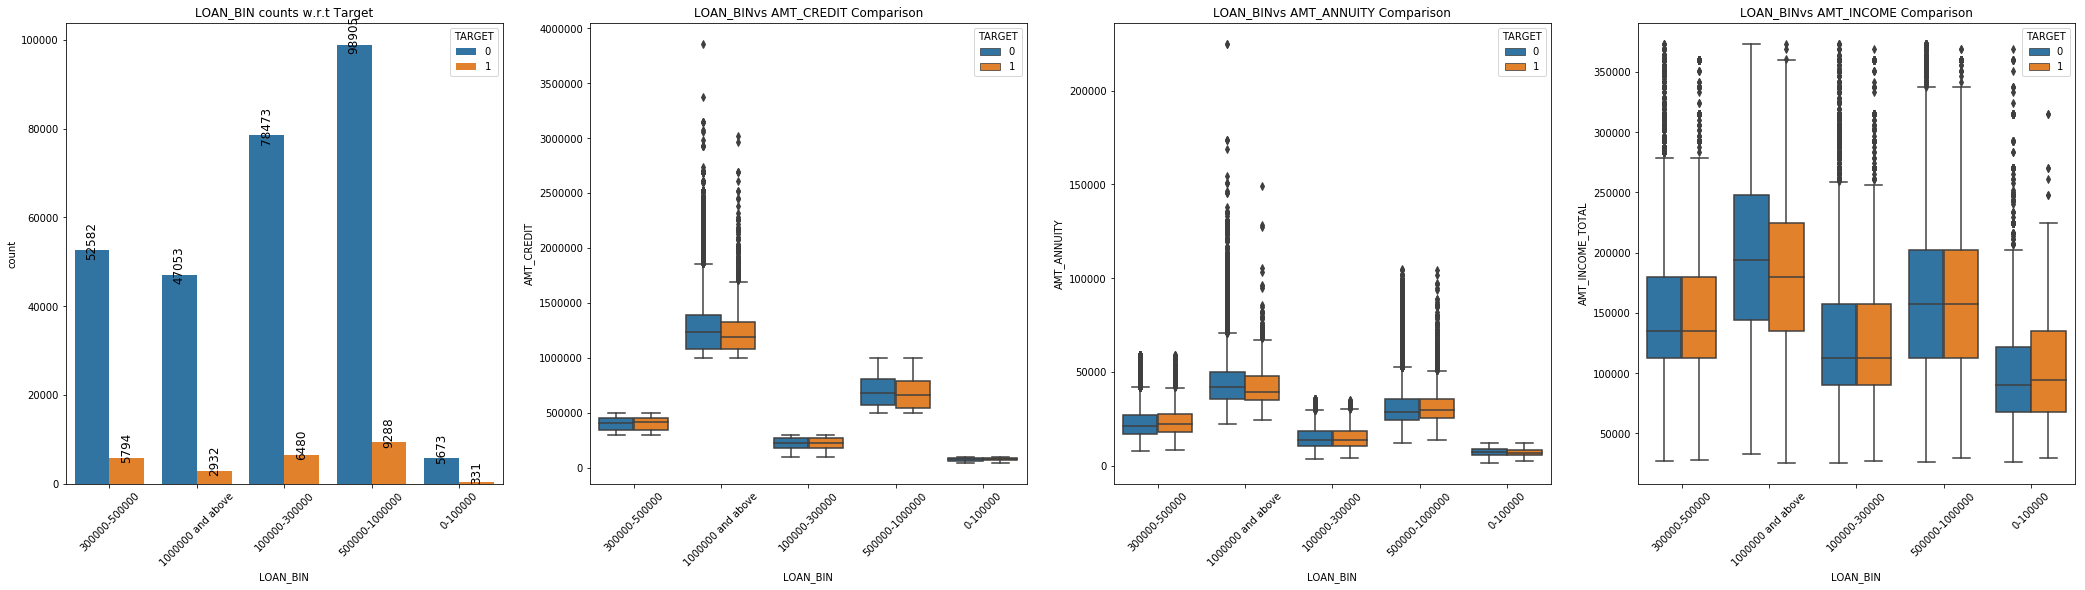

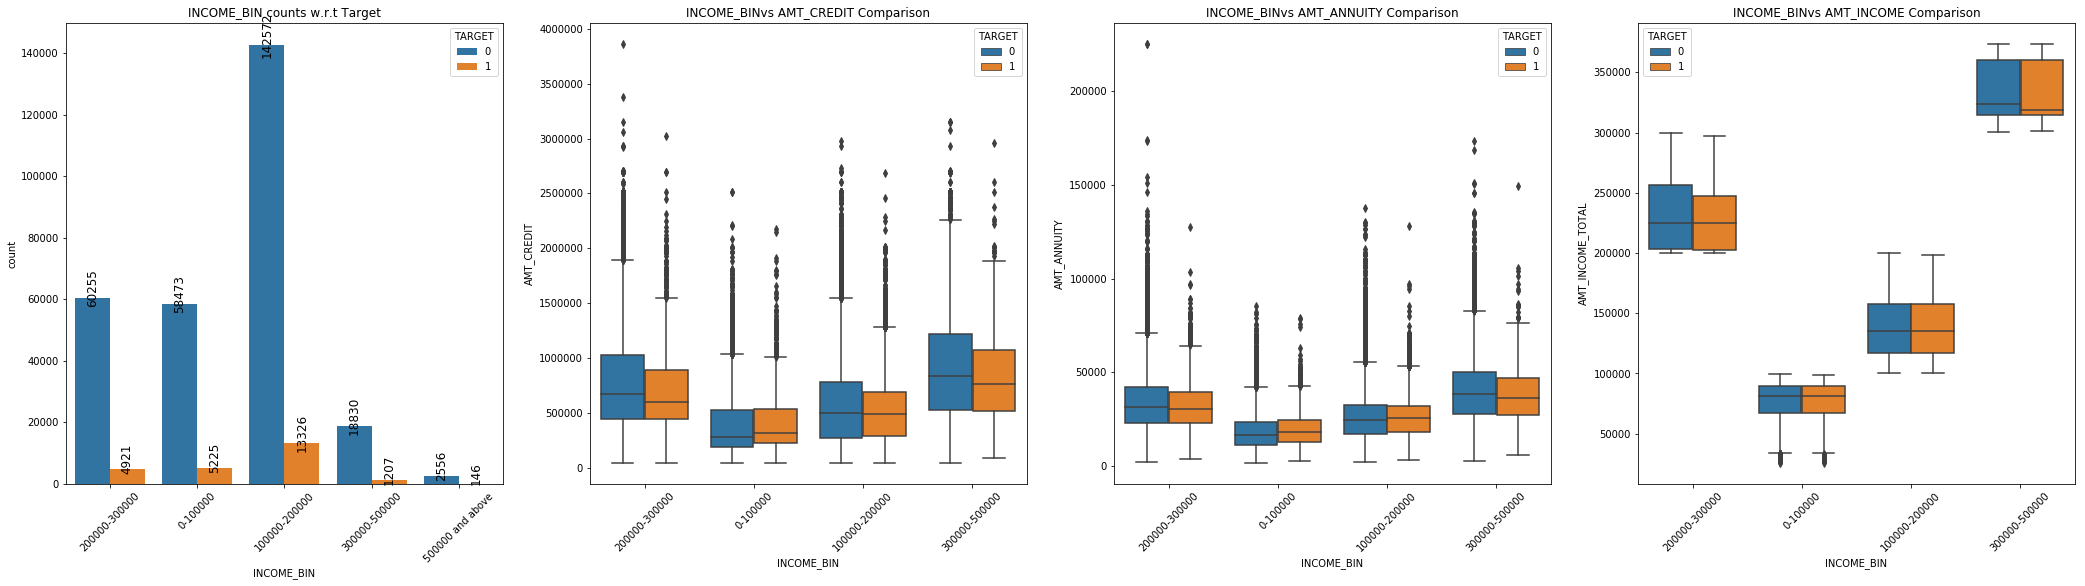

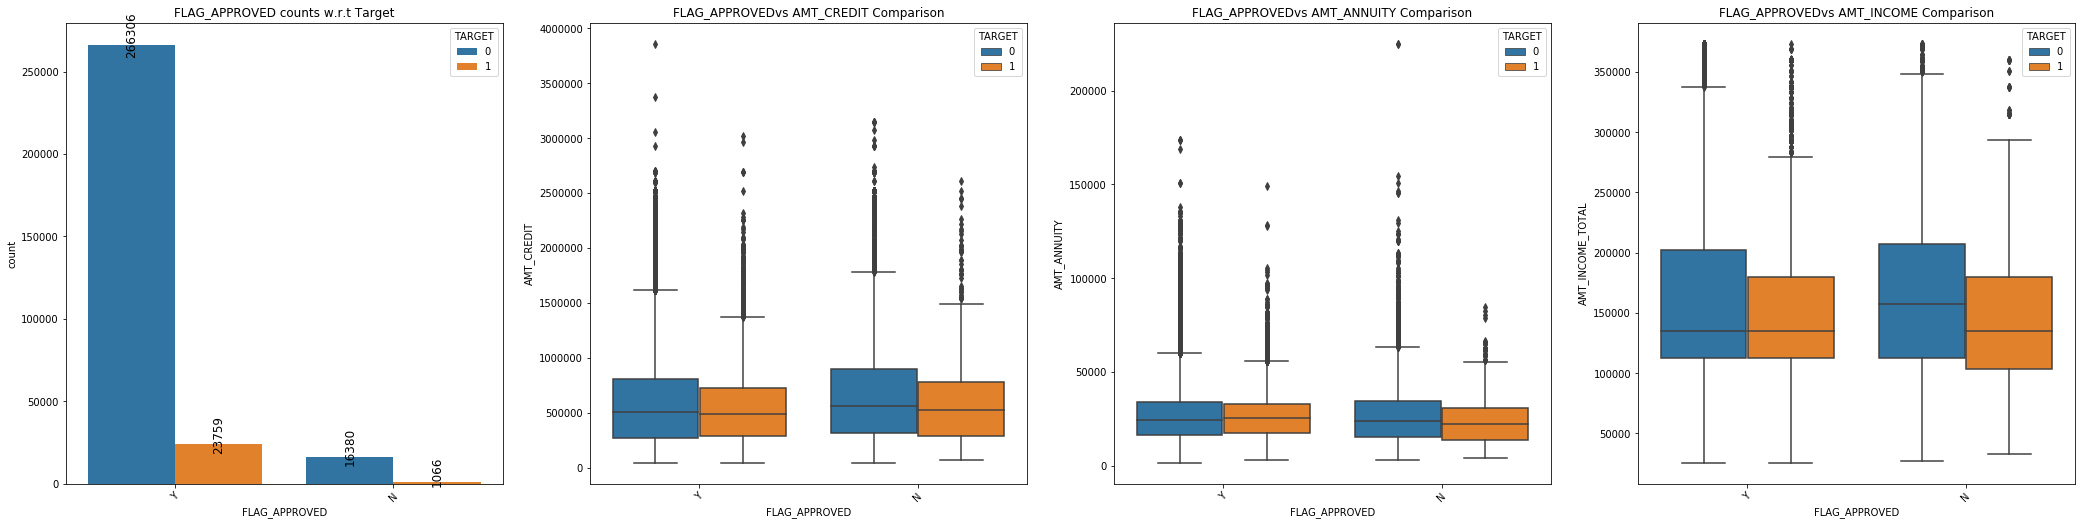

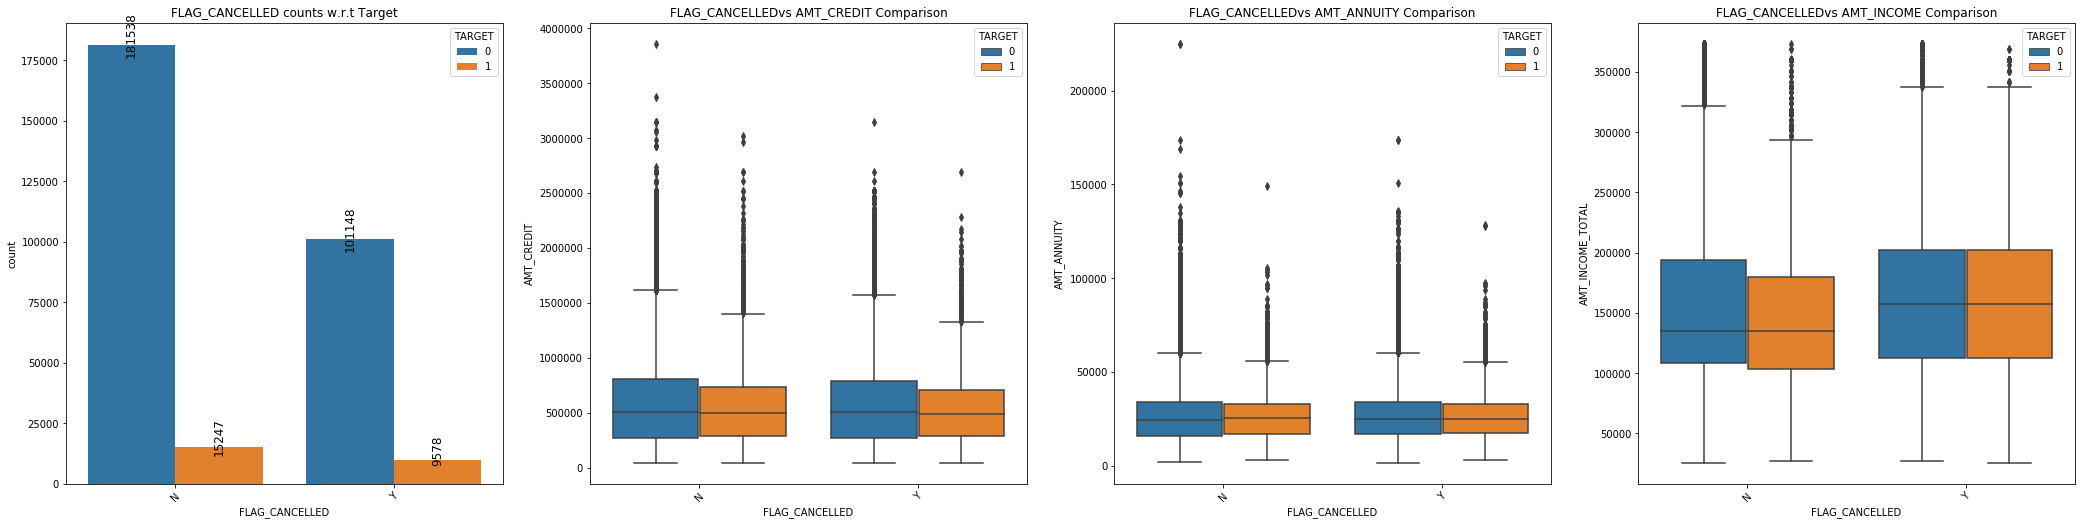

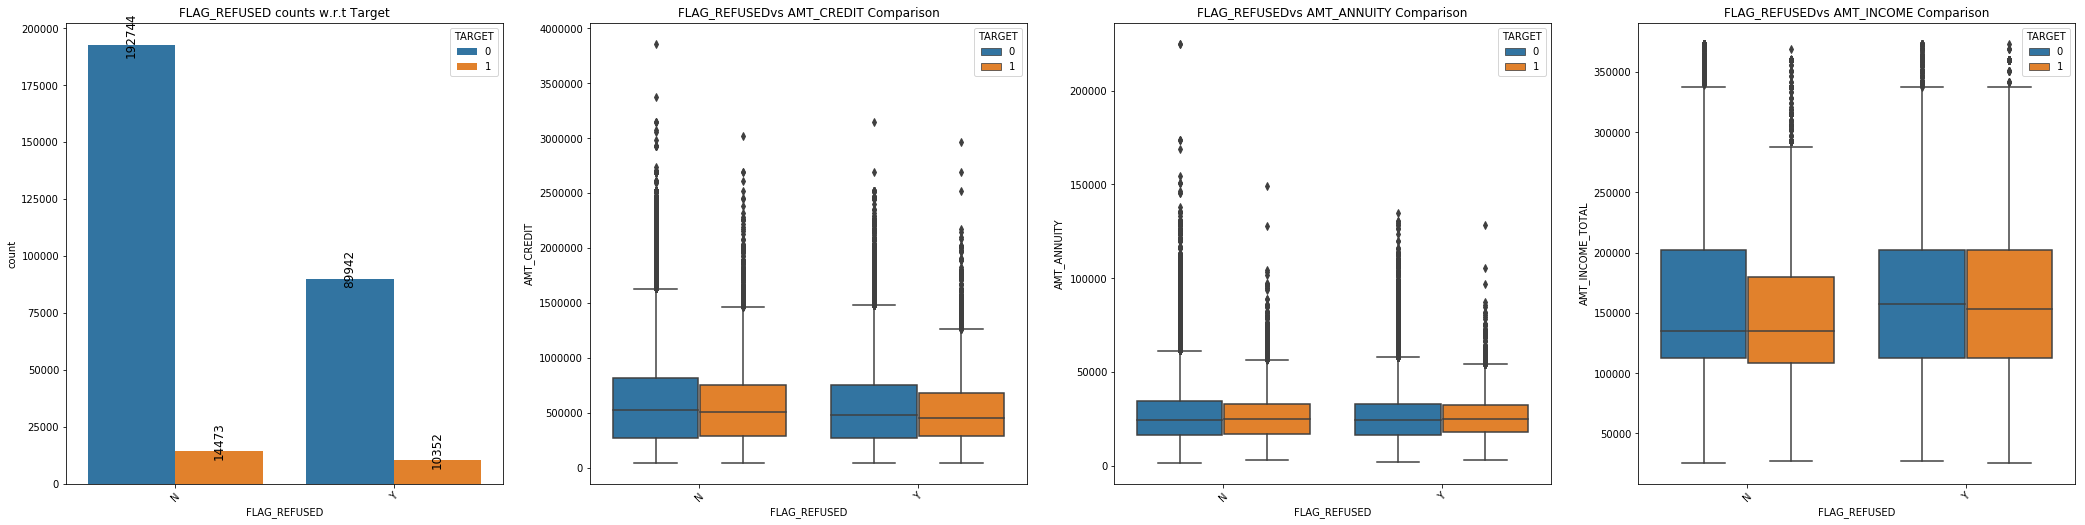

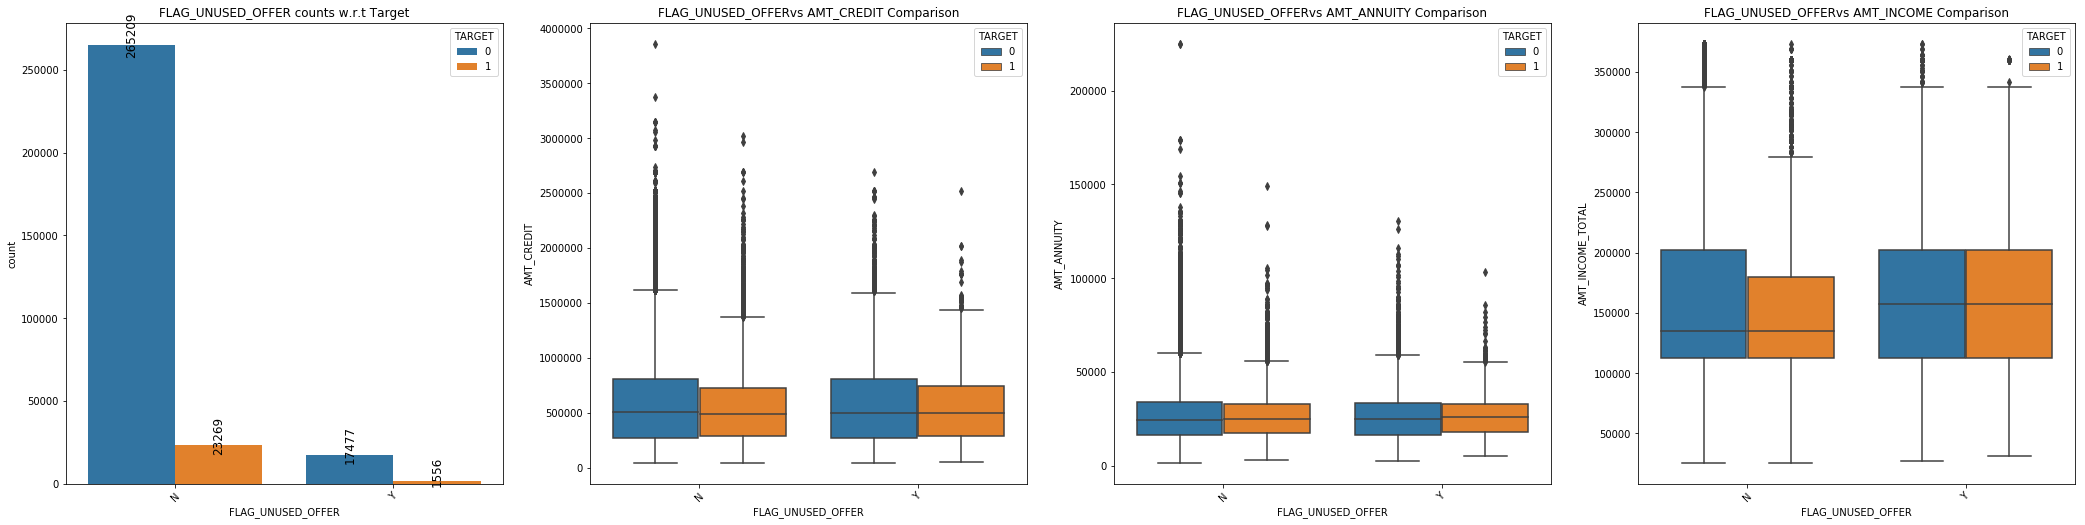

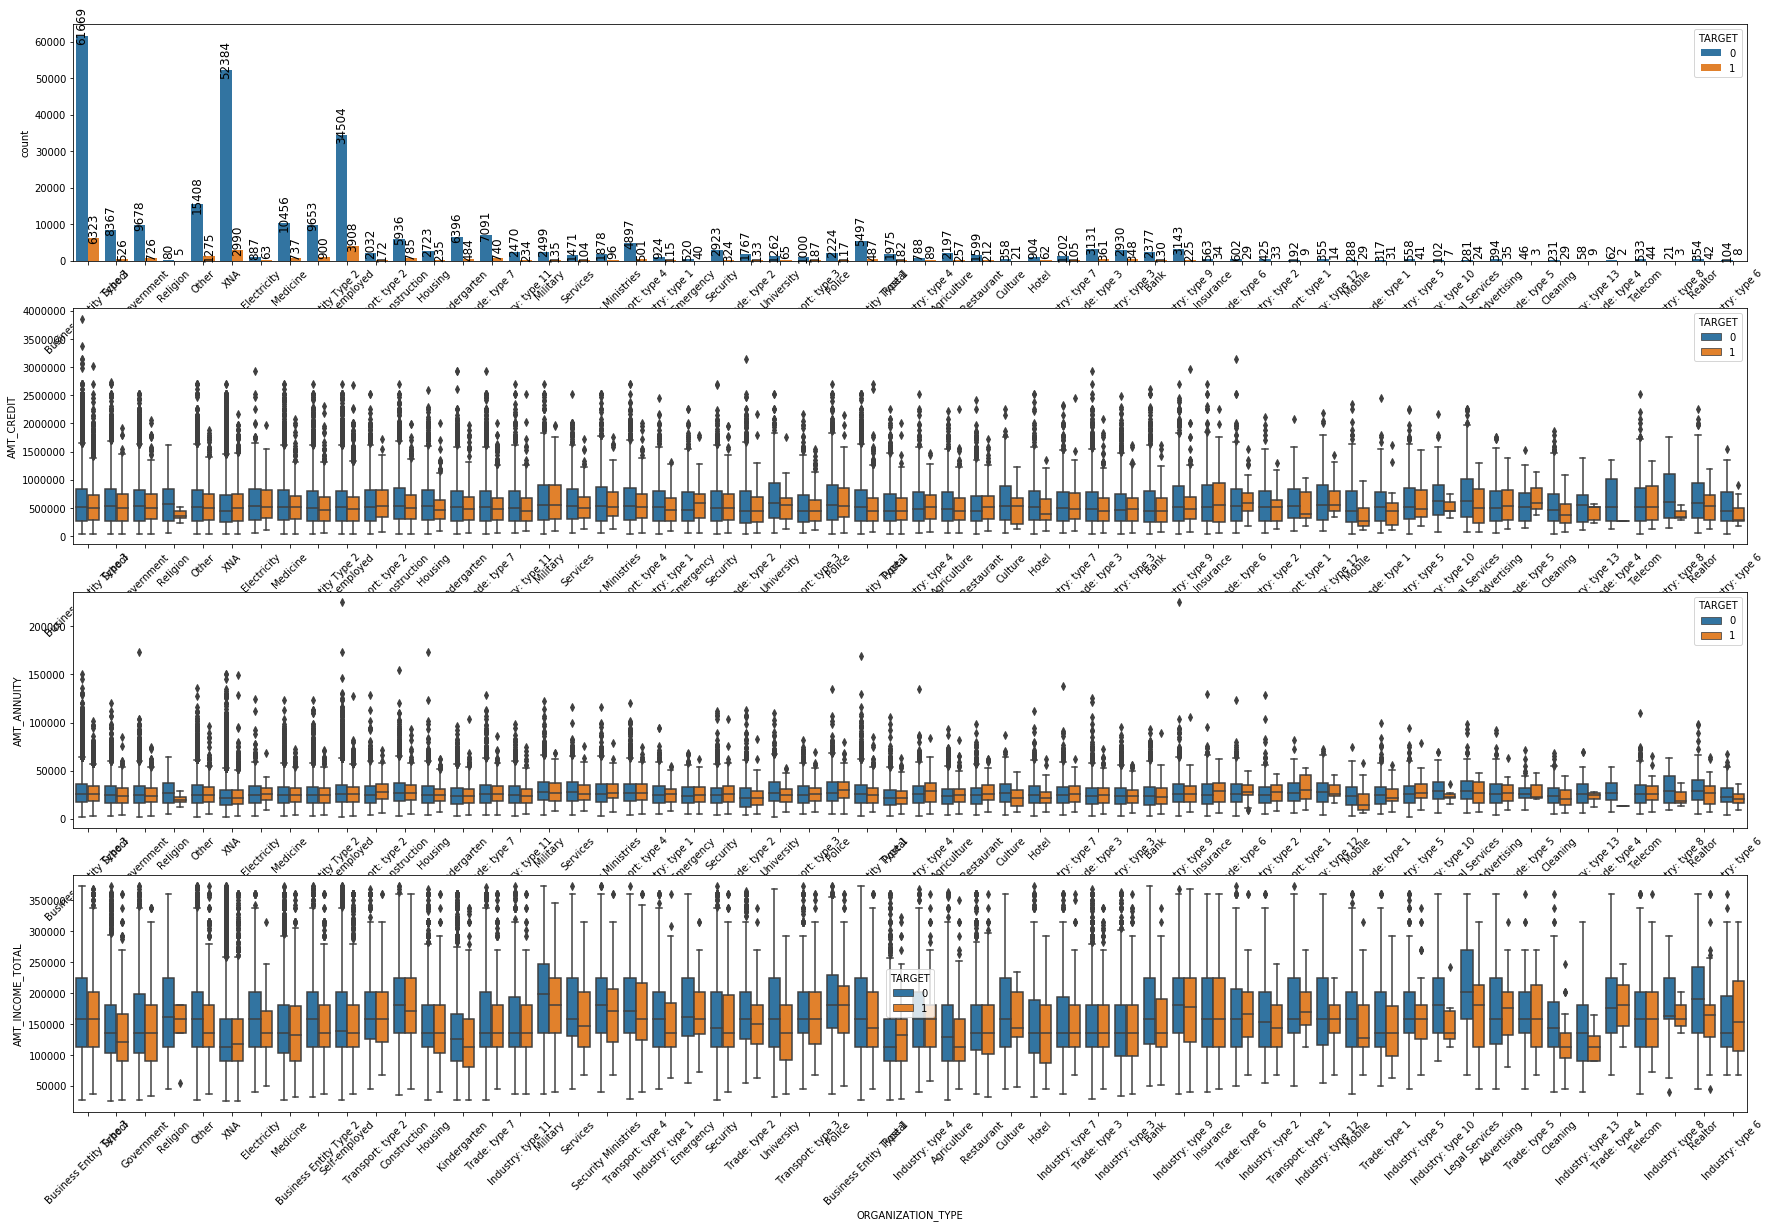

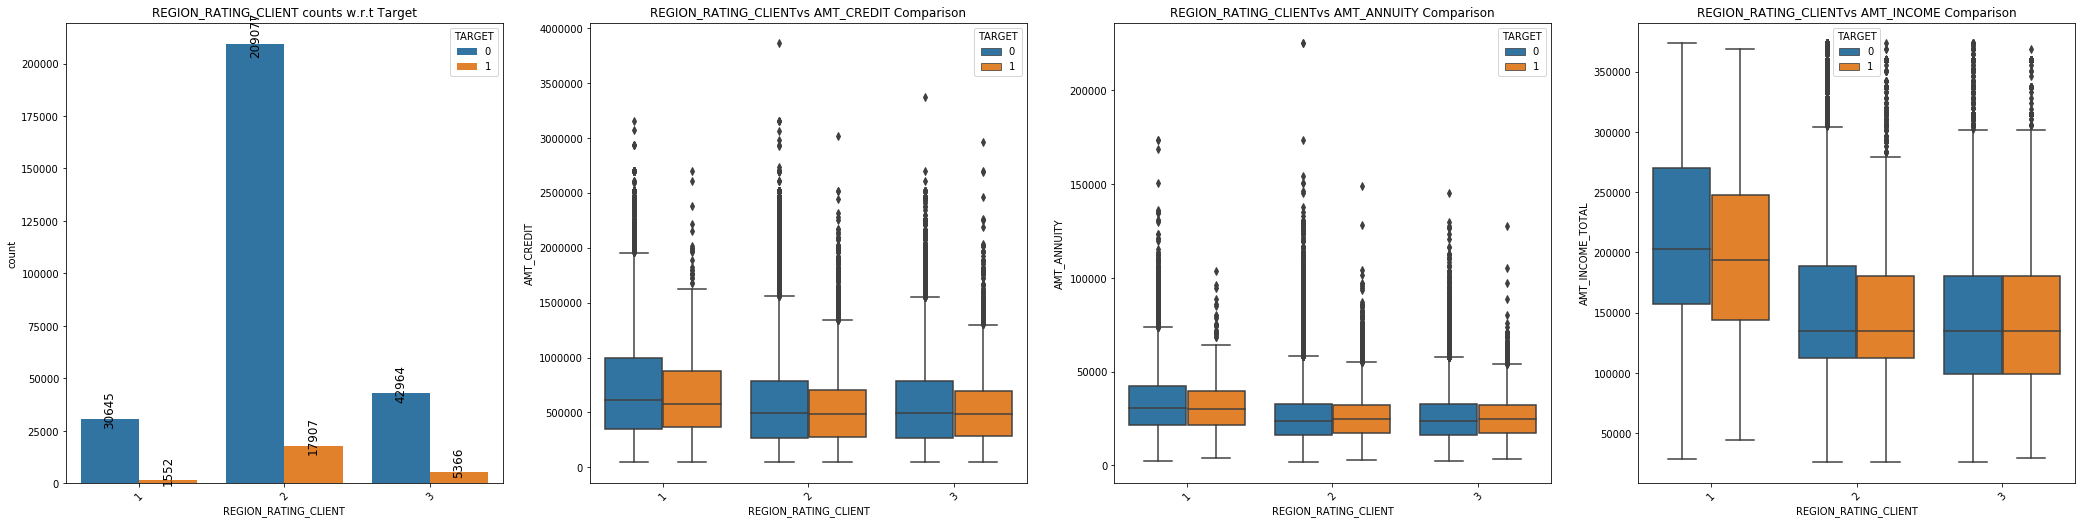

In [61]:
for col in categorical_col:
    Comparison_bar_plot(bank_app,col)
Comparison_bar_plot(bank_app,'ORGANIZATION_TYPE',False)
Comparison_bar_plot(bank_app,'REGION_RATING_CLIENT',True)

#### Correlations in Application dataset(w.r.t TARGET):
##### Categorical values:
- Gender: Payment difficulties rate is marginally high with Gender ‘M’. Payment difficulties of rate of 'F' is at 7% where 'M' is at 10%. Gender ‘M’ Earn more than ‘F’.
- Loan Type: Only ~10% loans are of Type 'Revolving loans’  But High frequencies of it are not repaid. The Spread of cash - loan credit value is more than revolving loans
- Reality/car: Owning a car/house doesn't make any difference in the payment difficulties. Who owns Car earn more than who don’t. same time the  payment difficulties are frequent.
- Income: Most Number of loans are given to 'Working' categories followed by 'Commercial associates' and 'State servant’.
- Family Status: Married people have more difficulties in payments. And the spread of  Credit value is more compare to other categories.
- Locality:  
-- Most number of loans are from Region rating '2’.
-- But the amount of Loan amount and Annuity spread is high in region with rate '1'
-- Payment difficulties are high due to large no. of application from the region got rating '2'
-- Clients with region rating ‘1’ earn more than the rest.
- Loan/Income Range:
    Plots clearly shows the income increasing the annuity and Loan amount increases
    The payment difficulties ratio decreases when the salary increases


In [62]:
# Correlation between LOAN BIN and INCOME BIN
bank_app[['LOAN_BIN', 'INCOME_BIN']].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

LOAN_BIN  INCOME_BIN
LOAN_BIN    1.000000   -0.017872
INCOME_BIN -0.017872    1.000000

- slight negative correlation between Loan Amount and Income Bin

In [63]:
def Comp_Dist_Plots(var,nrow=2):
    
    i = 0
    t1 = bank_app.loc[bank_app['TARGET'] != 0]
    t0 = bank_app.loc[bank_app['TARGET'] == 0]

    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(16,8*nrow))

    for v in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t0.loc[~Outlier_Check(t0['AMT_INCOME_TOTAL']),v], bw=0.5,label="TARGET = 0")
        sns.kdeplot(t1.loc[~Outlier_Check(t1['AMT_INCOME_TOTAL']),v], bw=0.5,label="TARGET = 1")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(v,fontsize=12)
        locs, labels = plt.xticks(rotation=45)
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()

<Figure size 432x288 with 0 Axes>

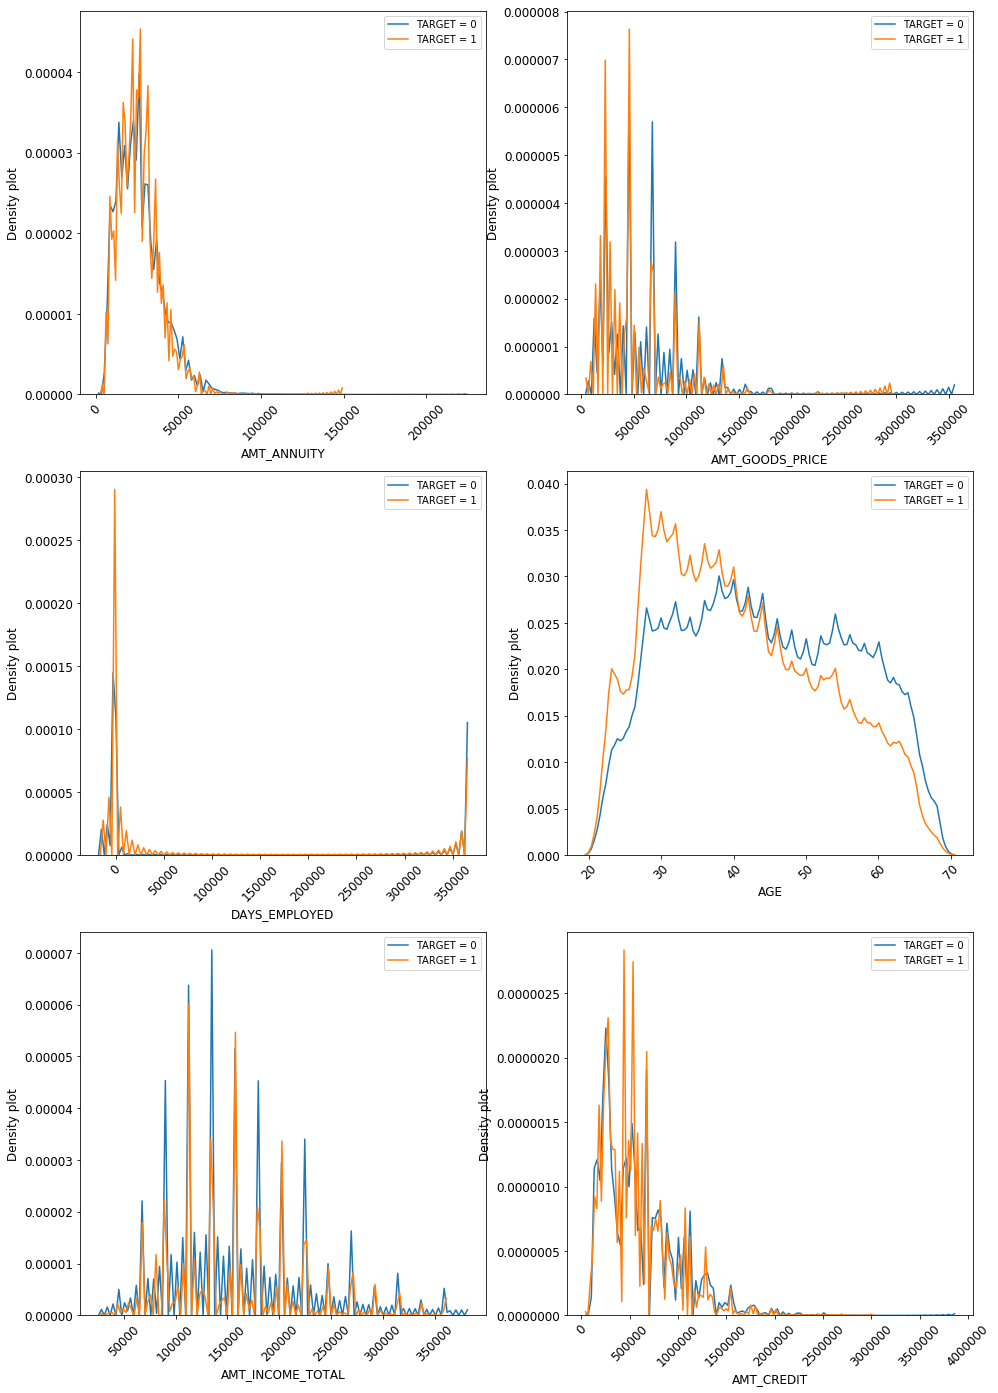

In [64]:
var = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED','AGE','AMT_INCOME_TOTAL','AMT_CREDIT']
Comp_Dist_Plots(var,nrow=3)

- Here we compare the distribution of interval values for values of TARGET = 1 and TARGET = 0



## Analysis of Previous application data seperately

def VariableCounts_mergePlots(col_name,hor_layout=True):
    new_data=prev_app[col_name].value_counts()
    new_df = pd.DataFrame({col_name: new_data.index,'Counts': new_data.values})
    if(hor_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,8))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(14,24))
    s = sns.barplot(ax=ax1, x = col_name, y="Counts",data=new_df)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    for p in s.patches:
            s.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=45, textcoords = 'offset points',fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.show()

In [65]:
categorical_col2= [col for col in prev_app.columns if prev_app[col].dtype in ['object']]
l=['WEEKDAY_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','PRODUCT_COMBINATION','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP']
for col in l:
    if col in categorical_col2:
        categorical_col2.remove(col)
prev_app[categorical_col2].describe().loc['unique'].sort_values()

NAME_PRODUCT_TYPE          3
NAME_CONTRACT_TYPE         4
NAME_CONTRACT_STATUS       4
NAME_PAYMENT_TYPE          4
NAME_CLIENT_TYPE           4
NAME_PORTFOLIO             5
CHANNEL_TYPE               8
CODE_REJECT_REASON         9
NAME_CASH_LOAN_PURPOSE    25
NAME_GOODS_CATEGORY       28
Name: unique, dtype: object

In [66]:
def cat_bar_plot2(col):
    #Calculating Count - Group by 'col'
    col_data=prev_app[col].value_counts()
    new_df = pd.DataFrame({col: col_data.index,'Counts': col_data.values})
    fig, (ax1) = plt.subplots(ncols=1, figsize=(14,6))
    s = sns.barplot(ax=ax1,x = col, y="Counts",data=new_df)
    s.set_xticklabels(s.get_xticklabels(),rotation=50,fontsize=8)
    for p in s.patches:
            s.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=90, textcoords = 'offset points',fontsize=8)

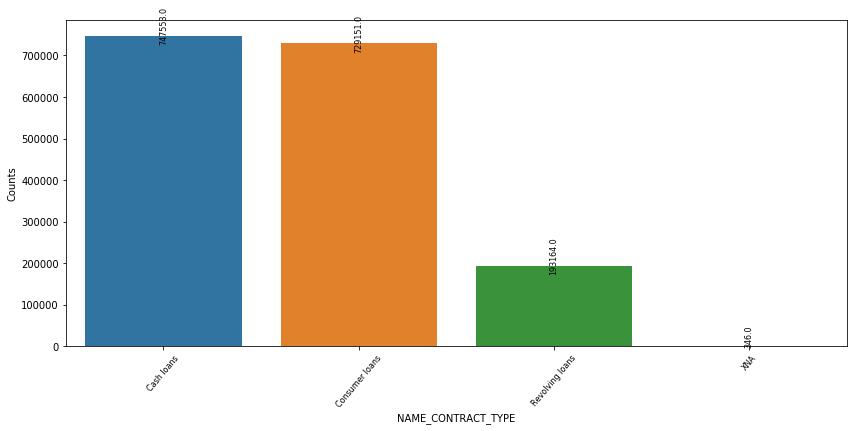

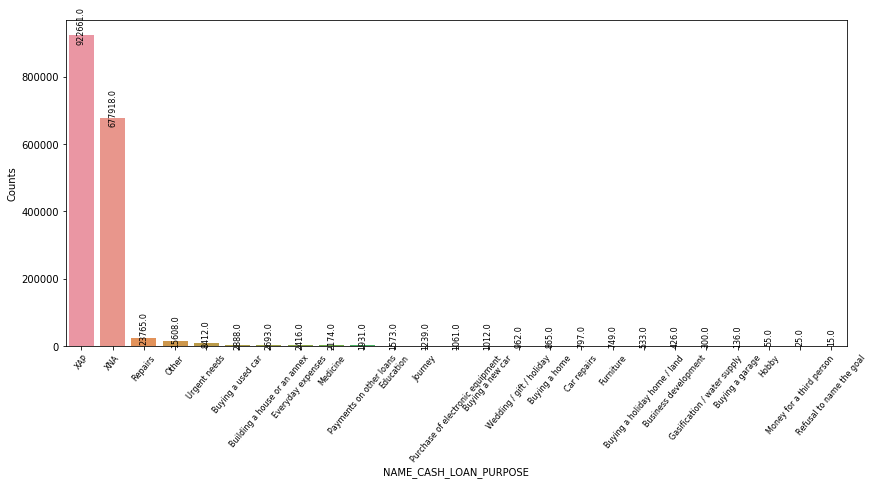

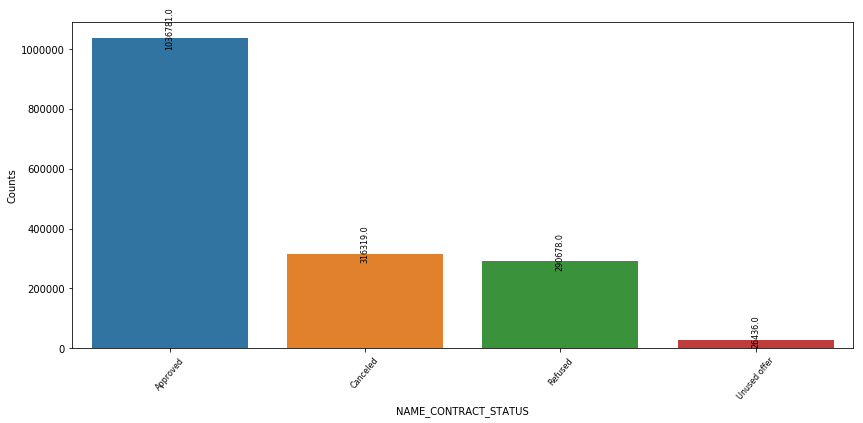

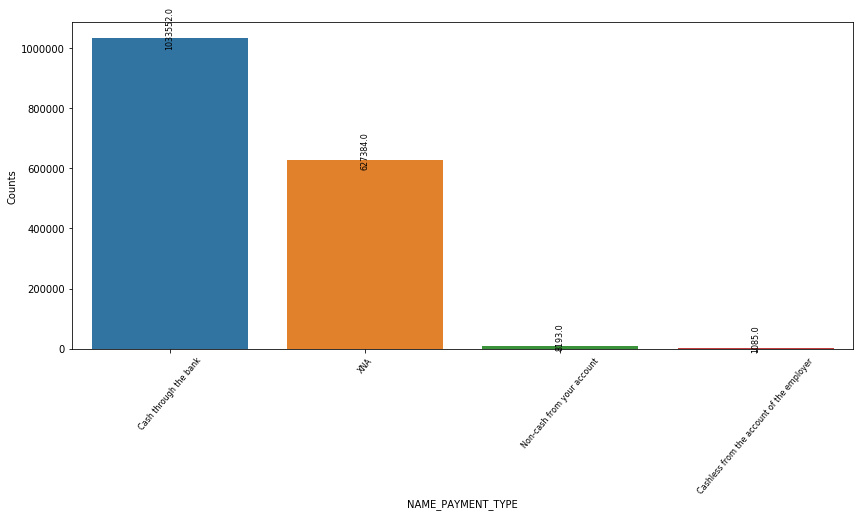

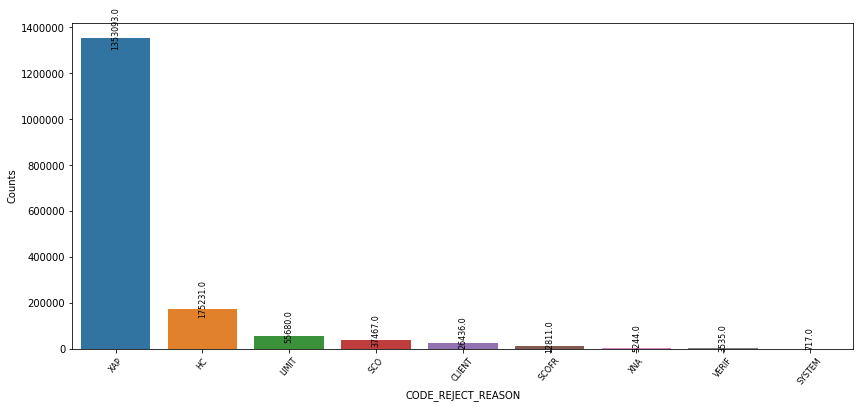

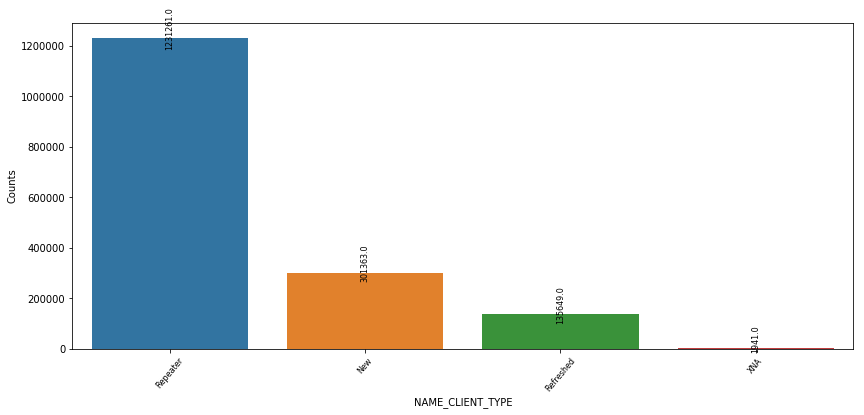

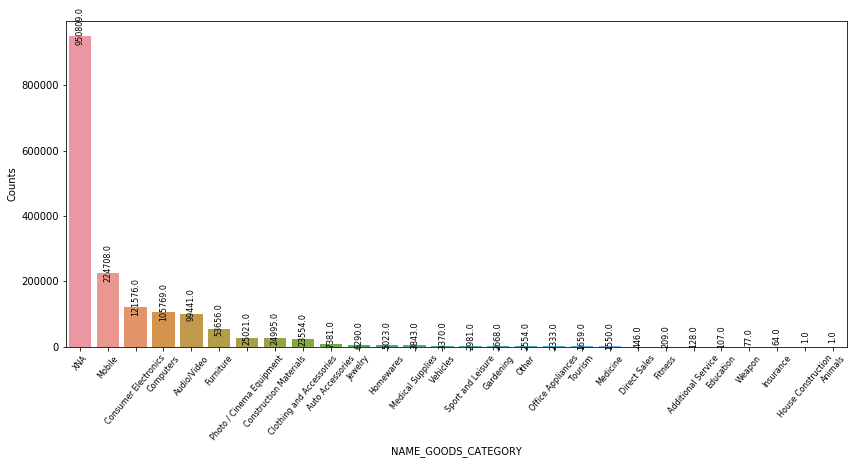

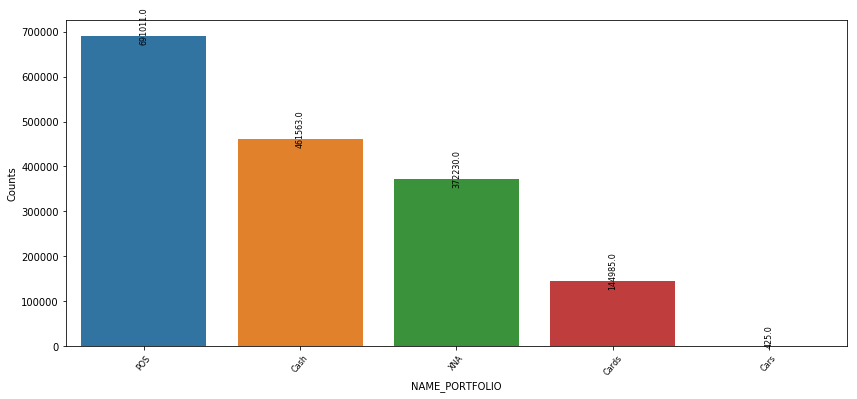

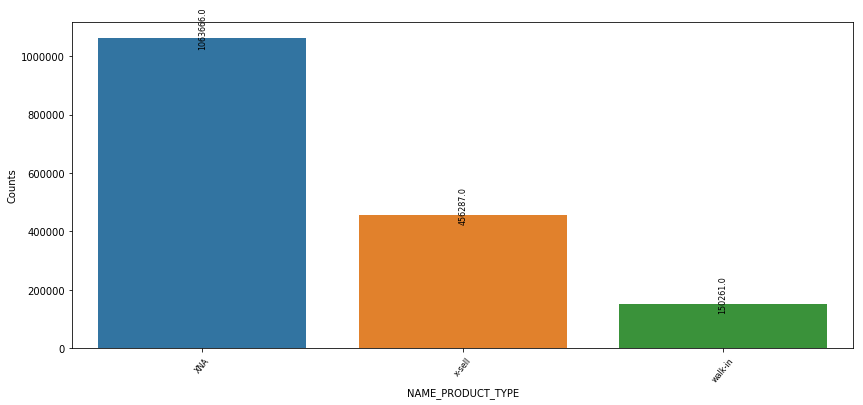

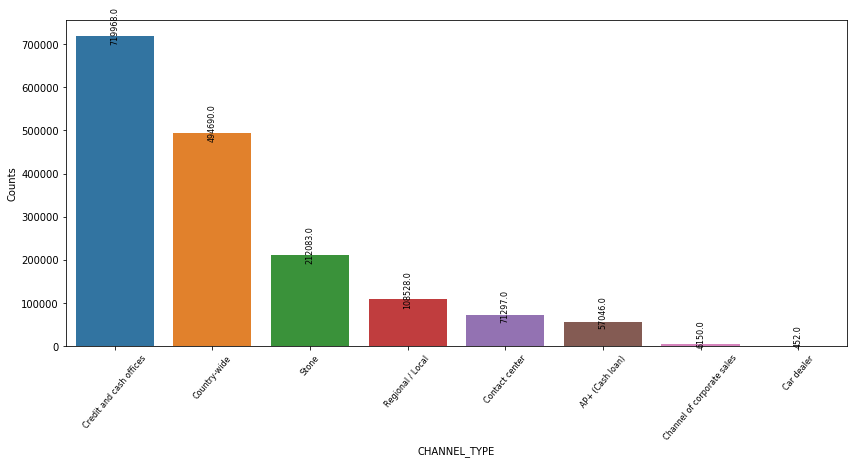

In [67]:
#Exploring the Categorical data
for col in categorical_col2:
    cat_bar_plot2(col)

#### Insights:

   ##### NAME_CONTRACT_TYPE:
- Most of the people applied for Cash Loans and Consumer Loans.
##### NAME_CASH_LOAN_PURPOSE:
- In most cases the loan purpose were not known and few people got the loans for other needs,urgent needs and Repairs.
##### NAME_CONTRACT_STATUS:
- For nearly 50% of times the loan was approved.
##### NAME_PAYMENT_TYPE:
- Mostly used payment method is Cash through the bank.
##### CODE_REJECT REASON:
- The code reject reason for most of the cases is not known and for some cases reasons were HC and LIMIT.
##### NAME_CLIENT_TYPE:
- More than 50% of clients are repeaters who apply for the loans regularly and some where new clients.
##### NAME_GOODS_CATEGORY:
- Goods category that people mention for loans were Mobiles, Consumer Electronics and Computers in many cases.
##### NAME_PORTFOLIO:
- Most of the investments were POS and Cash for most of the clients.
##### CHANNEL_TYPE:
- We acquire the clients through Credit and cash offices and Country wide for more than 50% of the clients.

In [68]:
#Filling Target from current application
cli_target=bank_app['TARGET'].groupby(bank_app['TARGET'].index).max()

prev_app['TARGET'] = prev_app['SK_ID_CURR'].map(cli_target).fillna(0).astype(int)



In [69]:
categorical_col_prev = [col for col in prev_app.columns if prev_app[col].dtype in ['object']]
prev_app[categorical_col_prev].describe().loc['unique'].sort_values()



FLAG_LAST_APPL_PER_CONTRACT     2
NAME_PRODUCT_TYPE               3
NAME_CONTRACT_TYPE              4
NAME_CONTRACT_STATUS            4
NAME_PAYMENT_TYPE               4
NAME_CLIENT_TYPE                4
NAME_PORTFOLIO                  5
NAME_YIELD_GROUP                5
WEEKDAY_APPR_PROCESS_START      7
CHANNEL_TYPE                    8
CODE_REJECT_REASON              9
NAME_SELLER_INDUSTRY           11
PRODUCT_COMBINATION            17
NAME_CASH_LOAN_PURPOSE         25
NAME_GOODS_CATEGORY            28
Name: unique, dtype: object

In [70]:
#removing categories column which got more than 10 values
categorical_col_prev.remove('NAME_SELLER_INDUSTRY')
categorical_col_prev.remove('PRODUCT_COMBINATION')
categorical_col_prev.remove('NAME_CASH_LOAN_PURPOSE')
categorical_col_prev.remove('NAME_GOODS_CATEGORY')



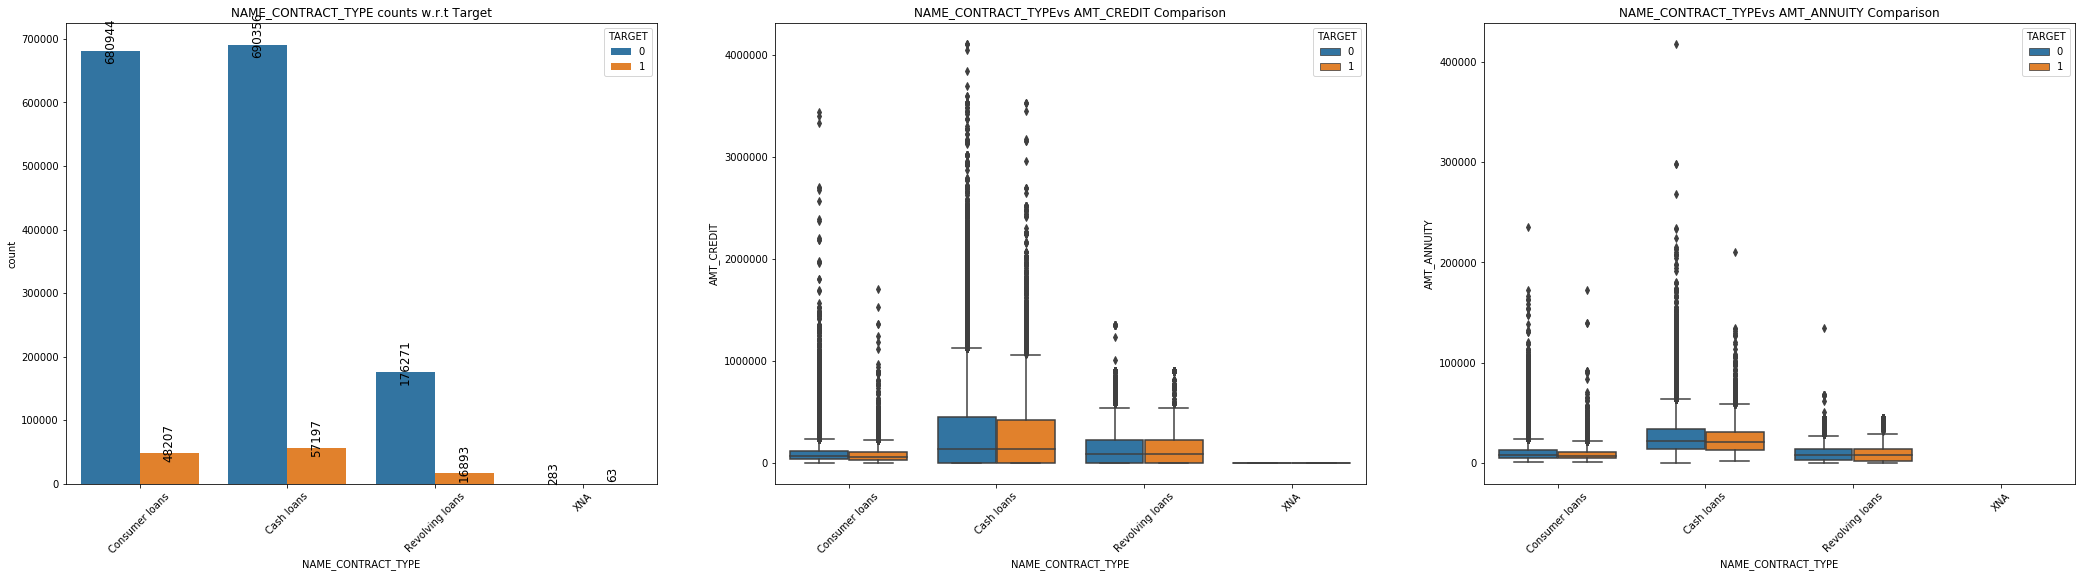

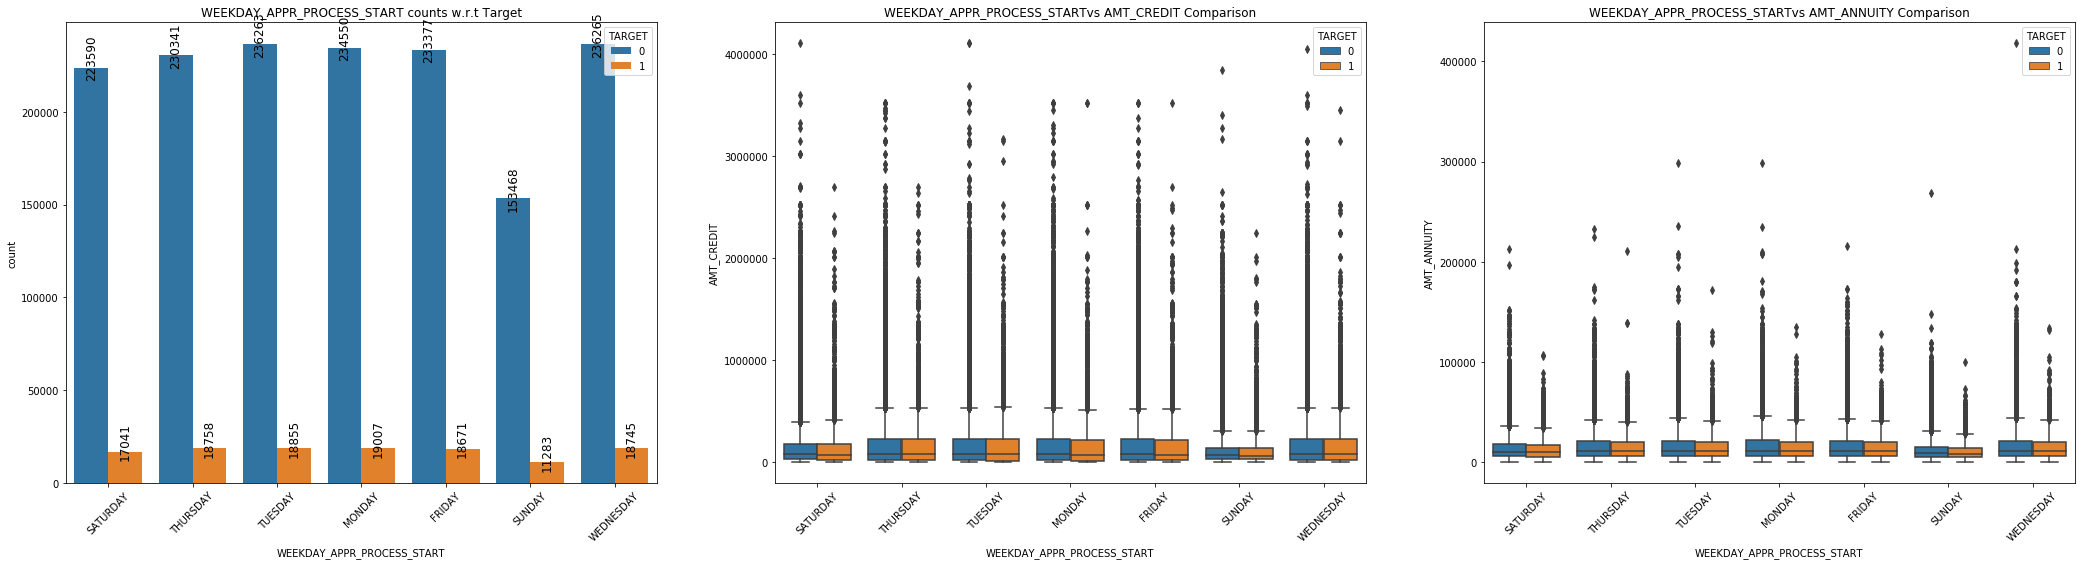

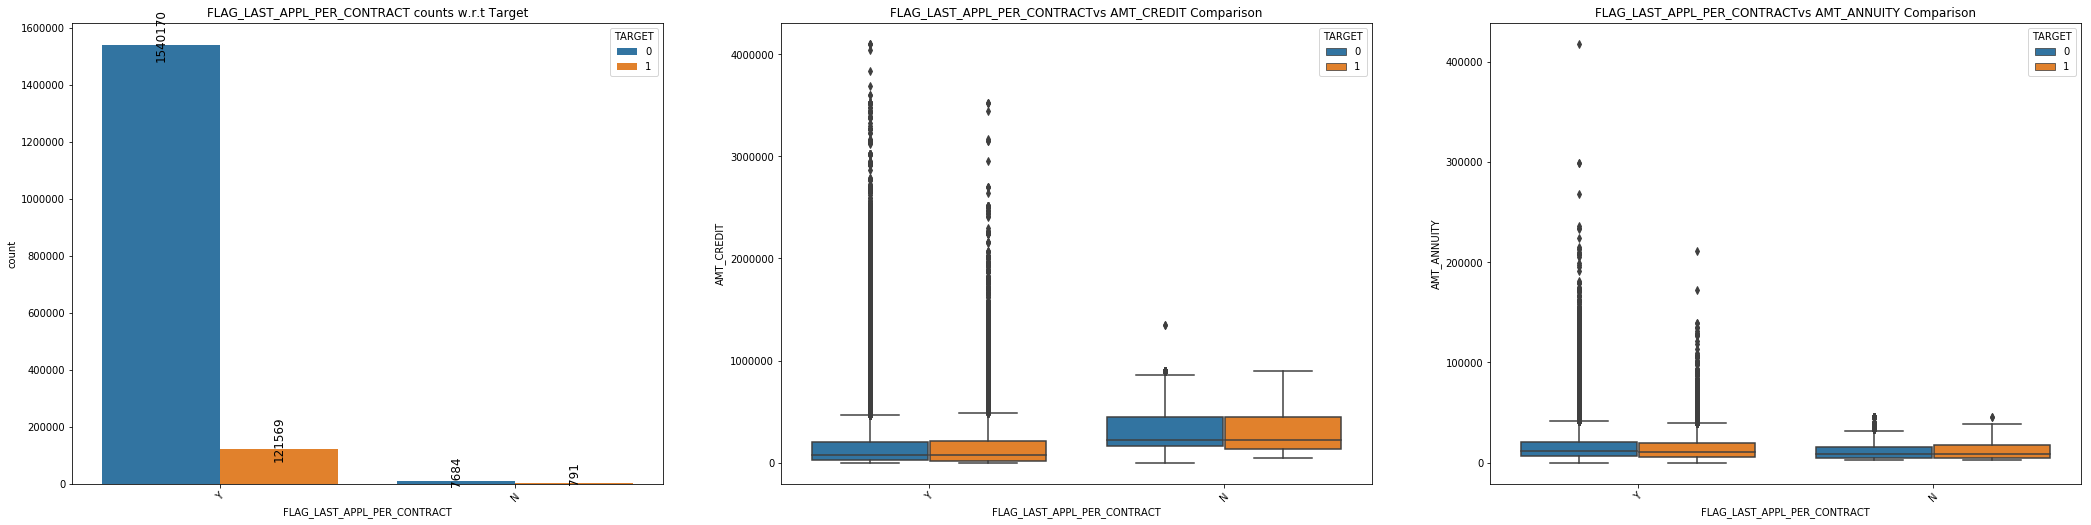

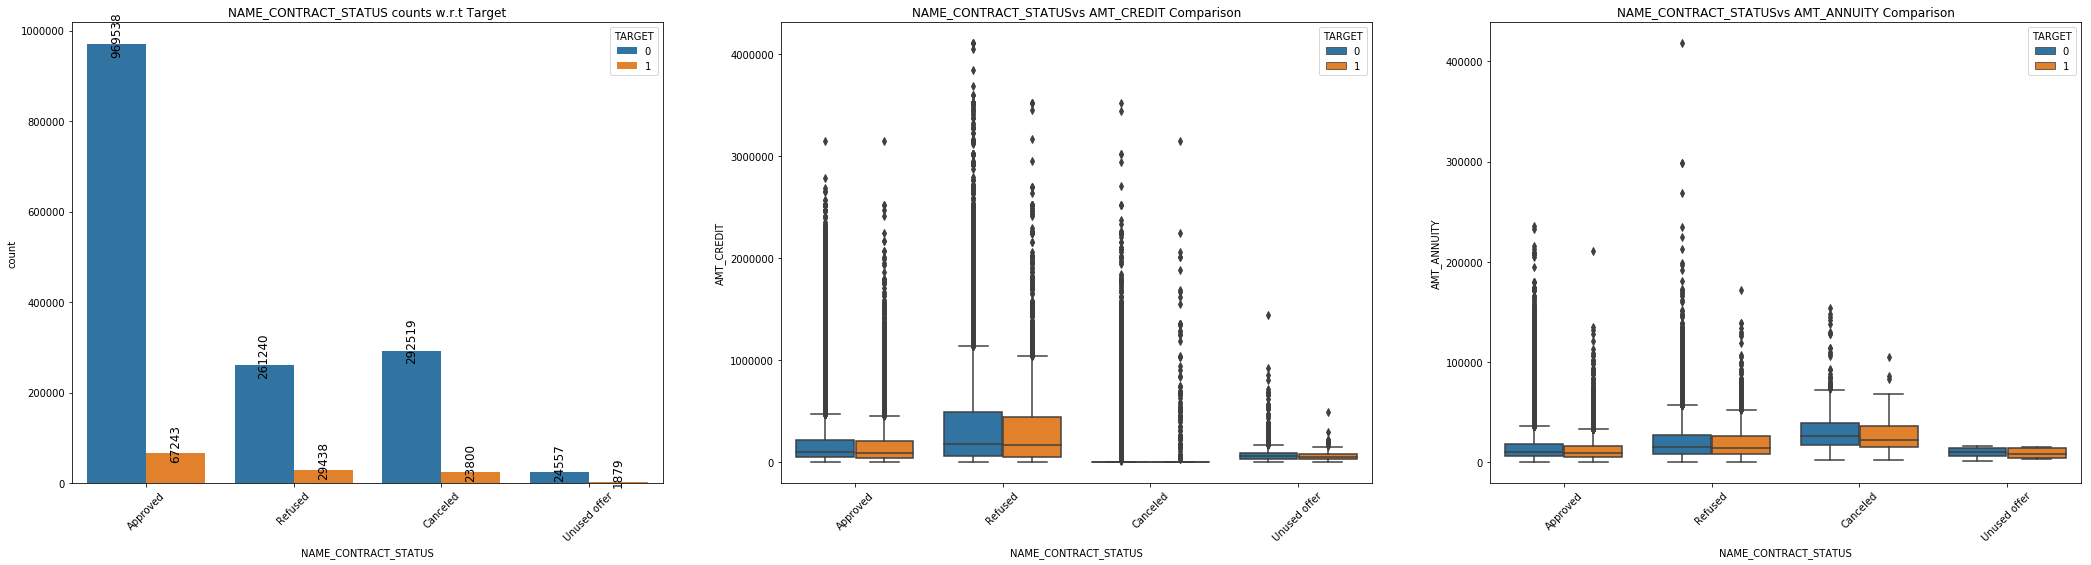

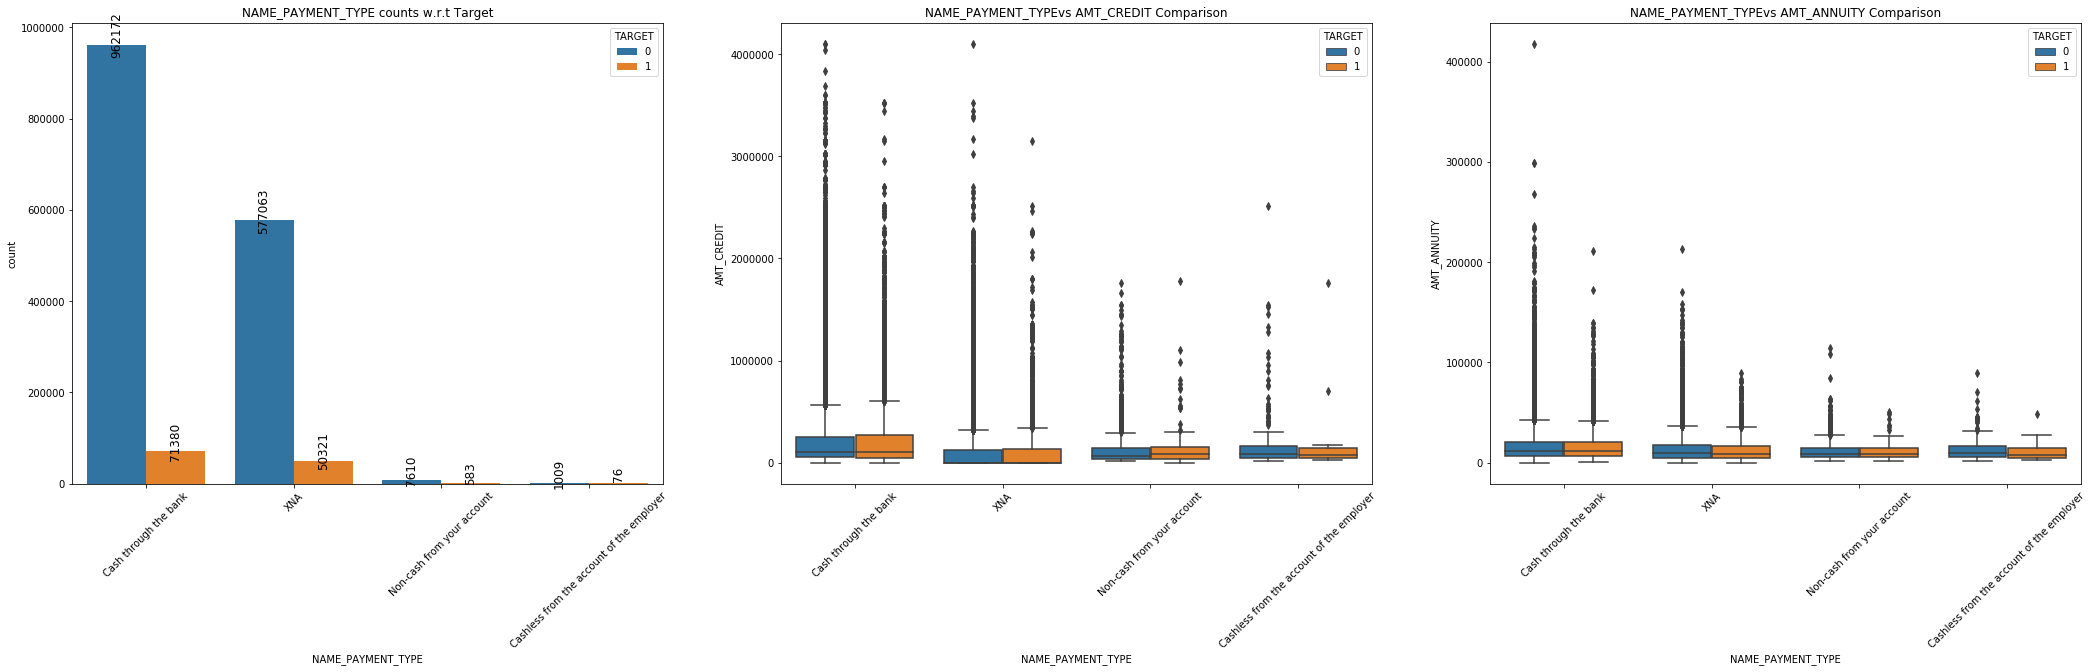

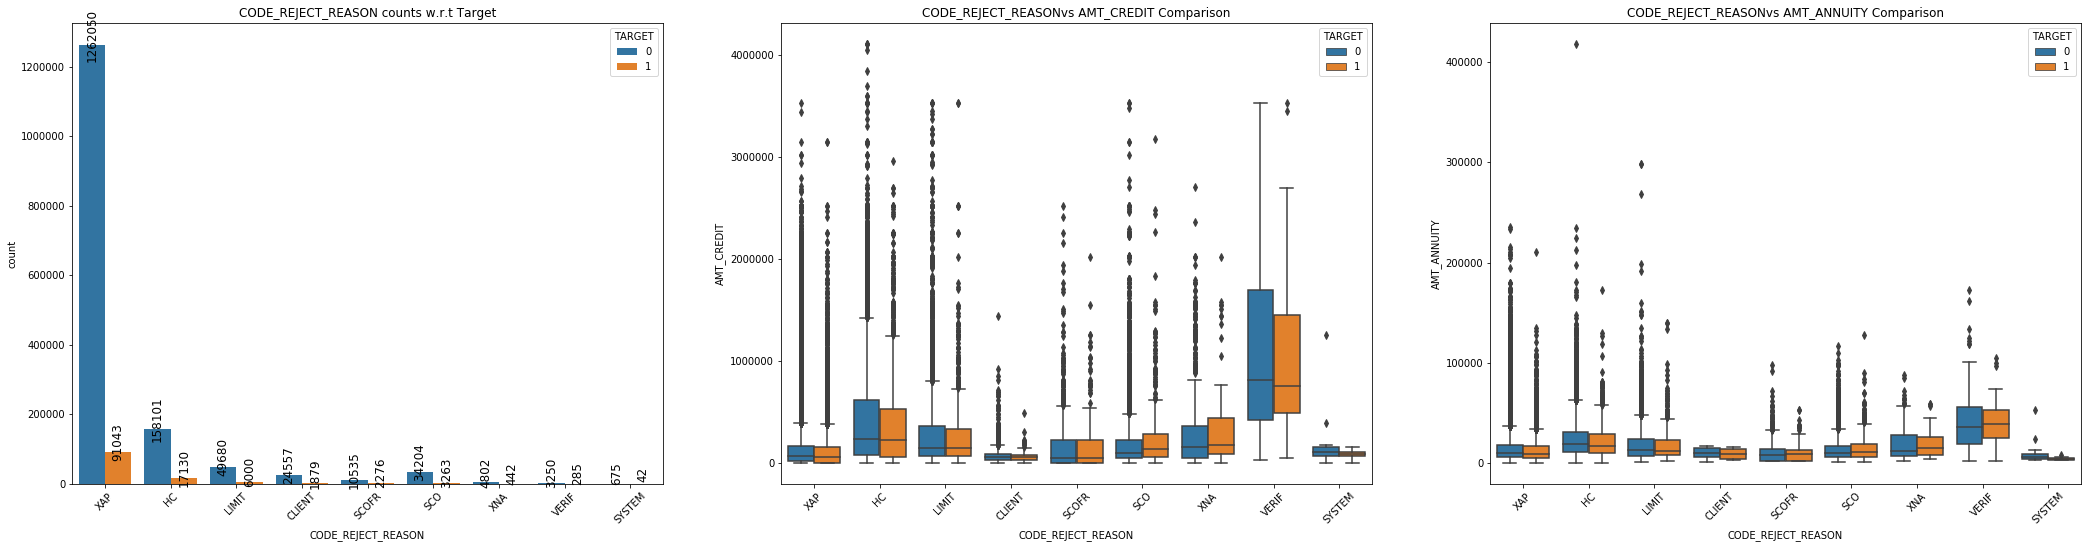

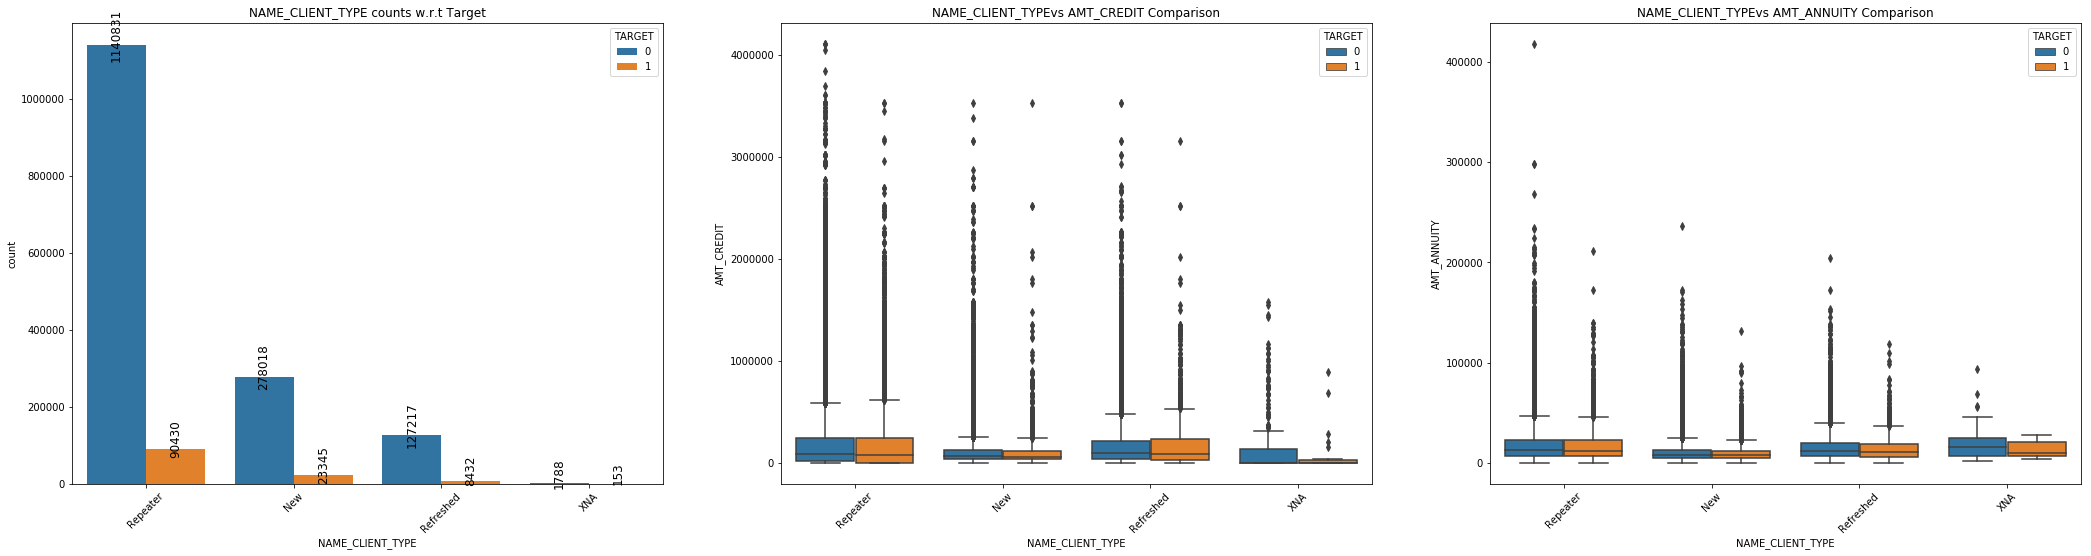

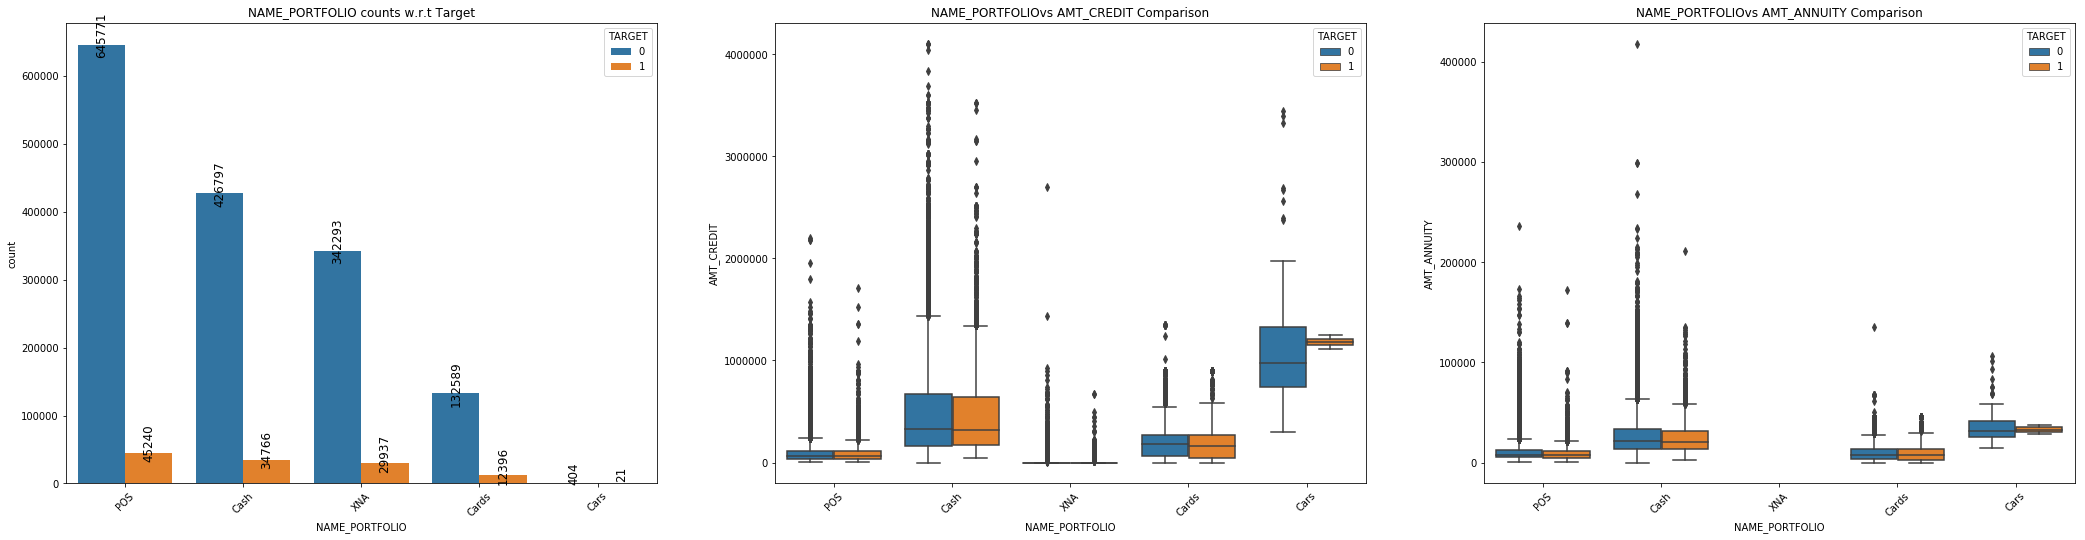

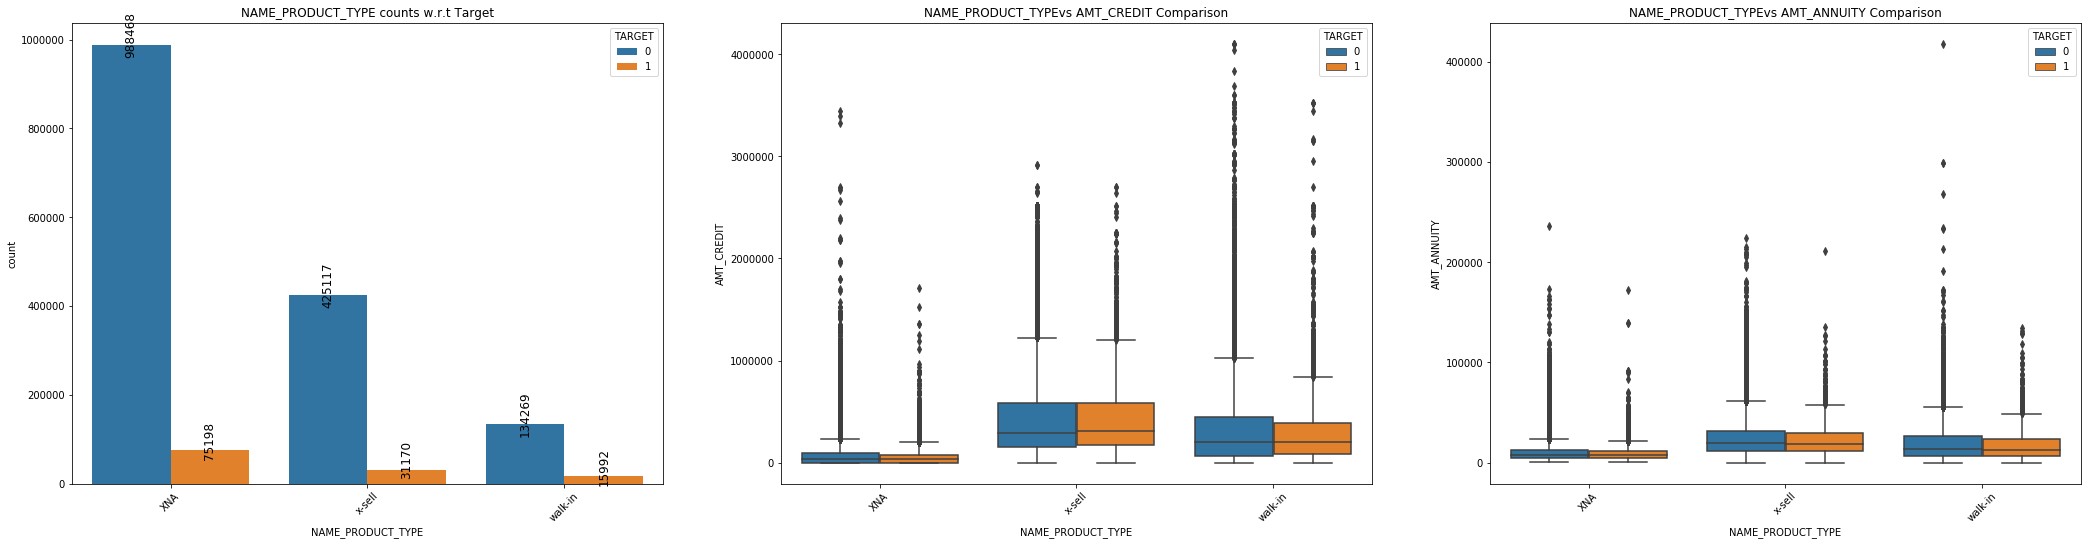

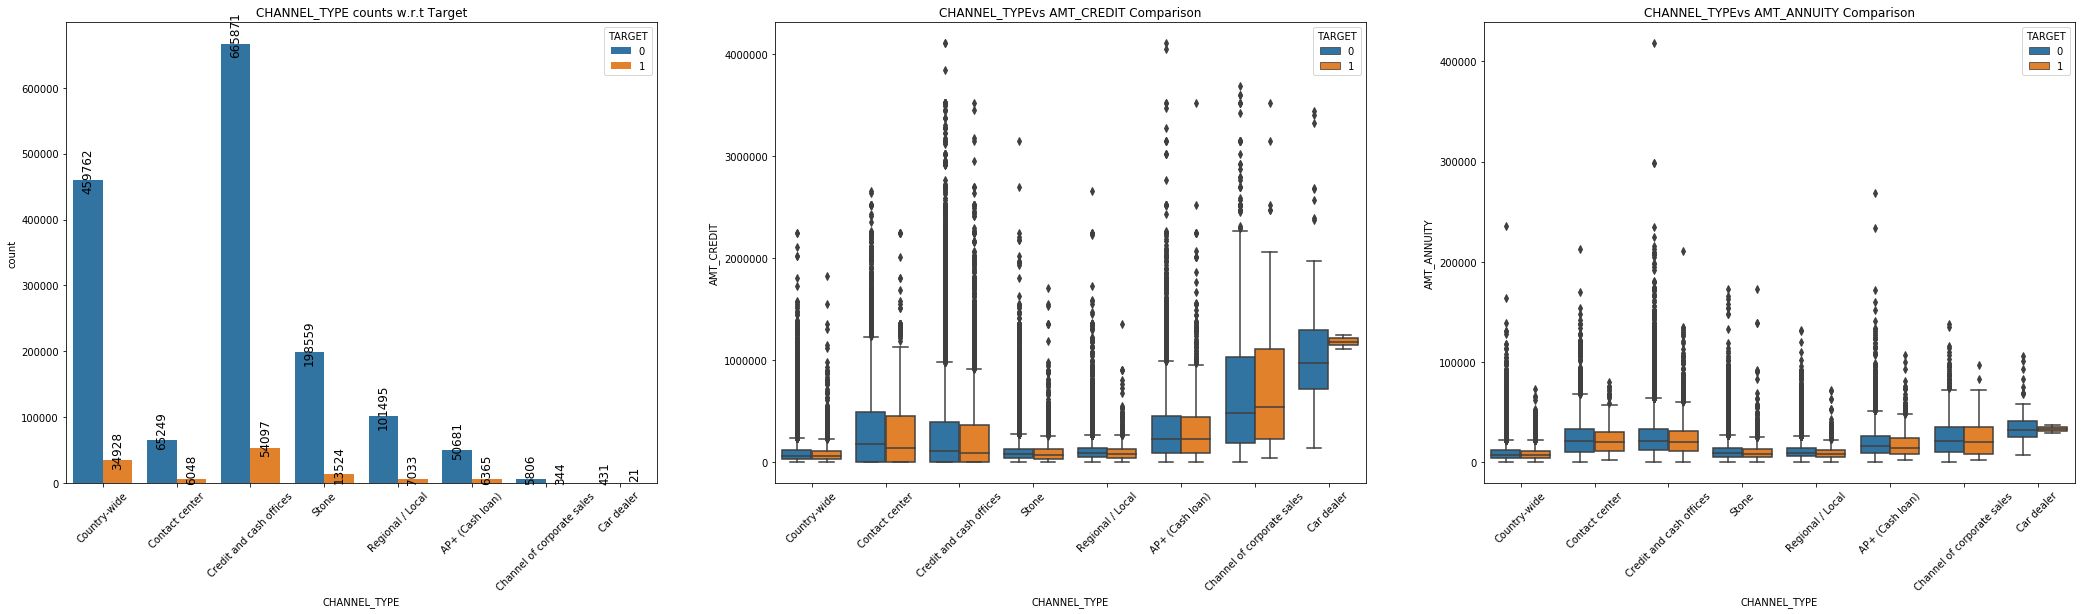

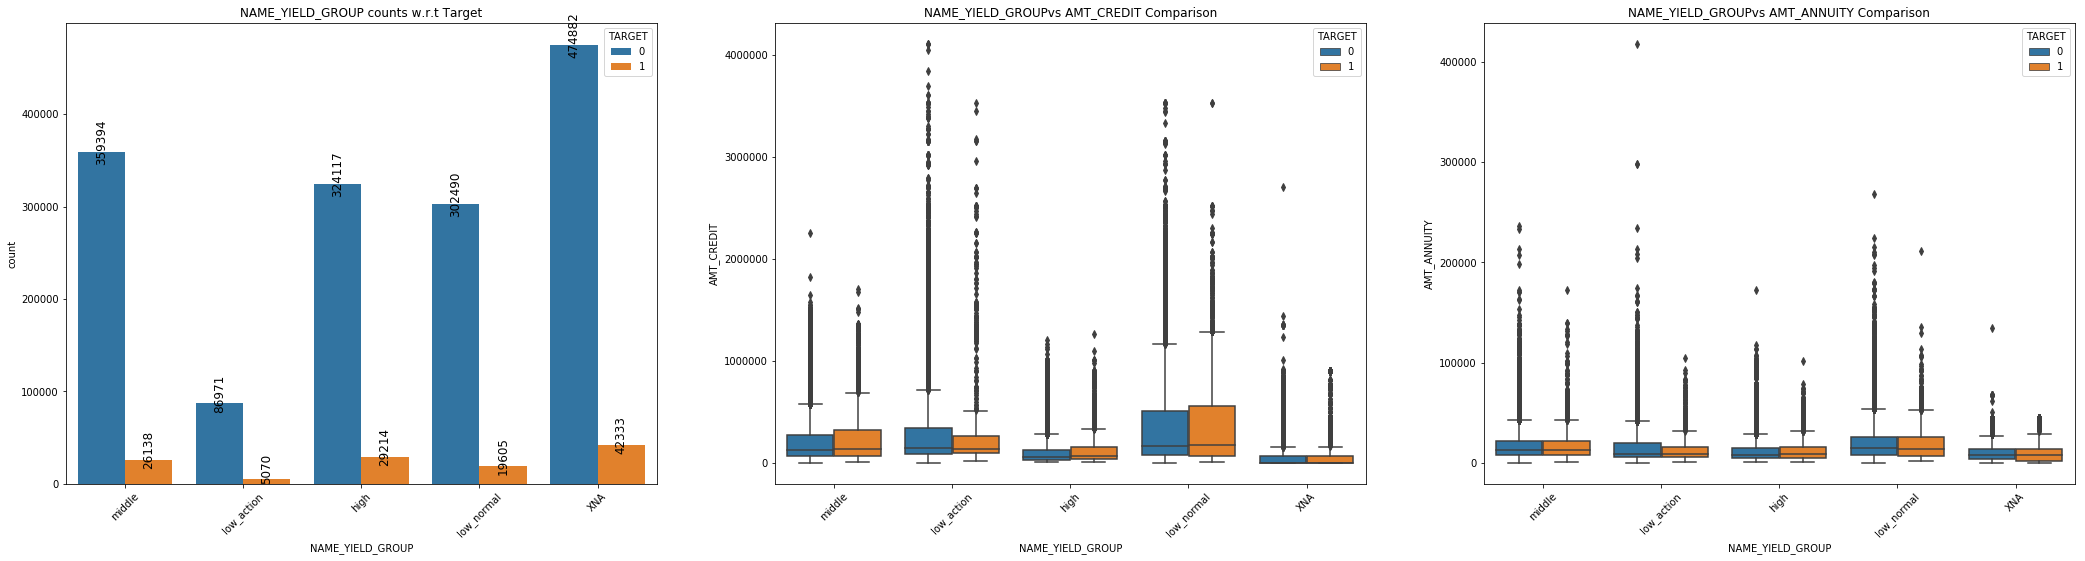

In [71]:
# plotting categorical values
for col in categorical_col_prev:
    Comparison_bar_plot(prev_app,col,prev=False)

#### Inference: 
- Here we add the target variable to the previous application data from the application data using the SK_ID_CURR and we see the counts of categorical variables for both target 1 and 0 in the previous application.

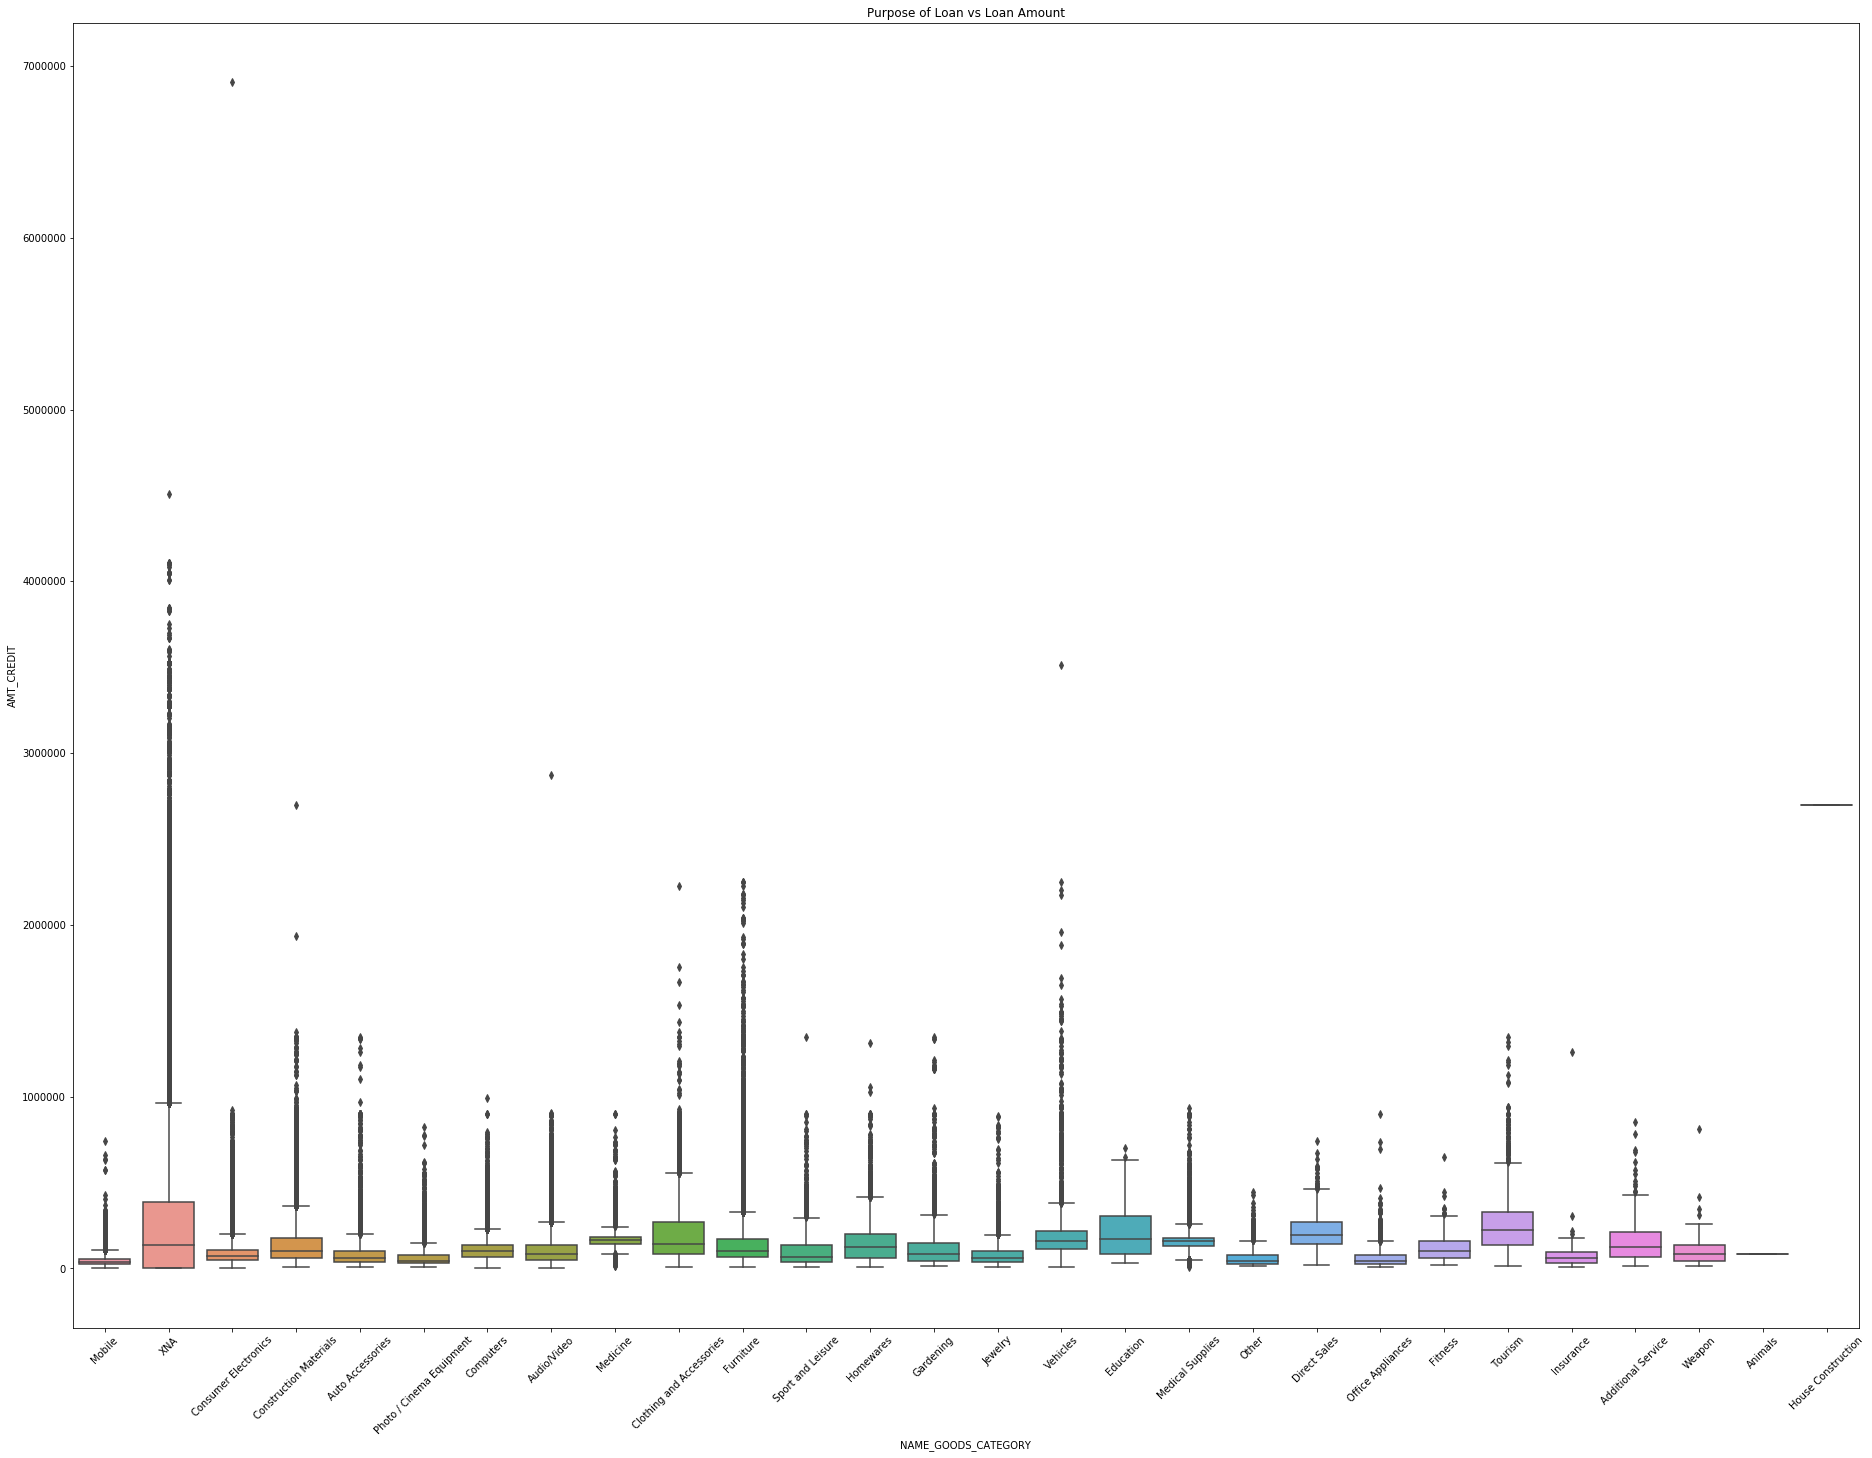

In [72]:

plt.figure(figsize=(32,24))
sns.boxplot(data =prev_app, x='NAME_GOODS_CATEGORY', y='AMT_CREDIT')
plt.title('Purpose of Loan vs Loan Amount')
plt.xticks(rotation=45)
plt.show()


In [73]:
prev_t0 = prev_app[prev_app['TARGET']==0].select_dtypes(include=numerics).drop(['SK_ID_PREV','SK_ID_CURR'],axis=1)
prev_corr_t0 = prev_t0.corr()

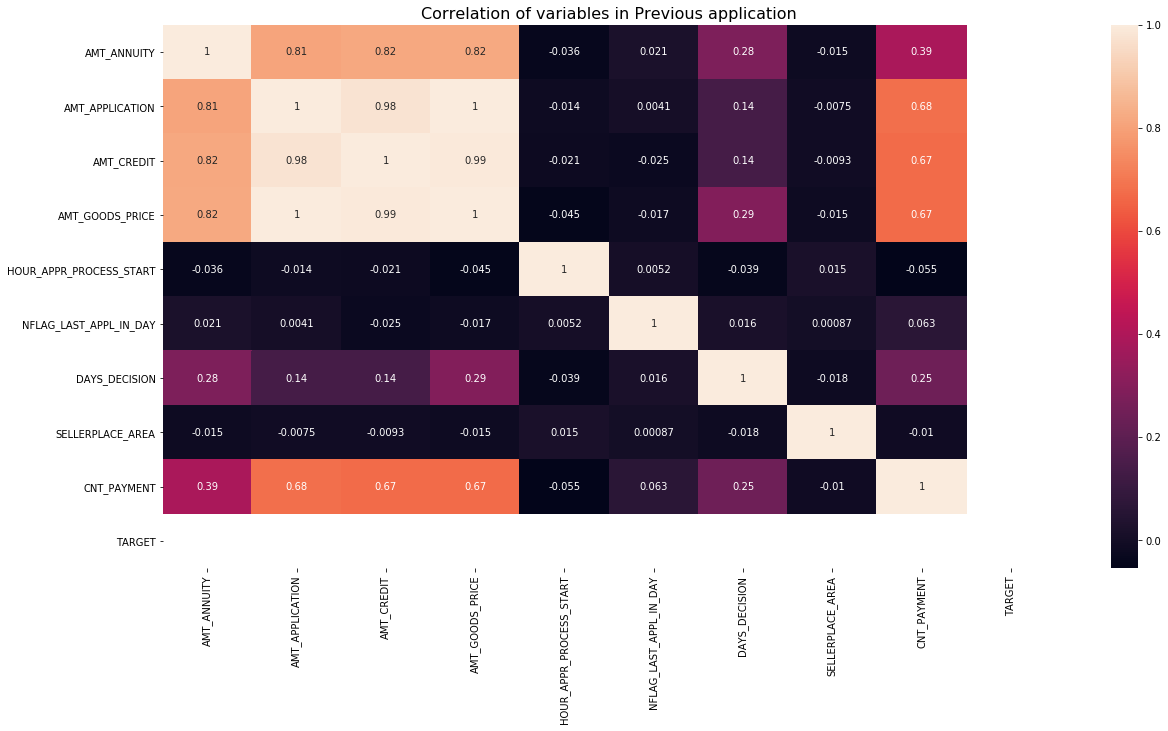

In [74]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title("Correlation of variables in Previous application",fontsize=16)
sns.heatmap(prev_corr_t0, xticklabels=prev_corr_t0.columns,yticklabels=prev_corr_t0.columns,annot=True)

In [75]:
prev_t1 = prev_app[prev_app['TARGET']==1].select_dtypes(include=numerics).drop(['SK_ID_PREV','SK_ID_CURR'],axis=1).corr()
prev_corr_t1 = prev_t1.corr()

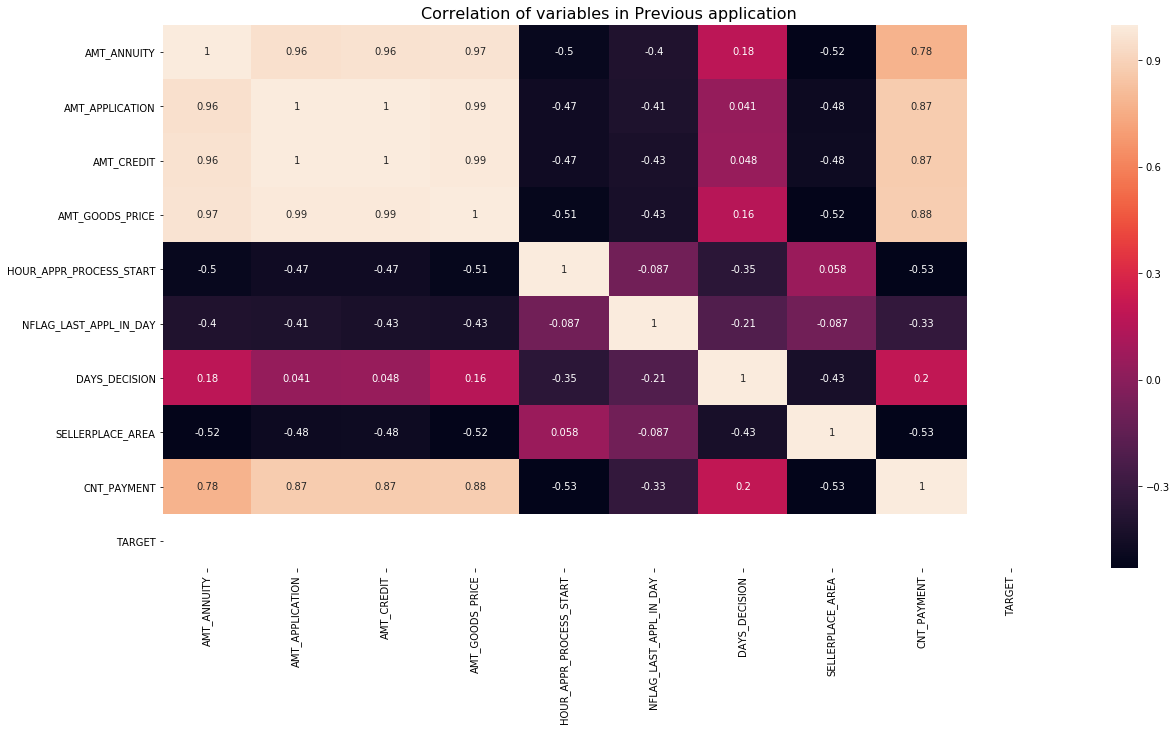

In [76]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title("Correlation of variables in Previous application",fontsize=16)
sns.heatmap(prev_corr_t1, xticklabels=prev_corr_t1.columns,yticklabels=prev_corr_t1.columns,annot=True)

#### Insights:
##### In both cases (for target  1 and 0),
- We see a strong positive correaltion between AMT_APPLICATION, AMT_ANNUITY and AMT_CREDIT.
- DAYS_BIRTH and DAYS_EMPLOYED are Negatively correlated
- And CNT_PAYEMENT are positive and negative correlation with AMT_APPLICATION and HOUR_APPR_PROCESS_START.

#### Top 10 correlations

In [77]:
print("Top 10 correlations w.r.t TARGET 0",'\n')
print(get_top_abs_correlations(prev_t0,10),'\n\n\n')

print("Top 10 correlations w.r.t TARGET 0",'\n')
print(get_top_abs_correlations(prev_t1,10),'\n\n\n')

Top 10 correlations w.r.t TARGET 0 

AMT_APPLICATION  AMT_GOODS_PRICE    0.999899
AMT_CREDIT       AMT_GOODS_PRICE    0.993161
AMT_APPLICATION  AMT_CREDIT         0.975871
AMT_ANNUITY      AMT_GOODS_PRICE    0.819845
                 AMT_CREDIT         0.815151
                 AMT_APPLICATION    0.808025
AMT_APPLICATION  CNT_PAYMENT        0.680004
AMT_CREDIT       CNT_PAYMENT        0.673375
AMT_GOODS_PRICE  CNT_PAYMENT        0.671529
AMT_ANNUITY      CNT_PAYMENT        0.389572
dtype: float64 



Top 10 correlations w.r.t TARGET 0 

AMT_APPLICATION  AMT_CREDIT         0.999386
AMT_CREDIT       AMT_GOODS_PRICE    0.993004
AMT_APPLICATION  AMT_GOODS_PRICE    0.992330
AMT_ANNUITY      AMT_GOODS_PRICE    0.968531
                 AMT_CREDIT         0.960539
                 AMT_APPLICATION    0.956781
AMT_GOODS_PRICE  CNT_PAYMENT        0.878862
AMT_APPLICATION  CNT_PAYMENT        0.873786
AMT_CREDIT       CNT_PAYMENT        0.871177
AMT_ANNUITY      CNT_PAYMENT        0.778315
dtype: 